# –û–±—Ä–∞–±–æ—Ç–∫–∞ –æ—Ç–∑—ã–≤–æ–≤ –æ –º–æ–±–∏–ª—å–Ω—ã—Ö —Ç–µ–ª–µ—Ñ–æ–Ω–∞—Ö

–î–∞–Ω–æ: –¥–∞—Ç–∞—Å–µ—Ç —Å —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏ –æ –º–æ–±–∏–ª—å–Ω—ã—Ö —Ç–µ–ª–µ—Ñ–æ–Ω–∞—Ö —Å –≤—ã—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º —Ä–µ–π—Ç–∏–Ω–≥–æ–º –æ—Ç 1 –¥–æ 5.
–ó–∞–¥–∞—á–∞ ‚Äì –æ–±—É—á–∏—Ç—å –ª—é–±—É—é –º–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–∏–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –µ—Å–ª–∏ —Ä–µ—à–∏—Ç–µ —Ç–∞–∫–∏–º –ø—É—Ç—ë–º –ø–æ–π—Ç–∏) –∏–∑ –ø–∞–∫–µ—Ç–æ–≤ scikit, XGBoost, LightGBM, CatBoost.
–ù–µ–æ–±—Ö–æ–¥–∏–º–∞—è –º–µ—Ç—Ä–∏–∫–∞:
1.	–°–æ –∑–≤—ë–∑–¥–æ—á–∫–æ–π (–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –±–∞–ª–ª) ‚Äì MAE <= 0.5
2.	–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –¥–æ–ø—É—Å—Ç–∏–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ‚Äì –ú–ê–ï <= 1.0


# –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤

## –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [1]:
#!pip install --upgrade pandas
#!pip install nltk
!pip install transformers

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
from catboost import EFstrType
from sklearn.pipeline import Pipeline
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
import warnings
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
import pickle
nltk.download('punkt')
from nltk import tokenize
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from pymystem3 import Mystem
mystem_analyzer = Mystem()
import re
from string import punctuation
from collections import Counter
from tqdm import tqdm
from pymorphy3 import MorphAnalyzer
from transformers import AutoModelForSeq2SeqLM, T5TokenizerFast

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\term\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\term\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## –ö–æ–Ω—Å—Ç–∞–Ω—Ç—ã

In [3]:
LOCAL_PATH = 'D:/_DS/Edu/NLP_1_flow/Homework_1/'
RANDOM_STATE = RS = 654321
TEST_SIZE = .25
# –≤—ã–¥–µ–ª–µ–Ω–∏–µ –≤ —Ç–µ–∫—Å—Ç–µ
BOLD = "\033[1m"
ITALIC = "\033[3m"
END = "\033[0m"
CR = '\n'

## –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

In [4]:
# –§—É–Ω–∫—Ü–∏—è, –≤—ã–≤–æ–¥—è—â–∞—è –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ
def about_df(data, size=5):
    print (BOLD + '–ò–∑—É—á–∏–º –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ' + END)
    print(data.info())
    print(BOLD + CR + f'–í—ã–≤–æ–¥ –ø–µ—Ä–≤—ã—Ö {size} —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞:' + END)
    display(data.head(size))
    print(BOLD + CR + '–í—ã–≤–æ–¥ –æ—Å–Ω–æ–≤–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ:' + END)
    print(CR + '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫: ', data.shape[0])
    print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤: ', data.shape[1])
    categ_col = data.columns[data.dtypes == 'object']
    num_col = data.columns[data.dtypes != 'object']
    print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: ', len(categ_col))
    print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: ', len(num_col))
    missed_cells = data.isna().sum().sum()/(data.shape[0]*(data.shape[1]-1))
    missed_rows = sum(data.isna().sum(axis = 1)>0)/data.shape[0]
    print (BOLD + CR + '–ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤'+ END)
    print ('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: {:.0f}'.format(data.isnull().sum().sum()))
    print ('–î–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤: {:.1%}'.format(missed_cells)+ END)
    print ('–î–æ–ª—è —Å—Ç—Ä–æ–∫ —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö –ø—Ä–æ–ø—É—Å–∫–∏: {:.1%}'.format(missed_rows))
    print(BOLD +  CR + '–û–ø–∏—Å–∞–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:'+ END)
    display(pd.concat([pd.DataFrame(np.array([data[num_col].isna().sum(), data[num_col].isna().mean()*100]).T,
                                columns=['–∫–æ–ª-–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤', '–¥–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤, %'], index=data[num_col].columns), data.describe().T], axis=1))
    print(BOLD + CR + '–û–ø–∏—Å–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:'+ '\033[0m')
    display(pd.concat([pd.DataFrame(np.array([data[categ_col].isna().sum(), data[categ_col].isna().mean()*100]).T,
                                columns=['–∫–æ–ª-–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤', '–¥–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤, %'], index=data[categ_col].columns), data.describe(include='object').T], axis=1))
    ## –ü—Ä–æ–≤–µ—Ä–∏–º –¥—É–±–ª–∏–∫–∞—Ç—ã
    print (BOLD +  CR + '–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã'+ END)
    print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: ', data.duplicated().sum())
        

## –ß—Ç–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–ù–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –≤—ã–≥—Ä—É–∂–µ–Ω—ã –≤ —Ç–µ–∫—Å—Ç–æ–≤–æ–º –≤–∏–¥–µ. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∏—Ö:

In [5]:
with open(LOCAL_PATH + 'data.csv', 'r', encoding='utf-8')as f:
    comments_text = f.read()

In [6]:
comments_text[:1500]

'Review,Rating\n3D Touch –ø—Ä–æ—Å—Ç–æ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è –≤–µ—â—å! –ó–∞—Ä—è–¥ –¥–µ—Ä–∂–∏—Ç —Ü–µ–ª—ã–π –¥–µ–Ω—å. –í —Ä–æ–∑–æ–≤–æ–º —Ü–≤–µ—Ç–µ —Å–º–æ—Ç—Ä–∏—Ç—Å—è –æ—á–µ–Ω—å –Ω–µ–æ–±—ã—á–Ω–æ. Touch ID –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä—ã–π –∏ —É–¥–æ–±–Ω—ã–π. –í—Å–µ–º —Å–æ–≤–µ—Ç—É—é —ç—Ç–æ—Ç —Ç–µ–ª–µ—Ñ–æ–Ω!,5\n"–û—Ç–∫–ª—é—á–∞–µ—Ç—Å—è –ø—Ä–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é, –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ –≤–µ–¥–µ—Ç —Å–µ–±—è –±–∞—Ç–∞—Ä–µ—è",4\n"–í Apple –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–µ—à–∏–ª–∏ –Ω–µ –∑–∞–º–æ—Ä–∞—á–∏–≤–∞—Ç—å—Å—è, –¥–µ–ª–∞—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤ —Ç–µ–ª–µ—Ñ–æ–Ω–µ, –≤—ã–¥–∞—é—Ç —ç—Ç–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è –∑–∞ –∏–Ω–Ω–æ–≤–∞—Ü–∏–∏. –ù–∞ —ç—Ç–æ—Ç —Ä–∞–∑ —Å–∫–æ–ø–∏—Ä–æ–≤–∞–ª–∏ –Ω–µ —Ç–æ–ª—å–∫–æ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª, –Ω–æ –∏ –¥–∏–∑–∞–π–Ω. –¶–µ–Ω–∞ –∏ –±—ã–ª–∞ –Ω–µ–∞–¥–µ–∫–≤–∞—Ç–Ω–æ –∑–∞–≤—ã—à–µ–Ω–∞, –∞ –ø–æ—Å–ª–µ —Å–∫–∞—á–∫–∞ –∫—É—Ä—Å–∞ —Ç–∞–∫ –∏ –≥–æ–≤–æ—Ä–∏—Ç—å –æ–± —ç—Ç–æ–º –Ω–µ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è. –ú–Ω–æ–≥–∏–µ —Å–∫–∞–∂—É—Ç, —á—Ç–æ –∏ HD —Ä–∞–∑—Ä–µ—à–µ

–¢–∞–∫, —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—å - –∑–∞–ø—è—Ç–∞—è, 2 –∫–æ–ª–æ–Ω–∫–∏, –æ—Ç–∑—ã–≤ –∏ —Ä–µ–π—Ç–∏–Ω–≥.

In [7]:
data = pd.read_csv(LOCAL_PATH + 'data.csv', sep=',')

In [8]:
data.head()

Review  Rating
0  3D Touch –ø—Ä–æ—Å—Ç–æ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è –≤–µ—â—å! –ó–∞—Ä—è–¥ –¥–µ—Ä...       5
1  –û—Ç–∫–ª—é—á–∞–µ—Ç—Å—è –ø—Ä–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é, –Ω–µ...       4
2  –í Apple –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–µ—à–∏–ª–∏ –Ω–µ –∑–∞–º–æ—Ä–∞—á–∏–≤–∞—Ç—å—Å—è,...       3
3  –ü–æ—Å—Ç–∞—Ä–∞–ª—Å—è –Ω–∞–∏–±–æ–ª–µ–µ —ë–º–∫–æ –∏ –∫–æ—Ä–æ—Ç–∫–æ –æ–ø–∏—Å–∞—Ç—å –≤—Å–µ...       4
4  –î–æ—Å—Ç–æ–π–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω. –ü–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –æ–¥–Ω–æ —É–¥–æ–≤–æ–ª—å—Å—Ç...       5

In [9]:
data.tail()

Review  Rating
458428  —É–¥–æ–±–Ω—ã–π, –≤—Å—ë —Ä–∞–±–æ—Ç–∞–µ—Ç –æ—Ç–ª–∏—á–Ω–æ, –∑–≤–æ–Ω–∏—Ç, –∏–≥—Ä–∞–µ—Ç,...       5
458429  –ø—Ä–æ—à–ª–æ –±–æ–ª—å—à–µ –≥–æ–¥–∞, –ø—Ä–∏—Ç–µ–Ω–∑–∏–π –Ω–µ—Ç, –ø—Ä–∏ –º–æ–µ–π –Ω–∞...       5
458430  –º–æ–π –ø–µ—Ä–≤—ã–π –∞–ø–ø–∞—Ä–∞—Ç –Ω–∞ –∞–Ω–¥—Ä–æ–∏–¥–µ. –ù–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ...       5
458431  –†–∞–∑–±–∏–ª iphone –∏ –Ω–µ –±—ã–ª–æ –∂–µ–ª–∞–Ω–∏—è –ø–æ–∫—É–ø–∞—Ç—å –Ω–æ–≤—ã–π...       5
458432           –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –ø–æ–∫—É–ø–∫–æ–π –∏ –≤—Å–µ–º —Å–æ–≤–µ—Ç—É—é...       5

In [10]:
about_df(data)

–ò–∑—É—á–∏–º –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458433 entries, 0 to 458432
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  457837 non-null  object
 1   Rating  458433 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB
None

–í—ã–≤–æ–¥ –ø–µ—Ä–≤—ã—Ö 5 —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞:


Review  Rating
0  3D Touch –ø—Ä–æ—Å—Ç–æ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è –≤–µ—â—å! –ó–∞—Ä—è–¥ –¥–µ—Ä...       5
1  –û—Ç–∫–ª—é—á–∞–µ—Ç—Å—è –ø—Ä–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é, –Ω–µ...       4
2  –í Apple –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–µ—à–∏–ª–∏ –Ω–µ –∑–∞–º–æ—Ä–∞—á–∏–≤–∞—Ç—å—Å—è,...       3
3  –ü–æ—Å—Ç–∞—Ä–∞–ª—Å—è –Ω–∞–∏–±–æ–ª–µ–µ —ë–º–∫–æ –∏ –∫–æ—Ä–æ—Ç–∫–æ –æ–ø–∏—Å–∞—Ç—å –≤—Å–µ...       4
4  –î–æ—Å—Ç–æ–π–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω. –ü–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –æ–¥–Ω–æ —É–¥–æ–≤–æ–ª—å—Å—Ç...       5


–í—ã–≤–æ–¥ –æ—Å–Ω–æ–≤–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫:  458433
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤:  2
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:  1
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:  1

–ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 596
–î–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤: 0.1%
–î–æ–ª—è —Å—Ç—Ä–æ–∫ —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö –ø—Ä–æ–ø—É—Å–∫–∏: 0.1%

–û–ø–∏—Å–∞–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:


–∫–æ–ª-–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤  –¥–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤, %     count      mean       std  \
Rating               0.0                0.0  458433.0  4.000853  1.266496   

        min  25%  50%  75%  max  
Rating  0.0  3.0  4.0  5.0  9.0


–û–ø–∏—Å–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:


–∫–æ–ª-–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤  –¥–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤, %   count  unique               top  \
Review             596.0           0.130008  457837  320031  –û—Ç–ª–∏—á–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω   

       freq  
Review  114


–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤:  137327


–£ –Ω–∞—Å —Ö–æ—Ä–æ—à–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç —Å –Ω–µ–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–ø—É—Å–∫–æ–≤, —Ç–µ–º –Ω–µ –º–µ–Ω–µ–µ –ø—Ä–æ–ø—É—Å–∫–∏ –µ—Å—Ç—å –≤ —Ç–µ–∫—Å—Ç–æ–≤–æ–π —á–∞—Å—Ç–∏ –æ—Ç–∑—ã–≤–∞ –∏ —Ç–∞–∫–∏–µ –æ—Ç–∑—ã–≤—ã –Ω–∞–º –Ω–µ –≥–æ–¥—è—Ç—Å—è –¥–ª—è –º–æ–¥–µ–ª–∏. –î—Ä–æ–ø–Ω–µ–º

In [11]:
data = data.dropna().reset_index(drop = True)

–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã –ø–æ–∫–∞–∑–∞–ª–∞ 137327 –ø–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤. –ù—É–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å.

In [12]:
data[data.duplicated()== True]

Review  Rating
343     –ü–æ–∫—É–ø–∞–ª 6-–∫—É –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –º–∞–≥–∞–∑–∏–Ω–µ, –ø–µ—Ä–µ–¥ —ç—Ç–∏–º–∏ ...       4
354     –î–æ–≤–æ–ª—å–Ω–æ –¥–æ–ª–≥–æ —Å–æ–ø—Ä–æ—Ç–∏–≤–ª—è–ª—Å—è —Å–º–∞—Ä—Ç—Ñ–æ–Ω–∞–º. –î–∞ –∏ ...       5
358     –í—Å–µ–º –∑–∞—è–¥–ª—ã–º "—è–±–ª–æ—á–Ω–∏–∫–∞–º" —Ö–æ—á—É —Å–∫–∞–∑–∞—Ç—å,—á—Ç–æ —á—É–≤...       4
359     –û—Ç–ª–∏—á–Ω—ã–π, –∫–∞–∫ –∏ –≤—Å–µ –∞–π—Ñ–æ–Ω—ã, –Ω–æ —Ü–µ–Ω—ã –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–∞.       5
361     –û—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è —Ç–µ–ª–µ—Ñ–æ–Ω –≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏, –º–Ω–µ ...       5
...                                                   ...     ...
457746  –¢–µ–ª–µ—Ñ–æ–Ω —Å—Ç–æ–∏—Ç –¥–µ–Ω–µ–≥, –∫–æ—Ç–æ—Ä—ã–µ —è –∑–∞ –Ω–µ–≥–æ –∑–∞–ø–ª–∞—Ç–∏...       4
457747  –¢–µ–ª–µ—Ñ–æ–Ω —Å—Ç–æ–∏—Ç –¥–µ–Ω–µ–≥, –∫–æ—Ç–æ—Ä—ã–µ —è –∑–∞ –Ω–µ–≥–æ –∑–∞–ø–ª–∞—Ç–∏...       4
457753  –ö–æ–Ω–µ—á–Ω–æ, —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –±—Ä–∞–∫ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ –º–æ–µ–≥–æ —Ç...       4
457766                                   –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       1
457793                                            –°–æ–≤–µ—Ç—É—é       4

[136736 rows x 2 columns]

In [13]:
data[data['Review'] == '–Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å']

Review  Rating
9983    –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       1
19665   –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       1
76500   –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       3
79750   –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       1
322346  –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       1
348307  –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       3
370268  –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       3
398386  –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       3
428893  –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       1
436844  –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       2
439956  –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       2
440424  –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       2
442478  –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       2
457766  –Ω–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å       1

–í–ø–æ–ª–Ω–µ –≤–æ–∑–º–æ–∂–Ω–æ,—á—Ç–æ —ç—Ç–æ –±–ª–æ–∫–∏ –∏–∑ –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ —Ä–∞–∑–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. –ü–æ–∫–∞ –Ω–µ —É–¥–∞–ª—è–µ–º.

In [14]:
#data = data.drop_duplicates().reset_index(drop = True)

–ß—Ç–æ –æ—Å—Ç–∞–ª–æ—Å—å?

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457837 entries, 0 to 457836
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  457837 non-null  object
 1   Rating  457837 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


–£–±—Ä–∞–≤ –¥—É–±–ª–∏–∫–∞—Ç—ã –º—ã –±—ã –ø–æ—Ç–µ—Ä—è–ª–∏ —Ç—Ä–µ—Ç—å! –ù—É –Ω–∏—á–µ–≥–æ, —Å–ø–æ–∫–æ–π–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–∏–º –¥–∞–ª—å—à–µ.

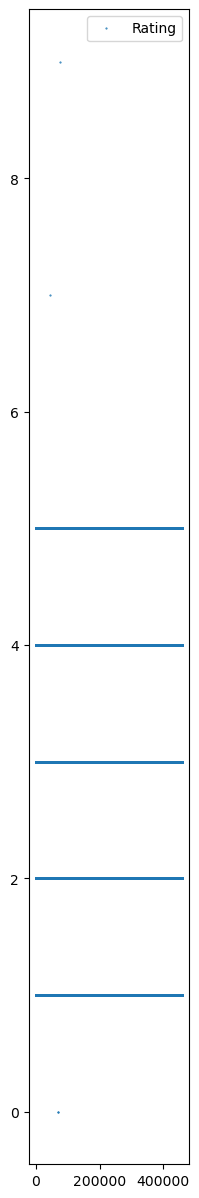

In [16]:
data.plot(
    lw=0, marker=".", subplots=True, layout=(-1, 5), figsize=(12, 15), markersize=1
);

–ú–∏–Ω—É—Ç–æ—á–∫—É, –∞ —á—Ç–æ —ç—Ç–æ –∑–∞ —Ä–µ–π—Ç–∏–Ω–≥ –±–æ–ª—å—à–µ 5? –ï—Å–ª–∏ —Ä–µ–π—Ç–∏–Ω–≥ –¥–æ 9, —Ç–æ —É –Ω–∞—Å —Ç—É—Ç –º–µ—à–æ–∫ –ø–ª–æ—Ö–∏—Ö –æ—Ç–∑—ã–≤–æ–≤, —Ç–∞–∫ –Ω–µ –±—ã–≤–∞–µ—Ç. –ù–µ—Ç, –±—ã–≤–∞–µ—Ç, –Ω–æ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º. —á—Ç–æ —ç—Ç–æ –Ω–µ —Ç–∞–∫.

In [17]:
print(data[data['Rating']>5])

                                                  Review  Rating
44271  –û—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω, –ø–æ—Å—Ç–æ—è–Ω–Ω–æ —Ö–æ—á–µ—Ç—Å—è –µ–≥–æ ...       7
77154  –ò—Å–∫–∞–ª –∞–ø–ø–∞—Ä–∞—Ç —Å –±–æ–ª—å—à–æ–π –±–∞—Ç–∞—Ä–µ–µ–π (–º–Ω–æ–≥–æ —Ä–∞–∑–≥–æ–≤...       9


In [18]:
data['Review'][44271]   

'–û—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω, –ø–æ—Å—Ç–æ—è–Ω–Ω–æ —Ö–æ—á–µ—Ç—Å—è –µ–≥–æ –¥–µ—Ä–∂–∞—Ç—å –≤ —Ä—É–∫–∞—Ö, –Ω–∞—Å—Ç–æ–ª—å–∫–æ –æ–Ω –ø—Ä–∏—è—Ç–µ–Ω. –í —á–µ—Ä–Ω–æ–º —Ü–≤–µ—Ç–µ –≤—ã–≥–ª—è–¥–∏—Ç —à–∏–∫–∞—Ä–Ω–æ.\rSamsung Pay - –¥–æ–≤–æ–ª—å–Ω–æ —É–¥–æ–±–Ω–∞—è —à—Ç—É–∫–∞, —Å—Ä–∞–∑—É —Å—Ç–∞–ª–∞ –µ—é –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è.\r–°–∫–∞–Ω–µ—Ä –æ—Ç–ø–µ—á–∞—Ç–∫–æ–≤ —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–æ–≤–æ–ª—å–Ω–æ —Ç–æ—á–Ω–æ –∏ –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ - —Å—Ç–æ–∏—Ç —Ç–æ–ª—å–∫–æ –ø—Ä–∏–ª–æ–∂–∏—Ç—å –ø–∞–ª–µ—Ü –∫ –∫–Ω–æ–ø–∫–µ (–Ω–∞–∂–∏–º–∞—Ç—å –Ω–∞ –Ω–µ–µ –Ω–µ –Ω—É–∂–Ω–æ) - –∏ –æ–Ω —É–∂–µ —Ä–∞–∑–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω.\r–ù–∞ —É–¥–∏–≤–ª–µ–Ω–∏–µ, –æ—á–µ–Ω—å —è—Ä–∫–∞—è –≤—Å–ø—ã—à–∫–∞, –Ω–æ —ç—Ç–æ –º–µ–ª–æ—á—å.\rUSB Type C.. –Ω—É, —á–µ—Å—Ç–Ω–æ –≥–æ–≤–æ—Ä—è, –Ω–µ –ø–æ–Ω–∏–º–∞—é, –ø–æ—á–µ–º—É –≤—Å–µ–º –æ–Ω —Ç–∞–∫ –Ω—É–∂–µ–Ω, –∫–∞–∫ –ø–æ –º–Ω–µ - –Ω–∏—á–µ–≥–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–≥–æ –≤ –Ω–µ–º –Ω–µ—Ç, –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –±—ã–ª–æ –ø—Ä–æ–±–ª–µ–º —Å Micro USB.\r–ë–∞—Ç–∞—Ä–µ–π–∫—É –¥–µ—Ä–∂–∏—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ - –¥–µ–Ω—å

In [19]:
data['Review'][77154]   

'–ò—Å–∫–∞–ª –∞–ø–ø–∞—Ä–∞—Ç —Å –±–æ–ª—å—à–æ–π –±–∞—Ç–∞—Ä–µ–µ–π (–º–Ω–æ–≥–æ —Ä–∞–∑–≥–æ–≤–∞—Ä–∏–≤–∞—é, –ø–æ—ç—Ç–æ–º—É —ë–º–∫–æ—Å—Ç—å'

–≠—Ç–æ —Ö–æ—Ä–æ—à–∏–π –æ—Ç–∑—ã–≤ –∏ –æ–±–æ—Ä–≤–∞–Ω–Ω—ã–π –æ—Ç–∑—ã–≤, –ø—Ä–∏–≤–µ–¥–µ–º –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ

In [20]:
data.loc[data['Rating']==7, 'Rating'] = 5
data = data[data['Rating']<9]

In [21]:
data['Rating'].value_counts()

Rating
5    228087
4    106503
3     53055
2     35705
1     34484
0         2
Name: count, dtype: int64

In [22]:
data[data['Rating']==0]['Review']

69369    –ë—ã–ª –ø—Ä–∏–≤–µ—Ä–∂–µ–Ω—Ü–µ–º HTC, –Ω–æ —á—Ç–æ-—Ç–æ —Ç–∞–π–≤–∞–Ω—Å–∫–∏–µ —Ç–æ–≤...
69398    –ë—ã–ª –ø—Ä–∏–≤–µ—Ä–∂–µ–Ω—Ü–µ–º HTC, –Ω–æ —á—Ç–æ-—Ç–æ —Ç–∞–π–≤–∞–Ω—Å–∫–∏–µ —Ç–æ–≤...
Name: Review, dtype: object

In [23]:
data['Review'][69369]   

'–ë—ã–ª –ø—Ä–∏–≤–µ—Ä–∂–µ–Ω—Ü–µ–º HTC, –Ω–æ —á—Ç–æ-—Ç–æ —Ç–∞–π–≤–∞–Ω—Å–∫–∏–µ —Ç–æ–≤–∞—Ä–∏—â–∏ —É–∂–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ª–µ—Ç –Ω–µ –º–æ–≥—É—Ç —Ä–æ–¥–∏—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π —Ñ–ª–∞–≥–º–∞–Ω, –ø—Ä–∏—à–ª–æ—Å—å —Å–º–æ—Ç—Ä–µ—Ç—å —Ö–æ—Ç—å –∫–∞–∫–æ–π-—Ç–æ —Ç–µ–ª–µ—Ñ–æ–Ω –≤–∑–∞–º–µ–Ω —Å—Ç–∞—Ä–æ–º—É. –ò–∑–Ω–∞—á–∞–ª—å–Ω–æ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–ª –ø—Ä–æ—Å—Ç–æ –≤–∑—è—Ç—å –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å –±—é–¥–∂–µ—Ç–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç ('

–ï—â—ë –æ–¥–∏–Ω –æ–±–æ—Ä–≤–∞–Ω–Ω—ã–π –æ—Ç–∑—ã–≤ —Å –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ–π —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å—é, –æ–±—Ä–µ–∑–∞–µ–º.

In [24]:
data = data[data['Rating']>0]

In [25]:
data = data.reset_index(drop = True)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞:

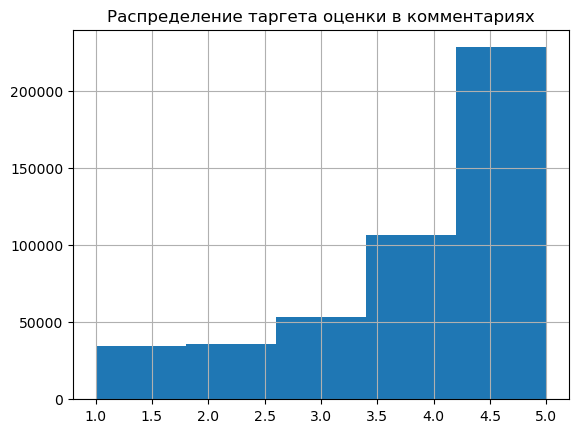

In [26]:
pd.Series(data['Rating']).hist( bins = 5)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞ –æ—Ü–µ–Ω–∫–∏ –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö')
plt.show()

## –ë—ç–π–∑–ª–∞–π–Ω –º–æ–¥–µ–ª—å

–ö—ç—Ç–±—É—Å—Ç –Ω–µ–ø–ª–æ—Ö–æ –ø–µ—Ä–µ–≤–∞—Ä–∏–≤–∞–µ—Ç —Ç–µ–∫—Å—Ç, —Å–¥–µ–ª–∞–µ–º –Ω–∞ –µ–≥–æ –æ—Å–Ω–æ–≤–µ –±–∞–∑–æ–≤—É—é –º–æ–¥–µ–ª—å –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è

In [27]:
y =target = data['Rating']

In [28]:
X = data.drop('Rating', axis = 1)


In [29]:
X.head()

Review
0  3D Touch –ø—Ä–æ—Å—Ç–æ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è –≤–µ—â—å! –ó–∞—Ä—è–¥ –¥–µ—Ä...
1  –û—Ç–∫–ª—é—á–∞–µ—Ç—Å—è –ø—Ä–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é, –Ω–µ...
2  –í Apple –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–µ—à–∏–ª–∏ –Ω–µ –∑–∞–º–æ—Ä–∞—á–∏–≤–∞—Ç—å—Å—è,...
3  –ü–æ—Å—Ç–∞—Ä–∞–ª—Å—è –Ω–∞–∏–±–æ–ª–µ–µ —ë–º–∫–æ –∏ –∫–æ—Ä–æ—Ç–∫–æ –æ–ø–∏—Å–∞—Ç—å –≤—Å–µ...
4  –î–æ—Å—Ç–æ–π–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω. –ü–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –æ–¥–Ω–æ —É–¥–æ–≤–æ–ª—å—Å—Ç...

In [30]:
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                   test_size=TEST_SIZE, random_state=RS,
                                                   )

In [31]:
print(data.shape)
print(test_x.shape)
print(test_x.shape)

(457834, 2)
(114459, 1)
(114459, 1)


In [32]:
text_features = ['Review']

def objective(trial):
    param = {
        "iterations": trial.suggest_int("iterations", 200, 2400),
        "depth": trial.suggest_int("depth", 2, 6),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 1, 5),
        #"colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.08, 0.1),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"]),# "MVS"])
         "task_type": "GPU" 
    }
    train_pool = Pool(train_x,
                  label=train_y,
                  text_features=text_features
                      )
    test_pool = Pool(test_x,
                  label=test_y,
                  text_features=text_features
                  )
    model_cbc = CatBoostRegressor(**param, 
                                   loss_function = 'RMSE',
                                   eval_metric = 'RMSE',
                                   thread_count=-1, 
                                   random_seed=RANDOM_STATE, 
                                   verbose=0, 
                                   text_features=text_features
                                 )
    predict_cbc = cross_val_predict(model_cbc, train_x, train_y, cv=4)
    score_cbc = mean_absolute_error(train_y, predict_cbc)
    return score_cbc
sampler = optuna.samplers.RandomSampler(seed=RANDOM_STATE)
study_cbc = optuna.create_study(sampler=sampler, direction='minimize')
study_cbc.optimize(objective, n_trials=10)
print('Best hyperparameters Catboost:', study_cbc.best_params)
print('Best MAE Catboost:', study_cbc.best_value)


[I 2024-04-24 16:04:25,471] A new study created in memory with name: no-name-5c4b7593-b45a-46de-9d4c-4655ee6a00b2
[I 2024-04-24 16:05:07,159] Trial 0 finished with value: 0.8658033727743734 and parameters: {'iterations': 710, 'depth': 5, 'l2_leaf_reg': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian'}. Best is trial 0 with value: 0.8658033727743734.
[I 2024-04-24 16:05:52,347] Trial 1 finished with value: 0.9317033865493553 and parameters: {'iterations': 357, 'depth': 2, 'l2_leaf_reg': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.8658033727743734.
[I 2024-04-24 16:07:19,876] Trial 2 finished with value: 0.8670913892254375 and parameters: {'iterations': 1196, 'depth': 3, 'l2_leaf_reg': 2, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.8658033727743734.
[I 2024-04-24 16:09:38,714] Trial 3 finished with value: 0.8301214122583268 and parameters: {'iterations': 1792, 'depth': 5, 'l2_leaf_reg': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian'}. Best is trial 3 with value: 0.8301214122583268.
[I 2024-04-24 16:10:49,655] Trial 4 finished with value: 0.8667665275069081 and parameters: {'iterations': 691, 'depth': 5, 'l2_leaf_reg': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian'}. Best is trial 3 with value: 0.8301214122583268.
[I 2024-04-24 16:12:56,459] Trial 5 finished with value: 0.8625203214935213 and parameters: {'iterations': 2161, 'depth': 2, 'l2_leaf_reg': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli'}. Best is trial 3 with value: 0.8301214122583268.
[I 2024-04-24 16:13:32,002] Trial 6 finished with value: 0.9186172185520529 and parameters: {'iterations': 516, 'depth': 2, 'l2_leaf_reg': 1, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian'}. Best is trial 3 with value: 0.8301214122583268.
[I 2024-04-24 16:15:58,802] Trial 7 finished with value: 0.8334130127253915 and parameters: {'iterations': 2096, 'depth': 4, 'l2_leaf_reg': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli'}. Best is trial 3 with value: 0.8301214122583268.
[I 2024-04-24 16:16:38,867] Trial 8 finished with value: 0.8789070000677444 and parameters: {'iterations': 518, 'depth': 5, 'l2_leaf_reg': 3, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli'}. Best is trial 3 with value: 0.8301214122583268.
[I 2024-04-24 16:17:15,156] Trial 9 finished with value: 0.8992702483486947 and parameters: {'iterations': 328, 'depth': 5, 'l2_leaf_reg': 4, 'boosting_type': 'Plain', 'boo

Best hyperparameters Catboost: {'iterations': 1792, 'depth': 5, 'l2_leaf_reg': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian'}
Best MAE Catboost: 0.8301214122583268


In [33]:
model_cb = CatBoostRegressor(iterations=1792,
                                depth=5,
                                #learning_rate=0.001,
                                l2_leaf_reg=5,
                                boosting_type='Ordered',
                                loss_function='RMSE',
                                eval_metric = 'RMSE',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                text_features=text_features,
                                task_type = "GPU" 
)


model_cb.fit(train_x, train_y, text_features=text_features, plot= True)
y_pred = model_cb.predict(test_x)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [34]:
mse = mean_squared_error(test_y, y_pred)

rmse = root_mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, y_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)

Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.0573443187000018
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.8310417344282175
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.3026942533407161


In [35]:
y_pred

array([4.19069358, 3.19785718, 4.176447  , ..., 2.717073  , 4.11856958,
       4.17545681])

–•–º, —Ç–∞–∫ —Ç–æ —É –Ω–∞—Å —Ö–æ—Ä–æ—à–∏–µ —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –º–æ–∂–Ω–æ –∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é –∑–∞–º—É—Ç–∏—Ç—å

def objective(trial):
    param = {
        "iterations": trial.suggest_int("iterations", 200, 2400),
        "depth": trial.suggest_int("depth", 2, 6),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 1, 5),
        #"colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.08, 0.1),
        #"boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"]),# "MVS"])
         "task_type": "GPU" 
    }
    train_pool = Pool(train_x,
                  label=train_y,
                  text_features=text_features
                      )
    test_pool = Pool(test_x,
                  label=test_y,
                  text_features=text_features
                  )
    model_cbc = CatBoostClassifier(**param, 
                                   loss_function = 'MultiClass',
                                   thread_count=-1, 
                                   random_seed=RANDOM_STATE, 
                                   verbose=0, 
                                   text_features=text_features
                                 )
    predict_cbc = cross_val_predict(model_cbc, train_x, train_y, cv=4)
    score_cbc = mean_absolute_error(train_y, predict_cbc)
    return score_cbc
sampler = optuna.samplers.RandomSampler(seed=RANDOM_STATE)
study_cbc = optuna.create_study(sampler=sampler, direction='minimize')
study_cbc.optimize(objective, n_trials=10)
print('Best hyperparameters Catboost:', study_cbc.best_params)
print('Best MAE Catboost:', study_cbc.best_value)



[I 2024-04-24 16:25:19,613] A new study created in memory with name: no-name-402793fc-ff45-429b-b9dd-0039ec644fdd
[I 2024-04-24 16:26:28,394] Trial 0 finished with value: 0.6077301265654586 and parameters: {'iterations': 710, 'depth': 5, 'l2_leaf_reg': 5, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.6077301265654586.
[I 2024-04-24 16:28:02,041] Trial 1 finished with value: 0.6128417433478391 and parameters: {'iterations': 2045, 'depth': 2, 'l2_leaf_reg': 1, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.6077301265654586.
[I 2024-04-24 16:29:27,683] Trial 2 finished with value: 0.615333189383118 and parameters: {'iterations': 1709, 'depth': 2, 'l2_leaf_reg': 1, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.6077301265654586.
[I 2024-04-24 16:30:36,369] Trial 3 finished with value: 0.6139006079128326 and parameters: {'iterations': 993, 'depth': 3, 'l2_leaf_reg': 3, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.6077301265654586.
[I 2024-04-24 16:32:31,767] Trial 4 finished with value: 0.5927980599940206 and parameters: {'iterations': 1914, 'depth': 5, 'l2_leaf_reg': 4, 'bootstrap_type': 'Bayesian'}. Best is trial 4 with value: 0.5927980599940206.
[I 2024-04-24 16:33:46,187] Trial 5 finished with value: 0.6042296448858918 and parameters: {'iterations': 865, 'depth': 5, 'l2_leaf_reg': 1, 'bootstrap_type': 'Bernoulli'}. Best is trial 4 with value: 0.5927980599940206.
[I 2024-04-24 16:35:47,568] Trial 6 finished with value: 0.5869556190412916 and parameters: {'iterations': 1689, 'depth': 6, 'l2_leaf_reg': 1, 'bootstrap_type': 'Bayesian'}. Best is trial 6 with value: 0.5869556190412916.
[I 2024-04-24 16:37:23,516] Trial 7 finished with value: 0.6131780885626017 and parameters: {'iterations': 2161, 'depth': 2, 'l2_leaf_reg': 4, 'bootstrap_type': 'Bayesian'}. Best is trial 6 with value: 0.5869556190412916.
[I 2024-04-24 16:38:18,576] Trial 8 finished with value: 0.6206856459489087 and parameters: {'iterations': 520, 'depth': 3, 'l2_leaf_reg': 1, 'bootstrap_type': 'Bayesian'}. Best is trial 6 with value: 0.5869556190412916.
[I 2024-04-24 16:39:40,726] Trial 9 finished with value: 0.6059985715709397 and parameters: {'iterations': 1218, 'depth': 4, 'l2_leaf_reg': 3, 'bootstrap_type': 'Bernoulli'}. Best is trial 6 with value: 0.5869556190412916.

Best hyperparameters Catboost: {'iterations': 1689, 'depth': 6, 'l2_leaf_reg': 1, 'bootstrap_type': 'Bayesian'}
Best MAE Catboost: 0.5869556190412916


In [36]:
model_cb = CatBoostClassifier(iterations=1689,
                                depth = 6,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                text_features=text_features,
                                task_type = "GPU" 
                                
)


model_cb.fit(train_x, train_y, text_features=text_features, plot= True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [37]:
test_pred = model_cb.predict(test_x)
proba_test = model_cb.predict_proba(test_x)

train_pred = model_cb.predict(train_x)
proba_train = model_cb.predict_proba(train_x)
 
test_pred = model_cb.predict(test_x)
confusion = confusion_matrix(test_y, test_pred)
print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y, proba_test, multi_class='ovr')
print('AUC ROC train: ',auc_tr)
print('AUC ROC test: ',auc_test)
mse = mean_squared_error(test_y, test_pred)
rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)


              precision    recall  f1-score   support

           1       0.55      0.60      0.57      8652
           2       0.55      0.35      0.43      8867
           3       0.51      0.39      0.45     13286
           4       0.57      0.41      0.48     26766
           5       0.72      0.89      0.80     56888

    accuracy                           0.66    114459
   macro avg       0.58      0.53      0.54    114459
weighted avg       0.64      0.66      0.64    114459


Confusion Matrix

[[ 5160   814   863   367  1448]
 [ 1842  3120  1406   875  1624]
 [ 1213   934  5236  2696  3207]
 [  530   445  1811 10934 13046]
 [  589   338   926  4323 50712]]
AUC ROC train:  0.9132641915497771
AUC ROC test:  0.8739398718230651
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.0037149562846277
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.5124542412566946
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.37163619141479687


–ò—Ç–∞–∫, –Ω–∞—à–∞ –±–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–µ–ø–ª–æ—Ö–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –ø–æ –∑–∞–¥–∞–Ω–∏—é –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –¥–æ–ø—É—Å—Ç–∏–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ‚Äì –ú–ê–ï <= 1.0. –£ –Ω–∞—Å —É–∂–µ 0.51. –¢–µ–ø–µ—Ä—å –Ω—É–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, —á—Ç–æ —É–¥–∞—Å—Ç—Å—è —Å–¥–µ–ª–∞—Ç—å —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ. –ü–æ–µ—Ö–∞–ª–∏

In [38]:
text_feature_indices = model_cb.get_feature_importance(Pool(data, label=y, text_features=text_features), 
                                     type=EFstrType.FeatureImportance, prettified=True)

In [39]:
text_feature_indices

Feature Id  Importances
0     Review        100.0

In [40]:
cat_imp = pd.Series(model_cb.feature_importances_, X.columns)

Text(0.5, 1.0, '–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Catboost ')

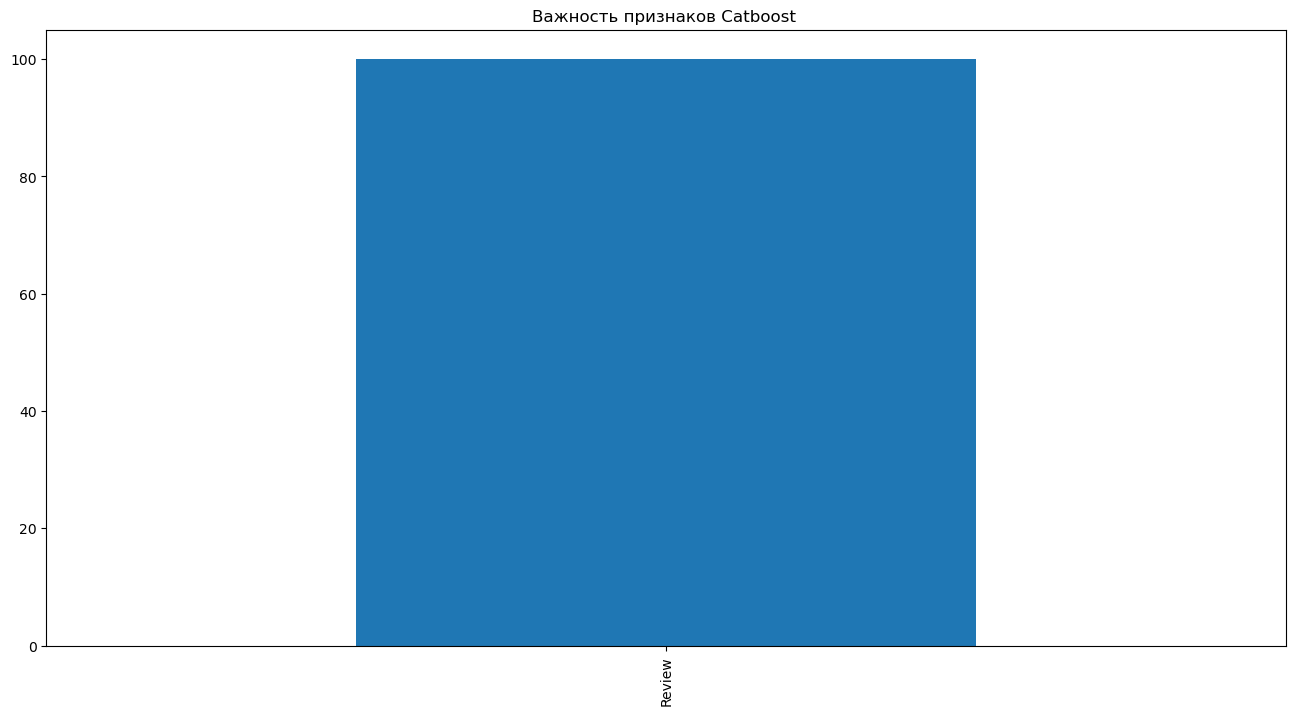

In [41]:
cat_imp.plot.bar(figsize=(16,8)).set_title("–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Catboost ")

–î–∞, —Å—Ç–æ–∏—Ç –ª–∏ —É–¥–∏–≤–ª—è—Ç—å—Å—è, —É –Ω–∞—Å –æ–¥–∏–Ω, –Ω–æ –æ—á–µ–Ω—å –≤–∞–∂–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫)))))))))))))

–ê –µ—Å–ª–∏ –Ω–µ–º–Ω–æ–≥–æ –ø–æ–¥—Ä–∞–±–æ—Ç–∞—Ç—å –≤–µ—Å–∞? –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, –Ω–∞–º –≤–∞–∂–Ω–µ–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã

In [42]:
model_cb = CatBoostClassifier(iterations=1689,
                                depth = 6,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                text_features=text_features,
                                task_type = "GPU", 
                                class_weights= {1: 2, 2: 2, 3:1, 4:1, 5:1}
)


model_cb.fit(train_x, train_y, text_features=text_features, plot= True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [43]:
test_pred = model_cb.predict(test_x)
proba_test = model_cb.predict_proba(test_x)

train_pred = model_cb.predict(train_x)
proba_train = model_cb.predict_proba(train_x)
 
test_pred = model_cb.predict(test_x)
confusion = confusion_matrix(test_y, test_pred)
print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y, proba_test, multi_class='ovr')
print('AUC ROC train: ',auc_tr)
print('AUC ROC test: ',auc_test)
mse = mean_squared_error(test_y, test_pred)

rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)


              precision    recall  f1-score   support

           1       0.51      0.67      0.58      8652
           2       0.42      0.50      0.46      8867
           3       0.60      0.28      0.38     13286
           4       0.57      0.39      0.46     26766
           5       0.73      0.88      0.80     56888

    accuracy                           0.65    114459
   macro avg       0.57      0.54      0.54    114459
weighted avg       0.64      0.65      0.63    114459


Confusion Matrix

[[ 5838  1285   230   274  1025]
 [ 2000  4409   532   647  1279]
 [ 1693  2312  3709  2639  2933]
 [  894  1419  1173 10363 12917]
 [ 1039  1006   587  4264 49992]]
AUC ROC train:  0.9123216165355782
AUC ROC test:  0.8726544141589742
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.0292764058838815
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.5308014223433719
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.3392237768709564


–ù–µ—Ç, –ø—Ä–æ–≤–µ—Ä–∏–ª–∞ —Å —Ä–∞–∑–Ω—ã–º–∏ —Ä–∞–∑–≤–µ—Å–æ–≤–∫–∞–º–∏, –≤—Å—ë –ø–ª–æ—Ö–æ, –ª—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –æ—Å—Ç–∞—ë—Ç—Å—è –∫—ç—Ç–±—É—Å—Ç —Å —Ä–æ–≤–Ω—ã–º–∏ –≤–µ—Å–∞–º–∏.


## –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä

In [44]:
data['Review'].head().tolist()

['3D Touch –ø—Ä–æ—Å—Ç–æ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è –≤–µ—â—å! –ó–∞—Ä—è–¥ –¥–µ—Ä–∂–∏—Ç —Ü–µ–ª—ã–π –¥–µ–Ω—å. –í —Ä–æ–∑–æ–≤–æ–º —Ü–≤–µ—Ç–µ —Å–º–æ—Ç—Ä–∏—Ç—Å—è –æ—á–µ–Ω—å –Ω–µ–æ–±—ã—á–Ω–æ. Touch ID –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä—ã–π –∏ —É–¥–æ–±–Ω—ã–π. –í—Å–µ–º —Å–æ–≤–µ—Ç—É—é —ç—Ç–æ—Ç —Ç–µ–ª–µ—Ñ–æ–Ω!',
 '–û—Ç–∫–ª—é—á–∞–µ—Ç—Å—è –ø—Ä–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é, –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ –≤–µ–¥–µ—Ç —Å–µ–±—è –±–∞—Ç–∞—Ä–µ—è',
 '–í Apple –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–µ—à–∏–ª–∏ –Ω–µ –∑–∞–º–æ—Ä–∞—á–∏–≤–∞—Ç—å—Å—è, –¥–µ–ª–∞—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤ —Ç–µ–ª–µ—Ñ–æ–Ω–µ, –≤—ã–¥–∞—é—Ç —ç—Ç–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è –∑–∞ –∏–Ω–Ω–æ–≤–∞—Ü–∏–∏. –ù–∞ —ç—Ç–æ—Ç —Ä–∞–∑ —Å–∫–æ–ø–∏—Ä–æ–≤–∞–ª–∏ –Ω–µ —Ç–æ–ª—å–∫–æ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª, –Ω–æ –∏ –¥–∏–∑–∞–π–Ω. –¶–µ–Ω–∞ –∏ –±—ã–ª–∞ –Ω–µ–∞–¥–µ–∫–≤–∞—Ç–Ω–æ –∑–∞–≤—ã—à–µ–Ω–∞, –∞ –ø–æ—Å–ª–µ —Å–∫–∞—á–∫–∞ –∫—É—Ä—Å–∞ —Ç–∞–∫ –∏ –≥–æ–≤–æ—Ä–∏—Ç—å –æ–± —ç—Ç–æ–º –Ω–µ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è. –ú–Ω–æ–≥–∏–µ —Å–∫–∞–∂—É—Ç, —á—Ç–æ –∏ HD —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –±—É–¥–µ

–ò–∑–≤–ª–µ—á—ë–º —Ñ–∏—á–∏ –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–æ–º `TfidfVectorizer`


In [45]:
text_features = []
model_cb = CatBoostClassifier(iterations=1689,
                                depth = 6,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                task_type = "GPU" 
)


In [46]:
train_x

Review
286602  "–û—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç". –ù–∏ –∫–æ–º—É –Ω–µ —Å–æ–≤–µ—Ç—É—é. –¢–∞–∫ —Ö–æ...
315859  –•–æ—Ä–æ—à–∏–π —Ç–µ–ª–µ—Ñ–æ–Ω, –æ—á–µ–Ω—å –Ω—Ä–∞–≤–∏—Ç—Å—è. –ò –º–æ–∂–µ—Ç –∫—Ç–æ-–Ω...
145621                –û—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–π —Ç–µ–ª–µ—Ñ–æ–Ω –∑–∞ —ç—Ç–∏ –¥–µ–Ω—å–≥–∏
101118  –ù–∞–¥–æ–µ–ª–æ —Å–º–æ—Ç—Ä–µ—Ç—å –∫–æ–º–º–µ–Ω—Ç—ã –ø—Ä–æ —Ç–æ, –∫–∞–∫ —É –º–Ω–æ–≥–∏—Ö...
373770                        –í–Ω–µ—à–Ω–∏–π –≤–∏–¥,—ç–∫—Ä–∞–Ω,—É–¥–æ–±—Å—Ç–≤–æ.
...                                                   ...
318635  —Ä–µ–∫–æ–º–µ–Ω–¥—É—é. –∑–∞ —Å–≤–æ–∏ –¥–µ–Ω—å–≥–∏ —Å—É–ø–µ—Ä.–æ—Å–æ–±–µ–Ω–Ω–æ –∫—Ä–∞—Å...
332415  –ö—É–ø–∏–ª–∏ –Ω–µ–¥–∞–≤–Ω–æ, —Å–Ω–∞—á–∞–ª–æ –≤—Å—ë –±—ã–ª–æ –æ—Ç–ª–∏—á–Ω–æ, –ø–æ—Ç–æ...
185599  –î–µ–≤–∞–π—Å –æ—Ç–ª–∏—á–Ω—ã–π, —Ö–æ—Ç—è –ø–æ –º–æ–µ–º—É –º–Ω–µ–Ω–∏—é –º–æ–≥ —Å—Ç–æ–∏...
237056  —Å–µ–≥–æ–¥–Ω—è —è –∫—É–ø–∏–ª —Å–µ–π –¥–µ–≤–∞–π –∏ –æ—á–µ–Ω—å —Ä–∞–¥ —ç—Ç–æ–º—É –≤ ...
259568  –°–æ–≤–µ—Ç—É—é –≤—Å–µ–º. –°–∞–º—ã–π —É–¥–æ–±–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω –¥–ª—è —Ç–µ—Ö –ª—é...

[343375 rows x 1 columns]

In [47]:
vec_t = TfidfVectorizer(ngram_range=(2, 3), max_df=0.1)
bow_t = vec_t.fit_transform(train_x['Review'])

vec_tr_2_3 = pd.DataFrame.sparse.from_spmatrix(bow_t, columns=vec_t.get_feature_names_out()
                                             )

–£–ø–ª–æ—Ç–Ω–∏—Ç—å –Ω–µ —É–¥–∞–ª–æ—Å—å, —Å–æ–∂–º—ë–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å

In [48]:
pca = PCA(n_components=100)  # –ò–ª–∏ –ª—é–±–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ –≤–∞–º –Ω—É–∂–Ω–æ


–ü—Ä–∏–º–µ–Ω—è–µ–º PCA –∫ –¥–∞–Ω–Ω—ã–º

In [49]:


pca_result = pca.fit_transform(vec_tr_2_3)


In [50]:
list(vec_t.vocabulary_.items())[:20]


[('–æ—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç', 6615402),
 ('–∞–ø–ø–∞—Ä–∞—Ç –Ω–∏', 778103),
 ('–Ω–∏ –∫–æ–º—É', 5833735),
 ('–∫–æ–º—É –Ω–µ', 4033654),
 ('–Ω–µ —Å–æ–≤–µ—Ç—É—é', 5544021),
 ('—Å–æ–≤–µ—Ç—É—é —Ç–∞–∫', 9302586),
 ('—Ç–∞–∫ —Ö–æ—Ç–µ–ª', 9708077),
 ('—Ö–æ—Ç–µ–ª –µ–≥–æ', 10766694),
 ('–µ–≥–æ –∫—É–ø–∏—Ç—å', 2718327),
 ('–∫—É–ø–∏—Ç—å –∫–∞–∫', 4268876),
 ('–∫–∞–∫ —Ç–æ–ª—å–∫–æ', 3732625),
 ('—Ç–æ–ª—å–∫–æ –æ–Ω', 10132934),
 ('–æ–Ω –≤—ã—à–µ–ª', 6320592),
 ('–≤—ã—à–µ–ª —Ç–µ–ø–µ—Ä—å', 1940378),
 ('—Ç–µ–ø–µ—Ä—å –Ω–∏–∫–æ–≥–¥–∞', 9977745),
 ('–Ω–∏–∫–æ–≥–¥–∞ –∂–∏–∑–Ω–∏', 5865138),
 ('–∂–∏–∑–Ω–∏ –Ω–µ', 2955241),
 ('–Ω–µ –≤–æ–∑—å–º—É', 5385942),
 ('–≤–æ–∑—å–º—É –±–æ–ª—å—à–µ', 1542466),
 ('–±–æ–ª—å—à–µ htc', 993585)]

—Å–∞–º–æ–µ –ø–µ—Ä–≤–æ–µ —Å–ª–æ–≤–æ - –º–µ–Ω—è. –ß—Ç–æ –∂–µ, –æ—Ç–∑—ã–≤—ã –Ω–∞—à–∏, –∫–æ–Ω–µ—á–Ω–æ –≤—Å—ë –º–µ—Ä—è–µ–º –æ—Ç —Å–µ–±—è

In [51]:
vec_tr_2_3


00 00  00 00 00  00 00 40  00 00 –∞–∫—Ç–∏–≤–Ω–µ–π—à–µ–≥–æ  00 00 –±—ã–≤–∞–ª–æ  \
0           0         0         0                   0             0   
1           0         0         0                   0             0   
2           0         0         0                   0             0   
3           0         0         0                   0             0   
4           0         0         0                   0             0   
...       ...       ...       ...                 ...           ...   
343370      0         0         0                   0             0   
343371      0         0         0                   0             0   
343372      0         0         0                   0             0   
343373      0         0         0                   0             0   
343374      0         0         0                   0             0   

        00 00 –≤–∫–ª—é—á–µ–Ω–∏–µ  00 00 –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å—è  00 00 –¥–∞–∂–µ  00 00 –¥–æ  00 00 –µ—Å–ª–∏  \
0                     0                  0           0         0           0   
1                     0                  0           0         0           0   
2                     0                  0           0         0           0   
3                     0                  0           0         0           0   
4                     0                  0           0         0           0   
...                 ...                ...         ...       ...         ...   
343370                0                  0           0         0           0   
343371                0                  0           0         0           0   
343372                0                  0           0         0           0   
343373                0                  0           0         0           0   
343374                0                  0           0         0           0   

        ...  “ë–∞–¥–∂–µ—Ç –¥–ª—è  “ë–∞–¥–∂–µ—Ç –¥–ª—è –ª—é–¥–µ–π  “ë–ª–æ–±–∞–ª–∫–∏ –∫–æ–≥–¥–∞  “ë–ª–æ–±–∞–ª–∫–∏ –∫–æ–≥–¥–∞ –æ–Ω–∞  \
0       ...           0                 0               0                   0   
1       ...           0                 0               0                   0   
2       ...           0                 0               0                   0   
3       ...           0                 0               0                   0   
4       ...           0                 0               0                   0   
...     ...         ...               ...             ...                 ...   
343370  ...           0                 0               0                   0   
343371  ...           0                 0               0                   0   
343372  ...           0                 0               0                   0   
343373  ...           0                 0               0                   0   
343374  ...           0                 0               0                   0   

        ‡≤†Áõä‡≤†·Éö –∑–∞–º–µ–Ω–∏–ª–∏  ‡≤†Áõä‡≤†·Éö –∑–∞–º–µ–Ω–∏–ª–∏ –∫–Ω–æ–ø–∫–∏  ‰∏∫ÊÇ®ÊâæÂà∞Áõ∏ÂÖ≥Áªì —ç—Ç–æ—Ç  \
0                   0                     0             0   
1                   0                     0             0   
2                   0                     0             0   
3                   0                     0             0   
4                   0                     0             0   
...               ...                   ...           ...   
343370              0                     0             0   
343371              0                     0             0   
343372              0                     0             0   
343373              0                     0             0   
343374              0                     0             0   

        ‰∏∫ÊÇ®ÊâæÂà∞Áõ∏ÂÖ≥Áªì —ç—Ç–æ—Ç –º–æ–º–µ–Ω—Ç  È≠ÖÊóè —á–µ—Ä–µ–∑  È≠ÖÊóè —á–µ—Ä–µ–∑ –ø–∞—Ä—É  
0                         0         0              0  
1                         0         0              0  
2                         0         0              0  
3                         0         0              0  
4          

–û–≥–æ-–≥–æ, —è–ø–æ–Ω—Å–∫–∏–µ –∏–µ—Ä–æ–≥–ª–∏—Ñ—ã???! –ù—É –ª–∞–¥–Ω–æ.

In [52]:
vec = TfidfVectorizer(ngram_range=(2, 3), max_df=0.1)
bow_test = vec.fit_transform(test_x['Review'])

vec_test = pd.DataFrame.sparse.from_spmatrix(bow_test, columns=vec.get_feature_names_out())

In [53]:
list(vec.vocabulary_.items())[:20]

[('—Å–º–∞—Ä—Ç—Ñ–æ–Ω —Ü–µ–ª–æ–º', 4703715),
 ('—Ü–µ–ª–æ–º —Ö–æ—Ä–æ—à–∏–π', 5569313),
 ('—Ö–æ—Ä–æ—à–∏–π —ç–∫—Ä–∞–Ω', 5510760),
 ('—ç–∫—Ä–∞–Ω 08', 5756764),
 ('08 –¥—é–π–º–∞', 3473),
 ('–¥—é–π–º–∞ —Ö–æ—Ç–µ–ª', 1373212),
 ('—Ö–æ—Ç–µ–ª –≤–∑—è—Ç—å', 5519994),
 ('–≤–∑—è—Ç—å –Ω–µ', 692742),
 ('–Ω–µ –±–æ–ª–µ–µ', 2750981),
 ('–±–æ–ª–µ–µ –¥—é–π–º–æ–≤', 486890),
 ('–¥—é–π–º–æ–≤ –Ω–æ', 1373678),
 ('–Ω–æ –æ–±—â–µ–º', 3046980),
 ('–æ–±—â–µ–º —É–¥–æ–±–Ω–æ', 3186100),
 ('—É–¥–æ–±–Ω–æ –ª–µ–∂–∏—Ç', 5307359),
 ('–ª–µ–∂–∏—Ç —Ä—É–∫–µ', 2208016),
 ('—Ä—É–∫–µ –∫–æ–º–ø–ª–µ–∫—Ç–µ', 4432254),
 ('–∫–æ–º–ø–ª–µ–∫—Ç–µ —à–ª–∞', 2057004),
 ('—à–ª–∞ –ø–ª–µ–Ω–∫–∞', 5738328),
 ('–ø–ª–µ–Ω–∫–∞ —Ç–µ–º–Ω–æ', 3587213),
 ('—Ç–µ–º–Ω–æ —Å–µ—Ä—ã–π', 5112202)]

In [54]:
len(vec_tr_2_3), len(vec_test), 

(343375, 114459)

–ù–∞ –≥–ª—É–±–∏–Ω–µ 6 –±–µ–∑ –†–°–ê  —É–º–∏—Ä–∞–ª–æ —è–¥—Ä–æ. –£–º–µ–Ω—å—à–∞–µ–º –≥–ª—É–±–∏–Ω—É –¥–æ 3, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π. –¢–æ—Ç –∂–µ —ç—Ñ—Ñ–µ–∫—Ç. –ù–∞–≤–µ—Ä–Ω–æ–µ, –Ω—É–∂–Ω–æ –ø–ª–æ—Ç–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç —Å–¥–µ–ª–∞—Ç—å, —Å–µ–π—á–∞—Å. –ù–µ—Ç, –ø–ª–æ—Ç–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –Ω–µ –ø–æ–º–æ–≥, –æ—Å—Ç–∞–≤–∏–º –ø–æ—Å–ª–µ–¥–Ω—é—é –Ω–∞–¥–µ–∂–¥—É, –†–°–ê.

In [55]:
pca_test = pca.fit_transform(vec_test)

In [56]:
pd.DataFrame(pca_test).head()

0         1         2         3         4         5         6   \
0 -0.004143 -0.002704 -0.000111  0.001850 -0.002944 -0.001413 -0.003117   
1 -0.004503 -0.003644 -0.003227  0.000280 -0.002694 -0.001841 -0.003019   
2 -0.004350 -0.004138 -0.003746 -0.000639 -0.004580 -0.002280 -0.004618   
3  0.013990  0.003255  0.040390 -0.061492  0.004142  0.000916 -0.012187   
4  0.000842  0.037376  0.111126  0.109664 -0.007243 -0.006371 -0.012272   

         7         8         9   ...        90        91        92        93  \
0 -0.000655 -0.002177 -0.001900  ... -0.001009 -0.000900 -0.007237 -0.002225   
1 -0.000489 -0.001937 -0.002145  ...  0.000031  0.001647  0.001179 -0.002398   
2 -0.002446 -0.002582 -0.001932  ...  0.007906 -0.014207  0.006667 -0.007824   
3  0.000401 -0.000835 -0.002480  ...  0.001199 -0.005552  0.000297  0.002150   
4 -0.007214  0.019895 -0.004357  ...  0.007736  0.002830  0.030095  0.022578   

         94        95        96        97        98        99  
0  0.000699  0.001558 -0.001281 -0.000713 -0.001335 -0.000445  
1 -0.002278  0.002260 -0.000210 -0.001403  0.001030 -0.001417  
2 -0.012921 -0.023103 -0.050701  0.014829  0.015782  0.004875  
3 -0.000272 -0.008326  0.001933 -0.005807 -0.025237 -0.000646  
4 -0.009009  0.000081  0.001153  0.003871  0.000371  0.007131  

[5 rows x 100 columns]

–ù—É –≤–æ—Ç –ø–æ–ª—É—á–∏–ª–æ—Å—å —á—Ç–æ-—Ç–æ. –ù–∏–∫–∞–∫–∏—Ö –∏–µ—Ä–æ–≥–ª–∏—Ñ–æ–≤ –∏ —Ü–∏—Ñ—Ä. –ù–æ —Ö–≤–∞—Ç–∏—Ç –ª–∏ —ç—Ç–æ–≥–æ –¥–ª—è —Ö–æ—Ä–æ—à–∏—Ö –º–µ—Ç—Ä–∏–∫?

In [57]:
model_cb.fit(pca_result, train_y, plot= True)
pred = model_cb.predict(pca_test)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [58]:
test_cat = model_cb.predict(pca_test)
proba_cat = model_cb.predict_proba(pca_test)

train_pred = model_cb.predict(pca_result)
proba_train = model_cb.predict_proba(pca_result)
 
test_pred = model_cb.predict(pca_test)
y_pred=test_pred
confusion = confusion_matrix(test_y, test_pred)

print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y, proba_test, multi_class='ovr')
print('AUC ROC train: ',auc_tr)
print('AUC ROC test: ',auc_test)


              precision    recall  f1-score   support

           1       0.10      0.03      0.04      8652
           2       0.10      0.03      0.05      8867
           3       0.14      0.05      0.07     13286
           4       0.22      0.16      0.18     26766
           5       0.50      0.75      0.60     56888

    accuracy                           0.42    114459
   macro avg       0.21      0.20      0.19    114459
weighted avg       0.33      0.42      0.36    114459


Confusion Matrix

[[  228   327   450  1532  6115]
 [  200   302   473  1490  6402]
 [  131   320   654  2131 10050]
 [  318   546  1027  4152 20723]
 [ 1393  1427  1976  9157 42935]]
AUC ROC train:  0.8904209435067678
AUC ROC test:  0.8726544141589742


In [59]:
mse = mean_squared_error(test_y, y_pred)

rmse = root_mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, y_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)

Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.6194142091401955
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.0721131584235404
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: -0.635709828717224


–î–∞, –¥–µ–ª–∞ (((( –û—á–µ–Ω—å –ø–ª–æ—Ö–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å. –ò –Ω–µ —Ä–∞–∑–æ–±—Ä–∞—Ç—å, —á—Ç–æ —Ç—É—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç TF-IDF, –∞ —á—Ç–æ - –†–°–ê. –ê –±–µ–∑ –†–°–ê –Ω–µ —Å—á–∏—Ç–∞–ª–æ—Å—å.

## –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è

–¢–æ–∫–µ–Ω–∏–∑–∏—Ä—É–µ–º –Ω–∞—à —Ç–µ–∫—Å—Ç.

In [60]:
print(data['Review'].iloc[0].split())

['3D', 'Touch', '–ø—Ä–æ—Å—Ç–æ', '–≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è', '–≤–µ—â—å!', '–ó–∞—Ä—è–¥', '–¥–µ—Ä–∂–∏—Ç', '—Ü–µ–ª—ã–π', '–¥–µ–Ω—å.', '–í', '—Ä–æ–∑–æ–≤–æ–º', '—Ü–≤–µ—Ç–µ', '—Å–º–æ—Ç—Ä–∏—Ç—Å—è', '–æ—á–µ–Ω—å', '–Ω–µ–æ–±—ã—á–Ω–æ.', 'Touch', 'ID', '–æ—á–µ–Ω—å', '–±—ã—Å—Ç—Ä—ã–π', '–∏', '—É–¥–æ–±–Ω—ã–π.', '–í—Å–µ–º', '—Å–æ–≤–µ—Ç—É—é', '—ç—Ç–æ—Ç', '—Ç–µ–ª–µ—Ñ–æ–Ω!']


–¢–∞–∫ –Ω–µ—Ö–æ—Ä–æ—à–æ, –ø—É–Ω–∫—Ç—É–∞—Ü–∏—è –æ—Å—Ç–∞—ë—Ç—Å—è –Ω–µ —Ç–∞–º

In [61]:
vec.get_feature_names_out()[20:40]

array(['00 13 —Å–µ–Ω—Ç—è–±—Ä—è', '00 14', '00 14 –∫–∞–∫–∏–º', '00 15', '00 15 00',
       '00 16', '00 16 00', '00 17', '00 17 30', '00 20', '00 20 00',
       '00 20 00p', '00 20 –ø–æ–¥—Ä–æ–±–Ω—ã—Ö', '00 20120125',
       '00 20120125 —Ç–µ–ª–µ—Ñ–æ–Ω', '00 24', '00 24 00', '00 29',
       '00 29 –≤–∞–π–±–µ—Ä', '00 30'], dtype=object)

–ü–æ–ø—Ä–æ–±—É–µ–º —Ä–∞–∑–±–∏–≤–∞—Ç—å —Ç–µ–∫—Å—Ç –Ω–∞ —Å–ª–æ–≤–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ä–µ–≥—É–ª—è—Ä–Ω—ã—Ö –≤—ã—Ä–∞–∂–µ–Ω–∏–π.

In [62]:
import re
regex = re.compile("[–ê-–Ø–Å–∞-—è—ëA-Za-z!\d]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""


In [63]:
words_only(data['Review'].iloc[0])

'3D Touch –ø—Ä–æ—Å—Ç–æ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è –≤–µ—â—å! –ó–∞—Ä—è–¥ –¥–µ—Ä–∂–∏—Ç —Ü–µ–ª—ã–π –¥–µ–Ω—å –í —Ä–æ–∑–æ–≤–æ–º —Ü–≤–µ—Ç–µ —Å–º–æ—Ç—Ä–∏—Ç—Å—è –æ—á–µ–Ω—å –Ω–µ–æ–±—ã—á–Ω–æ Touch ID –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä—ã–π –∏ —É–¥–æ–±–Ω—ã–π –í—Å–µ–º —Å–æ–≤–µ—Ç—É—é —ç—Ç–æ—Ç —Ç–µ–ª–µ—Ñ–æ–Ω!'

–ù–µ–ø–ª–æ—Ö–æ, –Ω–æ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —à—Ç–∞—Ç–Ω—ã–º —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–æ–º:

In [64]:
word_tokenize(data['Review'].iloc[0])


['3D',
 'Touch',
 '–ø—Ä–æ—Å—Ç–æ',
 '–≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è',
 '–≤–µ—â—å',
 '!',
 '–ó–∞—Ä—è–¥',
 '–¥–µ—Ä–∂–∏—Ç',
 '—Ü–µ–ª—ã–π',
 '–¥–µ–Ω—å',
 '.',
 '–í',
 '—Ä–æ–∑–æ–≤–æ–º',
 '—Ü–≤–µ—Ç–µ',
 '—Å–º–æ—Ç—Ä–∏—Ç—Å—è',
 '–æ—á–µ–Ω—å',
 '–Ω–µ–æ–±—ã—á–Ω–æ',
 '.',
 'Touch',
 'ID',
 '–æ—á–µ–Ω—å',
 '–±—ã—Å—Ç—Ä—ã–π',
 '–∏',
 '—É–¥–æ–±–Ω—ã–π',
 '.',
 '–í—Å–µ–º',
 '—Å–æ–≤–µ—Ç—É—é',
 '—ç—Ç–æ—Ç',
 '—Ç–µ–ª–µ—Ñ–æ–Ω',
 '!']

–ò–¥–µ–∞–ª—å–Ω–æ, —Å–ø–∏—Å–æ–∫ –∏–∑ –≤—Å–µ—Ö —Å–ª–æ–≤ —Å–æ –∑–Ω–∞–∫–∞–º–∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏. –û–±—Ä–∞–±–æ—Ç–∞–µ–º –≤—Å—ë:

In [65]:
def get_word_tokens(row):
    try:
        return word_tokenize(row['Review'])
    except:
        return ''
X_tokenized = X.apply(get_word_tokens, axis = 1)

In [66]:
X_tokenized.head()

0    [3D, Touch, –ø—Ä–æ—Å—Ç–æ, –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è, –≤–µ—â—å, !, –ó...
1    [–û—Ç–∫–ª—é—á–∞–µ—Ç—Å—è, –ø—Ä–∏, —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ, –±–ª–∏–∑–∫–æ–π, –∫, –Ω—É...
2    [–í, Apple, –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ, —Ä–µ—à–∏–ª–∏, –Ω–µ, –∑–∞–º–æ—Ä–∞—á–∏–≤...
3    [–ü–æ—Å—Ç–∞—Ä–∞–ª—Å—è, –Ω–∞–∏–±–æ–ª–µ–µ, —ë–º–∫–æ, –∏, –∫–æ—Ä–æ—Ç–∫–æ, –æ–ø–∏—Å–∞...
4    [–î–æ—Å—Ç–æ–π–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω, ., –ü–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è, –æ–¥–Ω–æ, —É–¥...
dtype: object

## –°–∞–º—ã–µ —á–∞—Å—Ç–æ—Ç–Ω—ã–µ —Å–ª–æ–≤–∞ –æ—Ç–∑—ã–≤–æ–≤

In [67]:

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
corpus = [token for tweet in X.Review for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

26631253


['3D',
 'Touch',
 '–ø—Ä–æ—Å—Ç–æ',
 '–≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è',
 '–≤–µ—â—å',
 '–ó–∞—Ä—è–¥',
 '–¥–µ—Ä–∂–∏—Ç',
 '—Ü–µ–ª—ã–π',
 '–¥–µ–Ω—å',
 '–í']

–ü—É–Ω–∫—Ç—É–∞—Ü–∏—è —Ç–æ–∂–µ –≤–∞–∂–Ω–∞, —Ç–∞–∫-—Ç–æ... –ø–æ–¥—É–º–∞–µ–º, —á—Ç–æ –≤–µ—Ä–Ω—É—Ç—å, –Ω–æ –ø–æ—Ç–æ–º.

In [69]:
freq_dict = Counter(corpus)

freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
freq_dict.most_common(20)

[('–∏', 809140),
 ('–Ω–µ', 731171),
 ('–≤', 575878),
 ('–Ω–∞', 468358),
 ('—Å', 304402),
 ('—á—Ç–æ', 284317),
 ('—Ç–µ–ª–µ—Ñ–æ–Ω', 254452),
 ('–Ω–æ', 220653),
 ('–∑–∞', 156524),
 ('–∫–∞–∫', 154638),
 ('–æ—á–µ–Ω—å', 153080),
 ('—ç—Ç–æ', 152684),
 ('–¥–ª—è', 148287),
 ('—è', 139635),
 ('–≤—Å–µ', 138509),
 ('–ø–æ', 136960),
 ('–∞', 117748),
 ('—Ç–æ', 117078),
 ('—É', 115035),
 ('–í', 111070)]

–ú–Ω–æ–≥–æ —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏ —è, –∏ "–≤" –∏ "–í" —Å—á–∏—Ç–∞—é—Ç—Å—è –æ—Ç–¥–µ–ª—å–Ω–æ

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∞—Å—Ç–æ—Ç —Å–ª–æ–≤  –ø–æ  –∑–∞–∫–æ–Ω—É –¶–∏–ø—Ñ–∞. –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å —Å–ª–æ–≤ —É–±—ã–≤–∞–µ—Ç –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ.

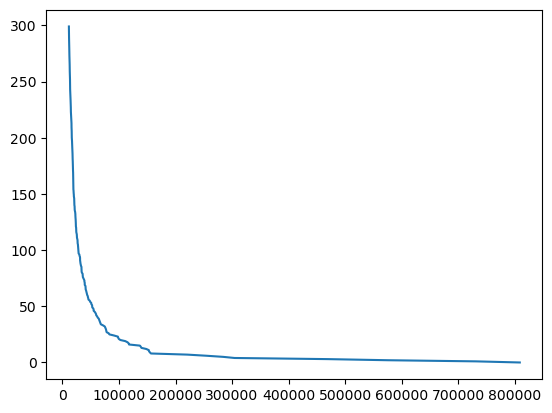

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

freqs = list(freq_dict.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

–î–∞, —É–±—ã–≤–∞–µ—Ç —Å—Ç—Ä–µ–º–∏—Ç–µ–ª—å–Ω–æ

–ù—É –∏ –Ω–∞ –∑–∞–∫–æ–Ω –•–∏–ø—Å–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º –ø–æ –Ω–∞—à–µ–º—É —Ç–µ–∫—Å—Ç—É:
–° —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–∞ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–æ–∫–µ–Ω–æ–≤), –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∑–∞–∫–æ–Ω–æ–º,—á–µ–º –±–æ–ª—å—à–µ –∫–æ—Ä–ø—É—Å, —Ç–µ–º –º–µ–Ω—å—à–µ –Ω–æ–≤—ã—Ö —Å–ª–æ–≤ –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è —Å –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º –Ω–æ–≤—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤. –í –∫–∞–∫–æ–π-—Ç–æ –º–æ–º–µ–Ω—Ç –∫–æ—Ä–ø—É—Å –Ω–∞—Å—ã—â–∞–µ—Ç—Å—è.



from tqdm import tqdm

cnt = Counter()
n_words = []
n_tokens = []
tokens = []
for index, row in tqdm(data.iterrows(), total = len(data)):
    tokens = word_tokenize(row['Review'])
    cnt.update([token for token in tokens if token not in punctuation])
    n_words.append(len(cnt))
    n_tokens.append(sum(cnt.values()))

fig, ax = plt.subplots()
ax.plot(n_tokens, n_words)
plt.title('–∑–∞–∫–æ–Ω –•–∏–ø—Å–∞ '+ CR + ' –∑–∞–º–µ–¥–ª–µ–Ω–∏–µ –ø—Ä–∏—Ä–æ—Å—Ç–∞ —á–∞—Å—Ç–æ—Ç —Å–ª–æ–≤'+ CR+'–ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ —á–∏—Å–ª–∞ —Ç–µ–∫—Å—Ç–æ–≤')
plt.show()

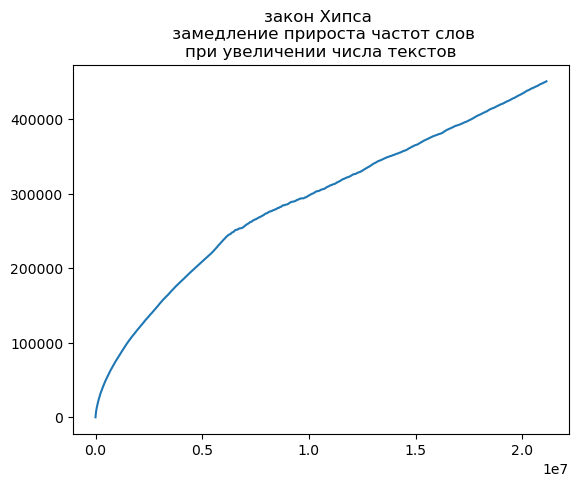

–ò —Å –ø–æ–º–æ—â—å—é —ç—Ç–æ–≥–æ (–æ—á–µ–Ω—å –¥–æ–ª–≥–æ–≥–æ, –Ω–∞–¥–æ —Å–∫–∞–∑–∞—Ç—å) –∫–æ–¥–∞ –º—ã —É–±–µ–¥–∏–ª–∏—Å—å, —á—Ç–æ –∑–∞–∫–æ–Ω –•–∏–ø—Å–∞ –Ω–∞ –Ω–∞—à–µ–º —Ç–µ–∫—Å—Ç–µ —Ä–∞–±–æ—Ç–∞–µ—Ç, —Ö–æ—Ç—è –¥–æ —Å–∏–ª—å–Ω–æ–≥–æ –∑–∞–º–µ–¥–ª–µ–Ω–∏—è –º—ã –µ—â—ë –Ω–µ –¥–æ—à–ª–∏, –Ω—É–∂–Ω–æ –±–æ–ª—å—à–µ —Ç–µ–∫—Å—Ç–æ–≤, –Ω–æ —É–∂–µ –∑–∞–º–µ–¥–ª–∏–ª–∏—Å—å.

## –°—Ç–æ–ø-—Å–ª–æ–≤–∞ –∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏—è

–°—Ç–æ–ø-—Å–ª–æ–≤–∞: —Å–æ—é–∑—ã, —Å–≤—è–∑–∫–∏, –º–µ—Å—Ç–æ–∏–º–µ–Ω–∏—è - —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –∏ –Ω–µ –ø—Ä–∏–≤–Ω–æ—Å—è—Ç –Ω–∏—á–µ–≥–æ —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–æ–≥–æ. –≠—Ç–æ—à—É–º –∏ –º—ã –∏—Ö —É–±–µ—Ä—ë–º, –∫–∞–∫ –∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é, –Ω–æ —Å –ø—É–Ω–∫—Ç—É–∞—Ü–∏–µ–π –µ—â—ë, –≤–æ–∑–º–æ–∂–Ω–æ, –ø–æ—Ä–∞–±–æ—Ç–∞–µ–º –ø–æ–∑–∂–µ.

In [71]:
print(stopwords.words('russian'))

['–∏', '–≤', '–≤–æ', '–Ω–µ', '—á—Ç–æ', '–æ–Ω', '–Ω–∞', '—è', '—Å', '—Å–æ', '–∫–∞–∫', '–∞', '—Ç–æ', '–≤—Å–µ', '–æ–Ω–∞', '—Ç–∞–∫', '–µ–≥–æ', '–Ω–æ', '–¥–∞', '—Ç—ã', '–∫', '—É', '–∂–µ', '–≤—ã', '–∑–∞', '–±—ã', '–ø–æ', '—Ç–æ–ª—å–∫–æ', '–µ–µ', '–º–Ω–µ', '–±—ã–ª–æ', '–≤–æ—Ç', '–æ—Ç', '–º–µ–Ω—è', '–µ—â–µ', '–Ω–µ—Ç', '–æ', '–∏–∑', '–µ–º—É', '—Ç–µ–ø–µ—Ä—å', '–∫–æ–≥–¥–∞', '–¥–∞–∂–µ', '–Ω—É', '–≤–¥—Ä—É–≥', '–ª–∏', '–µ—Å–ª–∏', '—É–∂–µ', '–∏–ª–∏', '–Ω–∏', '–±—ã—Ç—å', '–±—ã–ª', '–Ω–µ–≥–æ', '–¥–æ', '–≤–∞—Å', '–Ω–∏–±—É–¥—å', '–æ–ø—è—Ç—å', '—É–∂', '–≤–∞–º', '–≤–µ–¥—å', '—Ç–∞–º', '–ø–æ—Ç–æ–º', '—Å–µ–±—è', '–Ω–∏—á–µ–≥–æ', '–µ–π', '–º–æ–∂–µ—Ç', '–æ–Ω–∏', '—Ç—É—Ç', '–≥–¥–µ', '–µ—Å—Ç—å', '–Ω–∞–¥–æ', '–Ω–µ–π', '–¥–ª—è', '–º—ã', '—Ç–µ–±—è', '–∏—Ö', '—á–µ–º', '–±—ã–ª–∞', '—Å–∞–º', '—á—Ç–æ–±', '–±–µ–∑', '–±—É–¥—Ç–æ', '—á–µ–≥–æ', '—Ä–∞–∑', '—Ç–æ–∂–µ', '—Å–µ–±–µ', '–ø–æ–¥', '–±—É–¥–µ—Ç', '–∂', '—Ç–æ–≥–¥–∞', '–∫—Ç–æ', '—ç—Ç–æ—Ç', '—Ç–æ–≥–æ', '–ø–æ—Ç–æ–º—É', '—ç—Ç–æ–≥–æ', '–∫–∞–∫–æ–π', '—Å–æ–≤—Å–µ–º', '–Ω–∏–º', '–∑

In [72]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
noise = stopwords.words('russian') + list(punctuation)+ ['``', "''",'--',"//", '/']
len(noise)

188

In [74]:
excl_list = ['—Ö–æ—Ä–æ—à–æ', '–∏–Ω–æ–≥–¥–∞', '–ª—É—á—à–µ','–Ω–µ', '–Ω–∏–∫–æ–≥–¥–∞','–Ω–∏—á–µ–≥–æ', "!", '–Ω–µ–ª—å–∑—è', '—Å–æ–≤—Å–µ–º', '–ø–æ—á—Ç–∏', '–±–æ–ª–µ–µ', '–≤—Å–µ–≥–¥–∞', ]

In [75]:
noise = [x for x in noise if x not in  excl_list]
len(noise)

176

–í—ã–±–µ—Ä–µ–º —Å–∞–º—ã–µ —á–∞—Å—Ç–æ—Ç–Ω—ã–µ –Ω-–≥—Ä–∞–º–º—ã. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è CountVectorizer –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –Ω–∞ 2

In [76]:
vec_cv = CountVectorizer(ngram_range=(2, 3), min_df=0.04, max_df = 0.1, tokenizer=word_tokenize, stop_words=noise)
counts_tr = vec_cv.fit_transform(train_x['Review'])

# –°–æ–∑–¥–∞–Ω–∏–µ DataFrame –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã
df_counts_tr = pd.DataFrame(counts_tr.toarray(), columns=vec_cv.get_feature_names_out())




C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [77]:
# –ü–æ–¥—Å—á—ë—Ç —Å—É–º–º—ã –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ (–±–∏–≥—Ä–∞–º–º—ã)
df_counts_tr = pd.DataFrame(counts_tr.toarray(), columns=vec_cv.get_feature_names_out())
freq_ngramms = df_counts_tr.sum(axis=0).sort_values(ascending=False)


In [78]:
freq_ngramms[:25]

! !           89203
! ! !         53440
—Ç–µ–ª–µ—Ñ–æ–Ω –Ω–µ    14646
dtype: int64

–î–æ–±–∞–≤–∏–º –∏—Å–∫–ª—é—á–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤ –≤ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä, –∞—Ä–≥—É–º–µ–Ω—Ç `stop_words`.

In [79]:
vec = CountVectorizer(ngram_range=(2, 3), tokenizer=word_tokenize, stop_words=noise)

In [80]:
vec_tr = TfidfVectorizer(ngram_range=(1, 2), max_df=0.4, tokenizer=word_tokenize, stop_words=noise)
bow_tr = vec_tr.fit_transform(train_x['Review'])

vec_train = pd.DataFrame.sparse.from_spmatrix(bow_tr, columns=vec_tr.get_feature_names_out()
                                             )

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [81]:
list_ngramm_imp = vec_train.columns
len(list_ngramm_imp)

4397443

In [82]:
ngramm_imp = vec_train.sum().sort_values(ascending = False)


In [83]:
ngramm_imp.head(20)

!             8466.228999
! !           4430.988345
–æ—á–µ–Ω—å         4249.679121
—ç—Ç–æ           3163.504979
—Å–æ–≤–µ—Ç—É—é       2291.856054
—Ö–æ—Ä–æ—à–∏–π       2253.604127
–∞–ø–ø–∞—Ä–∞—Ç        2184.45726
–æ—Ç–ª–∏—á–Ω—ã–π       2181.77416
...           2152.079212
–¥–æ–≤–æ–ª–µ–Ω       2097.722977
–¥–µ–Ω—å–≥–∏        1991.983119
–ø—Ä–æ—Å—Ç–æ        1873.422255
—Ü–µ–ª–æ–º         1831.592371
–º–æ–¥–µ–ª—å        1710.712528
–≥–æ–¥–∞          1641.758763
—Ä–µ–∫–æ–º–µ–Ω–¥—É—é    1609.499959
–ª—É—á—à–µ         1605.751601
—Å–º–∞—Ä—Ç—Ñ–æ–Ω      1586.139767
—Ä–∞–±–æ—Ç–∞–µ—Ç      1558.720051
–∫—É–ø–∏–ª         1543.100133
dtype: Sparse[float64, 0]

In [84]:
vec_tr.get_feature_names_out()[:40]


array(['!', '! !', "! '–ø–µ–Ω—Ç–∞–π–ª", '! ++++++++++++++++++++++++++++++++++',
       '! +-20000', '! +/-', '! +100500', '! +32+38', '! +5', '! +–≤–∫–ª',
       '! +–∂–∏–≤—É—á–µ—Å—Ç—å.—Å–∫–æ–ª—å–∫–æ', '! +–∏-', '! +–∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ', '! +–∫–∞–º–µ—Ä–∞',
       '! +–∫–æ', '! +–∫—É—á–∞', '! +–º–∏–Ω—É—Å—ã', '! +–æ–±–Ω–∞—Ä—É–∂–∏–ª–∏', '! +–æ—Ç',
       '! +–ø–æ—Ç—Ä—è—Å–∞—é—â–∏–π', '! +–ø—Ä—è–º', '! +—É–º–µ–µ—Ç', '! +—Ñ–ª–µ—Ö–∞', '! ,—Ç–µ–º',
       '! -/-/-/–ø–µ—Ä–µ—à—ë–ª', '! -10', '! -100/10', '! -38', '! -battery',
       '! -d', '! -wlan', '! -–∞', '! -–∞–≤—Ç–æ—Ñ–æ–∫—É—Å–∞', '! -–∞–∫–∫—É–º–∞',
       '! -–∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä', '! -–±–∞—Ç–∞—Ä–µ—è', '! -–±–µ–ª–∞—è', '! -–≤', '! -–≤–µ—Ä–Ω—É–ª—Å—è',
       '! -–≤–∏–¥–µ–æ–ø–ª–µ–µ—Ä'], dtype=object)

In [85]:
vec_ts = TfidfVectorizer(ngram_range=(1, 2), max_df=0.4, tokenizer=word_tokenize, stop_words=noise)
bow_ts = vec_ts.fit_transform(test_x['Review'])

vec_test = pd.DataFrame.sparse.from_spmatrix(bow_ts, columns=vec_ts.get_feature_names_out()
                                             )

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [86]:
len(vec_train), len(vec_test), 

(343375, 114459)

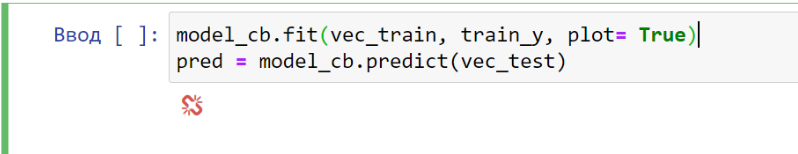

–Ø–¥—Ä–æ —É–º–∏—Ä–∞–µ—Ç —Å–Ω–æ–≤–∞, –ø–æ–π–¥—ë–º —á–µ—Ä–µ–∑ PCA


In [87]:
pca_train = pca.fit_transform(vec_train)

In [88]:
pca_test = pca.fit_transform(vec_test)
pd.DataFrame(pca_test).head()

0         1         2         3         4         5         6   \
0 -0.031202 -0.004671 -0.000985  0.035634 -0.008069 -0.009090 -0.000761   
1 -0.029123 -0.017379 -0.008604 -0.008167 -0.003427 -0.013824  0.006266   
2  0.039560 -0.009395 -0.006523 -0.006914 -0.000147 -0.002861  0.002424   
3 -0.027980  0.057690 -0.042573  0.005008  0.010700 -0.027963  0.015856   
4 -0.026454  0.119731  0.123360  0.527480 -0.056013  0.055689 -0.116030   

         7         8         9   ...        90        91        92        93  \
0 -0.000686 -0.011427 -0.013959  ... -0.038157 -0.033970 -0.060934 -0.018974   
1 -0.007550 -0.003345 -0.004162  ...  0.020351  0.017544  0.019849  0.021749   
2 -0.006022 -0.010049  0.005089  ...  0.046533 -0.121205 -0.010541 -0.039418   
3 -0.008018  0.081307  0.002144  ...  0.014355 -0.000461 -0.016830 -0.003104   
4  0.024518 -0.151814  0.228902  ... -0.055202 -0.029335  0.034717 -0.003690   

         94        95        96        97        98        99  
0 -0.070660  0.040892  0.007944  0.037697 -0.006507  0.022051  
1  0.020406 -0.012352  0.008948  0.001712  0.023989  0.003342  
2  0.021474 -0.062781 -0.046597  0.003711 -0.017670 -0.009158  
3  0.010211  0.006349 -0.009535 -0.006031  0.002784  0.019734  
4 -0.108847 -0.074654  0.124660 -0.056616  0.147102 -0.080962  

[5 rows x 100 columns]

In [89]:
model_cb.fit(pca_train, train_y, plot= True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [90]:
train_pred = model_cb.predict(pca_result)
proba_train = model_cb.predict_proba(pca_result)
 
test_pred = model_cb.predict(pca_test)
proba_test = model_cb.predict_proba(pca_test)

confusion = confusion_matrix(test_y, test_pred)

print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y,  proba_test, multi_class='ovr')
print('AUC train: ', auc_tr)
print('AUC test: ', auc_test)


              precision    recall  f1-score   support

           1       0.35      0.08      0.13      8652
           2       0.23      0.08      0.12      8867
           3       0.22      0.17      0.19     13286
           4       0.29      0.22      0.25     26766
           5       0.57      0.79      0.66     56888

    accuracy                           0.48    114459
   macro avg       0.33      0.27      0.27    114459
weighted avg       0.42      0.48      0.43    114459


Confusion Matrix

[[  687   708  1255  1466  4536]
 [  421   686  1479  1705  4576]
 [  332   630  2208  2870  7246]
 [  194   444  2237  5947 17944]
 [  343   533  2723  8191 45098]]
AUC train:  0.5147518924701783
AUC test:  0.6750934345576314


In [91]:
mse = mean_squared_error(test_y, test_pred)

rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)

Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.4122569296750862
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.888641347556767
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: -0.2439926116578044


–õ—É—á—à–µ? –ù—É...–Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ. –ü—Ä–æ–¥–æ–ª–∂–∏–º –∏–∑—ã—Å–∫–∞–Ω–∏—è.

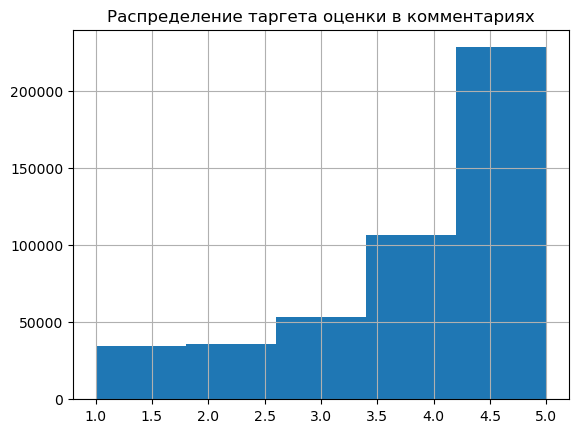

In [92]:
pd.Series(y).hist( bins = 5)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞ –æ—Ü–µ–Ω–∫–∏ –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö')
plt.show()

–¢–∞–∫-—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ –º–∞—Ç—Ä–∏—Ü–µ –ø–æ—Ö–æ–∂–µ, –Ω–æ –º–∏–º–æ - —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ.

## –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è

–°–¥–µ–ª–∞–µ–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–æ–≤. –í–µ—Ä–Ω–µ–º —Å–ª–æ–≤–∞ –∫ –∏—Ö –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ ‚Äì *–ª–µ–º–º–µ*. 


In [93]:
mystem_analyzer.analyze(X['Review'][0])

[{'text': '3D'},
 {'text': ' '},
 {'analysis': [], 'text': 'Touch'},
 {'text': ' '},
 {'analysis': [{'lex': '–ø—Ä–æ—Å—Ç–æ', 'wt': 0.7704013228, 'gr': 'PART='}],
  'text': '–ø—Ä–æ—Å—Ç–æ'},
 {'text': ' '},
 {'analysis': [{'lex': '–≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω—ã–π', 'wt': 1, 'gr': 'A=–∏–º,–µ–¥,–ø–æ–ª–Ω,–∂–µ–Ω'}],
  'text': '–≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è'},
 {'text': ' '},
 {'analysis': [{'lex': '–≤–µ—â—å', 'wt': 1, 'gr': 'S,–∂–µ–Ω,–Ω–µ–æ–¥=(–≤–∏–Ω,–µ–¥|–∏–º,–µ–¥)'}],
  'text': '–≤–µ—â—å'},
 {'text': '! '},
 {'analysis': [{'lex': '–∑–∞—Ä—è–¥', 'wt': 1, 'gr': 'S,–º—É–∂,–Ω–µ–æ–¥=(–≤–∏–Ω,–µ–¥|–∏–º,–µ–¥)'}],
  'text': '–ó–∞—Ä—è–¥'},
 {'text': ' '},
 {'analysis': [{'lex': '–¥–µ—Ä–∂–∞—Ç—å',
    'wt': 1,
    'gr': 'V,–Ω–µ—Å–æ–≤,–ø–µ=–Ω–µ–ø—Ä–æ—à,–µ–¥,–∏–∑—ä—è–≤,3-–ª'}],
  'text': '–¥–µ—Ä–∂–∏—Ç'},
 {'text': ' '},
 {'analysis': [{'lex': '—Ü–µ–ª—ã–π',
    'wt': 1,
    'gr': 'A=(–≤–∏–Ω,–µ–¥,–ø–æ–ª–Ω,–º—É–∂,–Ω–µ–æ–¥|–∏–º,–µ–¥,–ø–æ–ª–Ω,–º—É–∂)'}],
  'text': '—Ü–µ–ª—ã–π'},
 {'text': ' '},
 {'analysis': [{'lex

—Ç–µ–ø–µ—Ä—å –∏—Å–ø–æ–ª—å–∑—É–µ–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ç–æ—Ä –º–∞–π—Å—Ç–µ–º–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞.

In [94]:
def my_preproc(text, stopwords = noise):
    text = re.sub('[{}]'.format(punctuation), '', text)
    text = mystem_analyzer.lemmatize(text)
    return [word for word in text if word not in stopwords]

vec_tr = TfidfVectorizer(ngram_range=(1, 1), max_df=0.4, tokenizer=my_preproc)
bow_tr = vec_tr.fit_transform(train_x['Review'])

vec_train = pd.DataFrame.sparse.from_spmatrix(bow_tr, columns=vec_tr.get_feature_names_out()
                                             )


In [95]:
vec_tr = TfidfVectorizer(ngram_range=(1, 1), max_df=0.4, tokenizer=my_preproc)
bow_ts = vec_ts.fit_transform(test_x['Review'])

vec_test = pd.DataFrame.sparse.from_spmatrix(bow_ts, columns=vec_ts.get_feature_names_out()
                                             )

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [96]:
len(vec_train), len(vec_test)

(343375, 114459)

–î–∞, –æ–ø—è—Ç—å —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–∏–µ, –†–°–ê:

In [97]:
pca_train = pca.fit_transform(vec_train)
pca_test = pca.fit_transform(vec_test)
pd.DataFrame(pca_test).head()

0         1         2         3         4         5         6   \
0 -0.031202 -0.004671 -0.000985  0.035634 -0.008069 -0.009090 -0.000761   
1 -0.029123 -0.017379 -0.008604 -0.008167 -0.003427 -0.013824  0.006266   
2  0.039560 -0.009395 -0.006523 -0.006914 -0.000147 -0.002861  0.002424   
3 -0.027980  0.057690 -0.042573  0.005008  0.010700 -0.027963  0.015856   
4 -0.026454  0.119731  0.123360  0.527480 -0.056013  0.055689 -0.116030   

         7         8         9   ...        90        91        92        93  \
0 -0.000686 -0.011427 -0.013959  ... -0.038157 -0.033970 -0.060934 -0.018974   
1 -0.007550 -0.003345 -0.004162  ...  0.020351  0.017544  0.019849  0.021749   
2 -0.006022 -0.010049  0.005089  ...  0.046533 -0.121205 -0.010541 -0.039418   
3 -0.008018  0.081307  0.002144  ...  0.014355 -0.000461 -0.016830 -0.003104   
4  0.024518 -0.151814  0.228902  ... -0.055202 -0.029335  0.034717 -0.003690   

         94        95        96        97        98        99  
0 -0.070660  0.040892  0.007944  0.037697 -0.006507  0.022051  
1  0.020406 -0.012352  0.008948  0.001712  0.023989  0.003342  
2  0.021474 -0.062781 -0.046597  0.003711 -0.017670 -0.009158  
3  0.010211  0.006349 -0.009535 -0.006031  0.002784  0.019734  
4 -0.108847 -0.074654  0.124660 -0.056616  0.147102 -0.080962  

[5 rows x 100 columns]

In [98]:
model_cb.fit(pca_train, train_y, plot= True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [99]:
train_pred = model_cb.predict(pca_result)
proba_train = model_cb.predict_proba(pca_result)
 
test_pred = model_cb.predict(pca_test)
proba_test = model_cb.predict_proba(pca_test)

confusion = confusion_matrix(test_y, test_pred)
print(CR + classification_report(test_y,test_pred)) 
print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y,  proba_test, multi_class='ovr')
print('AUC train: ', auc_tr)
print('AUC test: ', auc_test)


              precision    recall  f1-score   support

           1       0.35      0.08      0.13      8652
           2       0.23      0.08      0.12      8867
           3       0.22      0.17      0.19     13286
           4       0.29      0.22      0.25     26766
           5       0.57      0.79      0.66     56888

    accuracy                           0.48    114459
   macro avg       0.33      0.27      0.27    114459
weighted avg       0.42      0.48      0.43    114459


Confusion Matrix

[[  687   708  1255  1466  4536]
 [  421   686  1479  1705  4576]
 [  332   630  2208  2870  7246]
 [  194   444  2237  5947 17944]
 [  343   533  2723  8191 45098]]
AUC train:  0.5147518924701783
AUC test:  0.6750934345576314


In [100]:
mse = mean_squared_error(test_y, test_pred)
rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)

Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.4122569296750862
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.888641347556767
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: -0.2439926116578044


## –†–µ–≥—É–ª—è—Ä–Ω—ã–µ –≤—ã—Ä–∞–∂–µ–Ω–∏—è
–ü–æ–ø—Ä–æ–±—É–µ–º –¥–ª—è –Ω–∞—à–µ–≥–æ –Ω–µ –ø–æ–¥–¥–∞—é—â–µ–≥–æ—Å—è –ø–æ–∫–∞ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ —Å–ª—É—á–∞—è –æ—Å–æ–±—ã–π —Å–ø–æ—Å–æ–± —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ - —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å —Ä–µ–≥—É–ª—è—Ä–∫—É. –ò–ª–∏, 

–°–æ–∑–¥–∞–¥–∏–º –æ—Ç–±–æ—Ä—â–∏–∫–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –∏ —Ä–µ–≥. –≤—ã—Ä–∞–∂–µ–Ω–∏–π

In [101]:
vec_tfidf = TfidfVectorizer(ngram_range=(2, 2), max_df=0.4, tokenizer=word_tokenize, stop_words=noise)
bow_5 = vec_tfidf.fit_transform(data[data['Rating']>3]['Review'])


C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [102]:
vec_df_5 = pd.DataFrame.sparse.from_spmatrix(bow_5, columns=vec_tfidf.get_feature_names_out())

In [103]:
bow_2 = vec_tfidf.fit_transform(data[data['Rating']<=3]['Review'])
vec_df_2 = pd.DataFrame.sparse.from_spmatrix(bow_2, columns=vec_tfidf.get_feature_names_out())

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [104]:
# –ü–æ–¥—Å—á—ë—Ç —Å—É–º–º—ã –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ (–±–∏–≥—Ä–∞–º–º—ã)
freq_ngramms_5 = vec_df_5.sum(axis=0).sort_values(ascending=False)
freq_ngramms_2 = vec_df_2.sum(axis=0).sort_values(ascending=False)


In [105]:
freq_ngramms_5[:50]

! !                  5107.848135
–æ—Ç–ª–∏—á–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω     1751.510777
—Ö–æ—Ä–æ—à–∏–π —Ç–µ–ª–µ—Ñ–æ–Ω      1494.390982
–Ω–µ –ø–æ–∂–∞–ª–µ–µ—Ç–µ         1203.933807
—Å–≤–æ–∏ –¥–µ–Ω—å–≥–∏          1180.461825
–æ—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω        1152.580456
–æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–π         921.779516
–±–µ—Ä–∏—Ç–µ –Ω–µ             896.671487
—Ç–µ–ª–µ—Ñ–æ–Ω –Ω–µ            867.665849
–≤—Å–µ–º —Å–æ–≤–µ—Ç—É—é          862.104228
—Ç–∞–∫–∏–µ –¥–µ–Ω—å–≥–∏          843.940701
—Ç–µ–ª–µ—Ñ–æ–Ω –æ—á–µ–Ω—å         827.299757
—Ç–µ–ª–µ—Ñ–æ–Ω !             811.072087
—Å–≤–æ–∏—Ö –¥–µ–Ω–µ–≥           750.746164
–æ—á–µ–Ω—å –¥–æ–≤–æ–ª—å–Ω–∞        688.378403
–Ω–µ –∂–∞–ª–µ—é               687.94082
—Ç–∞–∫—É—é —Ü–µ–Ω—É            684.074989
—Ç–µ–ª–µ—Ñ–æ–Ω —Ö–æ—Ä–æ—à–∏–π        647.76937
—Ä–∞–∑—É –Ω–µ               647.137952
—ç—Ç–æ –Ω–µ                  642.2174
–ø–æ–∫–∞ –Ω–µ               603.035951
—Ç–µ–ª–µ—Ñ–æ–Ω –æ—Ç–ª–∏—á–Ω—ã–π      596.339216
–æ—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç      590.661918
—Ü–µ–ª–æ–

In [106]:
freq_ngramms_2[freq_ngramms_2>1]

! !                     2176.76402
–Ω–µ —Å–æ–≤–µ—Ç—É—é             1095.574984
–Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é           564.588124
—Ç–µ–ª–µ—Ñ–æ–Ω –Ω–µ              537.257187
–Ω–µ —Å—Ç–æ–∏—Ç                441.044492
                          ...     
–ª–∞–≥–∏ –∫–æ—Ç–æ—Ä—ã–µ              1.000023
–Ω–æ—Ä–º –±–∞—Ç–∞—Ä–µ—é              1.000018
4000—Ä—É–±–ª–µ–π –º–∞–∫—Å–∏–º—É–º       1.000006
—Å—Ç–æ–∏—Ç 4000—Ä—É–±–ª–µ–π          1.000006
–º–∞–∫—Å–∏–º—É–º 500              1.000006
Length: 85783, dtype: Sparse[float64, 0]

In [107]:
freq_ngramms_2 = freq_ngramms_2.reset_index()
freq_ngramms_2

index            0
0                  ! !   2176.76402
1           –Ω–µ —Å–æ–≤–µ—Ç—É—é  1095.574984
2        –Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é   564.588124
3           —Ç–µ–ª–µ—Ñ–æ–Ω –Ω–µ   537.257187
4             –Ω–µ —Å—Ç–æ–∏—Ç   441.044492
...                ...          ...
1455301  –æ—Å–Ω–æ–≤–Ω—ã–µ —ç—Ç–∏–º     0.024727
1455302  –≤—ã–π–¥–µ—Ç —Å–ø–∏—Å–æ–∫     0.024727
1455303      –≤—Å—ë –∫—Ä—É—á–µ     0.024727
1455304      —Å–æ—Ñ—Ç –∑–≤—É–∫     0.024727
1455305  —Å–¥–µ–ª–∞—Ç—å –Ω–æ–≤–æ–º     0.024727

[1455306 rows x 2 columns]

In [108]:
list_freq_2gramm = set(list(freq_ngramms_2[freq_ngramms_2[0]>1]['index']))
len(list_freq_2gramm)

85783

In [109]:
freq_ngramms_5 = freq_ngramms_5.reset_index()
freq_ngramms_5

index            0
0                        ! !  5107.848135
1           –æ—Ç–ª–∏—á–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω  1751.510777
2            —Ö–æ—Ä–æ—à–∏–π —Ç–µ–ª–µ—Ñ–æ–Ω  1494.390982
3               –Ω–µ –ø–æ–∂–∞–ª–µ–µ—Ç–µ  1203.933807
4                —Å–≤–æ–∏ –¥–µ–Ω—å–≥–∏  1180.461825
...                      ...          ...
3434073      —á–µ–º-—Ç–æ –∑–∞–±–∏–≤–∞–µ—Ç     0.019867
3434074         –±–µ—Ä–Ω–¥ –¥–µ–ª–∞–µ—Ç     0.019867
3434075   –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏–∏ –ø–µ—Ä–≤–æ–π     0.019867
3434076  –æ—Ç–∫–ª—é—á–∞—Ç –∑–∞–∫—Ä–∞—Å–∏—Ç—Å—è     0.019867
3434077           –∞-–ª—è –≥–æ–ª—ã–π     0.019867

[3434078 rows x 2 columns]

In [110]:
list_freq_ngramm_5 = set(list(freq_ngramms_5[freq_ngramms_5[0]>0]['index']))
len(list_freq_ngramm_5)

3434078

In [111]:

list_only_2_ng = [x for x in list_freq_2gramm if x not in list_freq_ngramm_5]
len(list_only_2_ng)

16389

In [112]:
list_freq_ngramm_5 = set(list(freq_ngramms_5[freq_ngramms_5[0]>1.2]['index']))
len(list_freq_ngramm_5)

181911

In [113]:
list_freq_2gramm = set(list(freq_ngramms_2['index']))
len(list_freq_2gramm)

1455306

In [114]:
list_only_5_ng = [x for x in list_freq_ngramm_5 if x not in list_freq_2gramm]
len(list_only_5_ng)

62208

–ò –º—ã –ø–æ–ª—É—á–∏–ª–∏ 2 —Å–ø–∏—Å–∫–∞ –Ω-–≥—Ä–∞–º–º, —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã—Ö –∫–∞–∂–¥—ã–π –¥–ª—è —Å–≤–æ–µ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –æ—Ç–∑—ã–≤–æ–≤, –∏—Å–∫–ª—é—á–∏–≤ –æ–±—â–µ–µ. –û–±—ä–µ–¥–∏–Ω–∏–º –∏—Ö:

In [115]:
list_columns_to_check = set(list_only_2_ng+list_only_5_ng)
len(list_columns_to_check)

78597

–¢–µ–ø–µ—Ä—å —Å–Ω–æ–≤–∞ –ø–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–∫–∏ 2-–º–µ—Ä–Ω—ã—Ö –Ω-–≥—Ä–∞–º–º —Ç—Ä—ç–π–Ω–∞ –∏ —Ç–µ—Å—Ç–∞

In [116]:
X= data.drop('Rating',axis = 1)
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                   test_size=TEST_SIZE, random_state=RS,
                                                   )

In [117]:
vec_tr = TfidfVectorizer(ngram_range=(2, 2), max_df=0.4,  tokenizer=word_tokenize, stop_words=noise)
bow_tr = vec_tr.fit_transform(train_x['Review'])

vec_train = pd.DataFrame.sparse.from_spmatrix(bow_tr, columns=vec_tr.get_feature_names_out()
                                             )


C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [118]:
vec_ts = TfidfVectorizer(ngram_range=(2, 2), max_df=0.4, tokenizer=word_tokenize, stop_words=noise)
bow_ts = vec_ts.fit_transform(test_x['Review'])

vec_test = pd.DataFrame.sparse.from_spmatrix(bow_ts, columns=vec_ts.get_feature_names_out()
                                             )

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


–û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –≤—Ö–æ–¥—è—Ç –≤ –Ω–∞—à –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏–∞—Ü–∏–æ–Ω–Ω—ã–π –ª–∏—Å—Ç

In [119]:
list_columns_train_all = set(vec_train.columns)
list_columns_train_left = [x for x in list_columns_to_check if x in list_columns_train_all]

vec_train= vec_train[list_columns_train_left]

In [120]:
list_columns_test_all = set(vec_test.columns)
list_columns_test_left = [x for x in list_columns_train_left if x in list_columns_test_all]


vec_test= vec_test[list_columns_test_left]

In [121]:
list_columns_train_left = set(list_columns_train_left)
list_columns_test_left = set(list_columns_test_left)
list_columns_train_drop = [x for x in list_columns_train_left if x not in list_columns_test_left]
len(list_columns_train_drop)


13631

–ù–∞–æ–±–æ—Ä–æ—Ç –Ω–µ –¥–æ–ª–∂–Ω–æ –±—ã–ª–æ –æ—Å—Ç–∞—Ç—å—Å—è, –Ω–æ –ø—Ä–æ–≤–µ—Ä–∏–º

In [122]:
list_columns_test_drop = [x for x in list_columns_test_left if x not in list_columns_train_left]
len(list_columns_test_drop)

0

In [123]:
vec_train= vec_train.drop(list_columns_train_drop, axis = 1)


In [124]:
vec_train.columns == vec_test.columns 

array([ True,  True,  True, ...,  True,  True,  True])

In [125]:
def check_cat_good(row):
    try:
        for sub_string in strings:
            pattern = re.compile(r'\b{}\b'.format(sub_string+'*'))
            result = pattern.search(row['Review'])
            if result:
                return 1 
    except:
        return 0

strings = [ '–æ—Ç–ª–∏—á–Ω—ã–π','–æ—Ç–ª–∏—á–Ω–æ–µ','–æ—Ç–ª–∏—á–Ω–∞—è','–æ—Ç–ª–∏—á–Ω–æ','–æ—Ç–ª–∏—á–Ω—ã–µ',
           '–¥–æ–≤–æ–ª–µ–Ω','–¥–æ–≤–æ–ª—å–Ω–∞',
           '–ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–π','–ø—Ä–µ–∫—Ä–∞—Å–Ω–æ','–ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–µ','–ø—Ä–µ–∫—Ä–∞—Å–Ω–æ–µ','–ø—Ä–µ–∫—Ä–∞—Å–Ω–∞—è',

           
          ]

X['good_cat'] = X.apply(check_cat_good, axis = 1)
X['good_cat'] = X['good_cat'].fillna(0)
X['good_cat'].value_counts()

good_cat
0.0    354338
1.0    103496
Name: count, dtype: int64

In [126]:
def check_cat_bad(row):
    try:
        for sub_string in strings:
            pattern = re.compile(r'\b{}\b'.format(sub_string+'*'))
            result = pattern.search(row['Review'])
            if result:
                return 1 
    except:
        return 0

strings = [ '–ø–ª–æ—Ö–æ','–ø–ª–æ—Ö','–Ω–µ —Å–æ–≤–µ—Ç', '–Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥','–Ω–µ —Å—Ç–æ–∏—Ç', '—Ä–∞–∑–æ—á–∞—Ä–æ–≤–∞–Ω', '–Ω–µ –±–µ—Ä–∏—Ç',
           '–æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ','–æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω','—Å–ª–æ–º–∞–ª', '–æ–±—Ä–∞—Ç–Ω–æ –≤ –º–∞–≥–∞–∑–∏–Ω',
           '—É–∂–∞—Å–Ω', '–ø–æ–∂–∞–ª–µ–ª','–Ω–µ –ø–æ–∫—É–ø', '–ø–µ—Ä–µ—Å—Ç–∞–ª —Ä–∞–±–æ—Ç–∞—Ç—å','–Ω–∏ –≤ –∫–æ–µ–º'
           '–∂–∞–ª–µ', '–¥–µ–Ω—å–≥–∏ –Ω–∞ –≤–µ—Ç–µ—Ä'
           
          ]

X['bad_cat'] = X.apply(check_cat_bad, axis = 1)
X['bad_cat'].value_counts()

bad_cat
1.0    30782
Name: count, dtype: int64

In [127]:
X['bad_cat'] = X['bad_cat'].fillna(0)


In [128]:
strings = ['((']# —ç—Ç–∏—Ö –Ω–µ—Ç'(((', ':(((',':(',]

In [129]:
X['bad_smile_cat'] = X.apply(check_cat_bad, axis = 1)
X['bad_smile_cat'].value_counts()

bad_smile_cat
0    457834
Name: count, dtype: int64

In [130]:
strings = [ ')))'] #–ò —ç—Ç–∏—Ö –Ω–µ—Ç -'ü§£', '‚ù§Ô∏è','üòç','üòä'] # —ç—Ç–∏—Ö –Ω–µ—Ç ':)))', ':)', ')))']

In [131]:
X['good_smile_cat'] = X.apply(check_cat_good, axis = 1)
X['good_smile_cat'].value_counts()

good_smile_cat
0    457834
Name: count, dtype: int64

–°–º–∞–π–ª–æ–≤ –Ω–µ –Ω–∞—à–ª–∏. –ê –∂–∞–ª—å, –º–æ–≥–ª–æ –±—ã –ø–æ–º–æ—á—å. –ù–æ —ç—Ç–æ –±—ã–ª–∏ –æ—á–µ–Ω—å —Å–µ—Ä—å—ë–∑–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏

In [132]:
pd.crosstab(X['bad_cat'], y).style.background_gradient(cmap='summer_r')

–û–¥–Ω–æ–∑–Ω–∞—á–Ω–æ —Ç—É—Ç –º—ã –Ω–µ —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ –ø–æ–π–º–∞–ª–∏. –ù–æ —Ç–µ–º –Ω–µ –º–µ–Ω–µ–µ, –≤ 1-2 —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ 20/3 (–æ–∫–æ–ª–æ 6), –∞ –≤ 5 152/8(–æ–∫–æ–ª–æ 19), —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∑–µ—Ä–Ω–æ –∑–¥–µ—Å—å –µ—Å—Ç—å.
–ö—Ç–æ –≤—Å–µ —ç—Ç–∏ –ª—é–¥–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–∏—à—É—Ç –æ –ø–ª–æ—Ö–æ–º, –Ω–æ —Å—Ç–∞–≤—è—Ç –æ—Ü–µ–Ω–∫—É 5??? –•–æ—Ç—è –ø–ª–æ—Ö–æ–π –º–æ–∂–µ—Ç –±—ã—Ç—å –∏ –≤ —Å–æ—Å—Ç–∞–≤–µ "–Ω–µ–ø–ª–æ—Ö–æ–π". –¢–æ –µ—Å—Ç—å —è, –∫–æ–Ω–µ—á–Ω–æ, –±–µ—Ä—É –æ—Ç –Ω–∞—á–∞–ª–∞ —Å–ª–æ–≤–∞. –ù–æ –Ω–µ –≤—Å–µ –∏–¥–µ–∞–ª—å–Ω–æ –≥—Ä–∞–º–æ—Ç–Ω—ã, –∫—Ç–æ-—Ç–æ —Å–∫–∞–∂–µ—Ç –Ω–µ –ø–ª–æ—Ö–æ–π, —Å –ø—Ä–æ–±–µ–ª–æ–º.

In [133]:
pd.crosstab(X['good_cat'], y).style.background_gradient(cmap='summer_r')

–ò –Ω–∞–æ–±–æ—Ä–æ—Ç, —ç—Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏—è –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ 40/3 –≤ 1-2, –∏ 1/2 –≤ 5. –ö–æ–Ω–µ—á–Ω–æ, —Ö–æ—Ä–æ—à–æ –±—ã –µ—â—ë –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å, –Ω–æ —É –º–µ–Ω—è –∫–æ–Ω—á–∏–ª–∏—Å—å –∏–¥–µ–∏.

In [134]:
X = X.drop(['good_smile_cat','bad_smile_cat'], axis = 1)

In [135]:
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                   test_size=TEST_SIZE, random_state=RS,
                                                   )

In [136]:
model_cb = CatBoostClassifier(iterations=1689,
                                depth = 6,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                text_features=['Review'],
                                task_type = "GPU" 
                                
)


model_cb.fit(train_x, train_y, text_features=['Review'], plot= True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [137]:
test_pred = model_cb.predict(test_x)
proba_test = model_cb.predict_proba(test_x)

train_pred = model_cb.predict(train_x)
proba_train = model_cb.predict_proba(train_x)
 
test_pred = model_cb.predict(test_x)
confusion = confusion_matrix(test_y, test_pred)
print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y, proba_test, multi_class='ovr')
print('AUC ROC train: ',auc_tr)
print('AUC ROC test: ',auc_test)


              precision    recall  f1-score   support

           1       0.56      0.60      0.58      8652
           2       0.55      0.35      0.43      8867
           3       0.51      0.40      0.45     13286
           4       0.57      0.41      0.48     26766
           5       0.72      0.89      0.80     56888

    accuracy                           0.66    114459
   macro avg       0.58      0.53      0.55    114459
weighted avg       0.64      0.66      0.64    114459


Confusion Matrix

[[ 5177   847   820   383  1425]
 [ 1851  3117  1406   858  1635]
 [ 1201   929  5284  2702  3170]
 [  519   459  1821 10954 13013]
 [  566   329   960  4362 50671]]
AUC ROC train:  0.9136585502688526
AUC ROC test:  0.8746069116782159


In [138]:
mse = mean_squared_error(test_y, test_pred)

rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)

Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9999737893978069
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.5104797351016521
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.37631168766204226


–ê –±—ã–ª–æ –≤ –±—ç–π–∑–ª–∞–π–Ω–µ:
```
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.042193025946871
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.5508564310183743
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.31602184690234403
```
–ò –≤–æ—Ç —É –Ω–∞—Å –ø–æ–±–∏—Ç –±—ç–π–∑–ª–∞–π–Ω–æ–≤—ã–π –∫—ç—Ç–±—É—Å—Ç!

–ù–æ –ø–æ—á–µ–º—É –Ω–µ –∏–¥–µ–∞–ª—å–Ω–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å? –æ—Ç–≤–µ—á—É:  –ø–æ–ª—É—á–∏–ª–æ—Å—å –ø–æ—Ç–æ–º—É, —á—Ç–æ –¥–∞–∂–µ –ø–æ –∫—Ä–æ—Å—Å—Ç–∞–±—É —Ö–æ—Ä–æ—à–µ–π –∏ –ø–ª–æ—Ö–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤–∏–¥–Ω–æ - —Å–ª–æ–≤–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –∏ —Ç–∞–º –∏ —Ç–∞–º. –ê —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –Ω–∞–º –Ω—É–∂–Ω–æ —Ä–∞—Å—Ç–∞—â–∏—Ç—å –Ω–∞—à–∏ —Å–ª–æ–≤–∞ –Ω–∞ –ø–æ–ª—é—Å–∞ –æ—Ü–µ–Ω–æ–∫, —Å–æ–∑–¥–∞–≤ –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—â–∏–µ —Ç–æ–ª—å–∫–æ —Å–≤–æ–µ–π –ø–æ–¥–≥—Ä—É–ø–ø–µ. –° –æ–¥–Ω–æ–π —Å—Ç–æ—Ä–æ–Ω—ã, —ç—Ç–æ –ø—Ä–∏–≤–µ–¥—ë—Ç –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ –Ω–∞ —ç—Ç–æ–º –º–∞—Å—Å–∏–≤–µ, –ø–æ—Ç–æ–º—É —á—Ç–æ —è–∑—ã–∫ —Å–ª–æ–∂–Ω–µ–µ, —á–µ–º –±–∏–≥—Ä–∞–º–º—ã. –ê —Å –¥—Ä—É–≥–æ–π —Å—Ç–æ—Ä–æ–Ω—ã - –Ω–∞–¥–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å.

# –ò—Ç–æ–≥–æ–≤–∞—è –º–æ–¥–µ–ª—å

In [139]:
model_cb = CatBoostClassifier(iterations=600,
                                depth = 3,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                colsample_bylevel = .3
                                #text_features=['Review'],
                                #task_type = "GPU" 
                                
)


model_cb.fit(vec_train, train_y, #text_features=['Review'], 
             plot= True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [140]:
test_pred = model_cb.predict(vec_test)
proba_test = model_cb.predict_proba(vec_test)

train_pred = model_cb.predict(vec_train)
proba_train = model_cb.predict_proba(vec_train)
 


In [141]:
confusion = confusion_matrix(test_y, test_pred)
print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y, proba_test, multi_class='ovr')
print('AUC ROC train: ',auc_tr)
print('AUC ROC test: ',auc_test)


              precision    recall  f1-score   support

           1       0.76      0.02      0.03      8652
           2       0.93      0.00      0.01      8867
           3       1.00      0.00      0.01     13286
           4       0.97      0.01      0.01     26766
           5       0.50      1.00      0.67     56888

    accuracy                           0.50    114459
   macro avg       0.83      0.21      0.14    114459
weighted avg       0.72      0.50      0.34    114459


Confusion Matrix

[[  137     1     0     0  8514]
 [   36    26     0     0  8805]
 [    7     1    43     0 13235]
 [    0     0     0   138 26628]
 [    0     0     0     4 56884]]
AUC ROC train:  0.5448241395814363
AUC ROC test:  0.5368349821766897


In [142]:
vec_train.head()

–æ—á–µ–Ω—å –æ—à–∏–±–ª–∞—Å—å  –≤–ø–æ–ª–Ω–µ –ø—Ä–æ—Å—Ç–æ  –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–æ–≤ –æ–¥–Ω–∞–∫–æ  –≤—ã–∫–ª—é—á–∞–µ—Ç—Å—è –∑–∞—Ö–æ—á–µ—Ç  \
0               0              0                   0                    0   
1               0              0                   0                    0   
2               0              0                   0                    0   
3               0              0                   0                    0   
4               0              0                   0                    0   

   —Ä–µ—à–∞–µ—Ç –ª—é–±–æ–º  –≤—Å–ø–æ–º–Ω–∏—Ç—å —Ü–µ–Ω—É  –ª—é–¥—è–º –º–æ–µ–≥–æ  —Å–ª—É—à–∞—Ç—å –≤–∏–¥–µ–æ  —Å–∫–∞–∑–∞—Ç—å —Ñ–ª–∞–≥–º–∞–Ω  \
0             0               0            0              0                0   
1             0               0            0              0                0   
2             0               0            0              0                0   
3             0               0            0              0                0   
4             0               0            0              0                0   

   –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–∏–º  ...  –ø–æ–ª—É—á–∏–ª–∞—Å—å —É–¥–∞—á–Ω–∞—è  –¥–æ—Å—Ç–æ–π–Ω—ã–π –Ω—É–∂–Ω–æ  \
0                   0  ...                   0                0   
1                   0  ...                   0                0   
2                   0  ...                   0                0   
3                   0  ...                   0                0   
4                   0  ...                   0                0   

   –Ω–∞—Ä–µ–∫–∞–Ω–∏–π –±–∞—Ç–∞—Ä–µ–∏  –∫–æ–º–ø–∞–∫—Ç–Ω—ã–π –æ—Ç–ª–∏—á–Ω—ã–º  –ø—É—Ç–∞—é—Ç –±–æ–ª–µ–µ  –¥–∏—Å–ø–ª–µ–π –Ω–∞—á–∏—Ç–∞–ª–∞—Å—å  \
0                  0                    0             0                   0   
1                  0                    0             0                   0   
2                  0                    0             0                   0   
3                  0                    0             0                   0   
4                  0                    0             0                   0   

   —ç—Ç–∞ —Å–∞–º—ã–π  —Å–º–∞—Ä—Ç—Ñ–æ–Ω–æ–º –ø–∞—Ä—É  —Ä—É–∫–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ  lite –∫–∞–º–µ—Ä–∞  
0          0                0                 0            0  
1          0                0                 0            0  
2          0                0                 0            0  
3          0                0                 0            0  
4          0                0                 0            0  

[5 rows x 64510 columns]

In [143]:
mse = mean_squared_error(test_y, test_pred)

rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)

Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.6057013849384865
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9927135480827196
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: -0.6081254907177418


–ò –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–∞—à –º–µ—Ç–æ–¥ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ä–∞—Å—Ç–∞—â–∏–ª –∫ –ø–æ–ª—é—Å–∞–º –æ—Ü–µ–Ω–∫–∏, –ø—Ä–∞–≤–¥–∞, –Ω–∞ —é–∂–Ω—ã–π –ø–æ–ª—é—Å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ –∑–∞–±—Ä–∞–ª –∫—É–¥–∞ –±–æ–ª—å—à–µ. –ù–æ –≤–ø—Ä–µ—Ä–≤—ã–µ –≤ —ç—Ç–æ–º —Å–µ–∑–æ–Ω–µ –º–æ–¥–µ–ª—å –ø—Ä–µ–æ–¥–æ–ª–µ–ª–∞ –æ—Ç–º–µ—Ç–∫—É 1 –ø–æ MSE:
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.6029325352461365
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9936343818125195
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: -0.617992085301591
–ù–µ –¥—É–º–∞—é, —á—Ç–æ —ç—Ç–æ –æ—á–µ–Ω—å —á–µ—Å—Ç–Ω–∞—è –æ—Ü–µ–Ω–∫–∞, —É—á–∏—Ç—ã–≤–∞—è –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤. –î–∞, –∏ –ø–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ —è –≤—ã–∫–∏–Ω—É–ª–∞ –±–∏–≥—Ä–∞–º–º—ã —Ç—Ä–æ–µ—á–Ω–∏–∫–æ–≤. –ü–µ—Ä–µ—Å—á–∏—Ç–∞–µ–º –µ—â—ë —Ä–∞–∑, –Ω–∞ —ç—Ç–æ—Ç —Ä–∞–∑ —Å —Ç—Ä–æ–π–∫–∞–º–∏:

In [144]:
vec_tfidf = TfidfVectorizer(ngram_range=(1, 2), max_df=0.4, tokenizer=word_tokenize, stop_words=noise)
bow_5 = vec_tfidf.fit_transform(data[data['Rating']>3]['Review'])


C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [145]:
vec_df_5 = pd.DataFrame.sparse.from_spmatrix(bow_5, columns=vec_tfidf.get_feature_names_out())

In [146]:
bow_2 = vec_tfidf.fit_transform(data[data['Rating']<=3]['Review'])
vec_df_2 = pd.DataFrame.sparse.from_spmatrix(bow_2, columns=vec_tfidf.get_feature_names_out())

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [147]:
bow_3 = vec_tfidf.fit_transform(data[data['Rating']==3]['Review'])
vec_df_3 = pd.DataFrame.sparse.from_spmatrix(bow_3, columns=vec_tfidf.get_feature_names_out())

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [148]:
# –ü–æ–¥—Å—á—ë—Ç —Å—É–º–º—ã –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ (–±–∏–≥—Ä–∞–º–º—ã)
freq_ngramms_5 = vec_df_5.sum(axis=0).sort_values(ascending=False)
freq_ngramms_3 = vec_df_3.sum(axis=0).sort_values(ascending=False)
freq_ngramms_2 = vec_df_2.sum(axis=0).sort_values(ascending=False)


In [149]:
freq_ngramms_5[:50]

!                   8457.736688
–æ—á–µ–Ω—å                4526.72387
! !                 4254.714803
—ç—Ç–æ                 3067.018123
–æ—Ç–ª–∏—á–Ω—ã–π            2663.135938
—Ö–æ—Ä–æ—à–∏–π             2601.830095
–¥–æ–≤–æ–ª–µ–Ω             2481.765358
–∞–ø–ø–∞—Ä–∞—Ç             2323.985788
—Å–æ–≤–µ—Ç—É—é             2170.837382
–¥–µ–Ω—å–≥–∏              2031.496545
—Ü–µ–ª–æ–º               2021.462855
–ø—Ä–æ—Å—Ç–æ              1854.466235
...                 1849.868903
–≤—Å–µ–º                1816.604103
—Å–º–∞—Ä—Ç—Ñ–æ–Ω            1722.634006
—Ä–µ–∫–æ–º–µ–Ω–¥—É—é          1702.600797
—Ä–∞–±–æ—Ç–∞–µ—Ç            1670.681004
–ø–æ–ª—å–∑—É—é—Å—å           1658.553387
–º–æ–¥–µ–ª—å               1639.21492
–≥–æ–¥–∞                1626.926751
–∫–∞–º–µ—Ä–∞              1513.955111
—ç–∫—Ä–∞–Ω               1498.684845
–∫—É–ø–∏–ª               1482.527652
–æ—Ç–ª–∏—á–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω    1480.693228
–≤—Å—ë                 1475.523528
2                   1474.172345
—Ç–µ–ª–µ—Ñ–æ–Ω–æ–º      

In [150]:
freq_ngramms_3[:50]

!                960.142392
–æ—á–µ–Ω—å            538.296052
—ç—Ç–æ              524.390222
! !              474.987548
...              458.948474
–ª—É—á—à–µ            336.890582
–∞–ø–ø–∞—Ä–∞—Ç          305.542157
–≥–æ–¥–∞             301.844957
—Ü–µ–ª–æ–º            285.060946
–¥–µ–Ω—å–≥–∏           282.640767
–ø—Ä–æ—Å—Ç–æ           280.468183
–º–æ–¥–µ–ª—å            276.85464
—Å–æ–≤–µ—Ç—É—é          273.899933
—Ç–µ–ª–µ—Ñ–æ–Ω–∞          270.57257
—ç–∫—Ä–∞–Ω            261.525907
2                250.734999
–∫—É–ø–∏–ª            245.176741
—Ö–æ—Ä–æ—à–∏–π          243.658159
—Å—Ç–æ–∏—Ç            241.166536
–∫–∞–º–µ—Ä–∞           240.297367
–æ–±—â–µ–º            230.321143
–±–æ–ª–µ–µ            226.716256
–±—Ä–∞—Ç—å            224.793777
–Ω–µ —Å–æ–≤–µ—Ç—É—é       221.408563
–ø–æ–∫—É–ø–∞—Ç—å         217.347373
3                214.962237
—Å–º–∞—Ä—Ç—Ñ–æ–Ω         212.629558
–≤—Å—ë              204.100221
—Ä–∞–±–æ—Ç–∞–µ—Ç         203.308765
—Ç–µ–ª–µ—Ñ–æ–Ω –Ω–µ       197.066361
–ø–æ–ª—å–∑

In [151]:
freq_ngramms_2[:50]

!                3079.907307
! !              1784.439226
—ç—Ç–æ              1234.064937
–æ—á–µ–Ω—å            1180.704362
...              1052.104225
—Å–æ–≤–µ—Ç—É—é           983.364018
–Ω–µ —Å–æ–≤–µ—Ç—É—é        901.509933
–ª—É—á—à–µ              787.89439
–º–æ–¥–µ–ª—å            693.193814
–¥–µ–Ω—å–≥–∏            689.737511
–ø—Ä–æ—Å—Ç–æ            686.029643
–ø–æ–∫—É–ø–∞—Ç—å          680.023775
–∞–ø–ø–∞—Ä–∞—Ç           640.207033
—Ç–µ–ª–µ—Ñ–æ–Ω–∞          621.573946
–∫—É–ø–∏–ª             617.789976
–≥–æ–¥–∞              609.568385
–±—Ä–∞—Ç—å             595.803508
2                 570.263017
—ç–∫—Ä–∞–Ω             554.955773
—Å—Ç–æ–∏—Ç             545.854572
—Ä–µ–∫–æ–º–µ–Ω–¥—É—é        502.013972
–±–æ–ª–µ–µ             460.001117
–Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é     459.127447
–≤–æ–æ–±—â–µ            453.608032
—Ç–µ–ª–µ—Ñ–æ–Ω –Ω–µ        453.602816
–æ–±—â–µ–º             449.729874
–∫–∞–º–µ—Ä–∞             447.75591
3                 435.216242
—Å–º–∞—Ä—Ç—Ñ–æ–Ω          430.297413
–≤—Ä

In [152]:
freq_ngramms_2 = freq_ngramms_2.reset_index()
freq_ngramms_2

index            0
0                                !  3079.907307
1                              ! !  1784.439226
2                              —ç—Ç–æ  1234.064937
3                            –æ—á–µ–Ω—å  1180.704362
4                              ...  1052.104225
...                            ...          ...
1621638             –∫–Ω–æ–ø–∫—É —Ñ–æ–Ω–∞—Ä–∏–∫     0.018062
1621639         –∫–∞–º–µ—Ä–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π     0.018062
1621640        —Å–µ–Ω—Å–æ—Ä–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏     0.018062
1621641                 –ø–µ—Ä–≤–æ–º –≥–æ–¥     0.018062
1621642  —Ç9/–¥–∏–∑–∞–π–Ω/–∑–≤—É–∫ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏     0.018062

[1621643 rows x 2 columns]

In [153]:
list_freq_ngramms_2 = set(list(freq_ngramms_2[freq_ngramms_2[0]>1]['index']))
len(list_freq_ngramms_2)

94326

In [154]:
freq_ngramms_3 = freq_ngramms_3.reset_index()
freq_ngramms_3

index           0
0                       !  960.142392
1                   –æ—á–µ–Ω—å  538.296052
2                     —ç—Ç–æ  524.390222
3                     ! !  474.987548
4                     ...  458.948474
...                   ...         ...
838690       –Ω–µ —Ä–µ–∫–æ–º–Ω–¥—É—é    0.017409
838691   –¥–æ—Å—Ç–æ–∏–Ω—Å—Ç–≤–∞ –≤–∑—è–ª    0.017409
838692           –º—á—Å –ø–æ–∫–∞    0.017409
838693  –¥–æ—Å—Ç–æ–∏–Ω—Å—Ç–≤–∞ –≤—Ä–µ–º—è    0.017409
838694              0.765    0.017409

[838695 rows x 2 columns]

In [155]:
list_freq_ngramms_3 = set(list(freq_ngramms_3[freq_ngramms_3[0]>1]['index']))
len(list_freq_ngramms_3)

42619

In [156]:
freq_ngramms_5 = freq_ngramms_5.reset_index()
freq_ngramms_5

index            0
0                                 !  8457.736688
1                             –æ—á–µ–Ω—å   4526.72387
2                               ! !  4254.714803
3                               —ç—Ç–æ  3067.018123
4                          –æ—Ç–ª–∏—á–Ω—ã–π  2663.135938
...                             ...          ...
3759749               —Ä–∞–¥–∞ –∫—Ä–∏—Å—Ç–∏–Ω–∞     0.014691
3759750           –º–µ–Ω—å—à–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏     0.014691
3759751  –ø–æ—Å—Ç–æ—è–Ω–Ω–æ–π –ø–µ—Ä–µ—Ñ–æ–∫—É—Å–∏—Ä–æ–≤–∫–∏     0.014691
3759752                         –Ω—Ñ–∫     0.014691
3759753                  325 —Å–±–æ—Ä–∫–∞     0.014691

[3759754 rows x 2 columns]

In [157]:
list_freq_ngramm_5 = set(list(freq_ngramms_5[freq_ngramms_5[0]>0]['index']))
len(list_freq_ngramm_5)

3759754

In [158]:

list_only_2_ng = [x for x in list_freq_ngramms_2 if x not in list_freq_ngramm_5]
len(list_only_2_ng)

9512

In [159]:

list_only_3_ng = [x for x in list_freq_ngramms_3 if x not in list_freq_ngramm_5]
len(list_only_3_ng)

2425

In [160]:
list_freq_ngramm_5 = set(list(freq_ngramms_5[freq_ngramms_5[0]>1.2]['index']))
len(list_freq_ngramm_5)

192315

In [161]:
list_freq_ngramms_2 = set(list(freq_ngramms_2['index']))
len(list_freq_ngramms_2)

1621643

In [162]:
list_only_5_ng = [x for x in list_freq_ngramm_5 if x not in list_freq_ngramms_2]
len(list_only_5_ng)

45673

In [163]:
list_only_5_ng = [x for x in list_freq_ngramm_5 if x not in list_freq_ngramms_3]
len(list_only_5_ng)

155981

–ò –º—ã –ø–æ–ª—É—á–∏–ª–∏ 2 —Å–ø–∏—Å–∫–∞ –Ω-–≥—Ä–∞–º–º, —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã—Ö –∫–∞–∂–¥—ã–π –¥–ª—è —Å–≤–æ–µ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –æ—Ç–∑—ã–≤–æ–≤, –∏—Å–∫–ª—é—á–∏–≤ –æ–±—â–µ–µ. –û–±—ä–µ–¥–∏–Ω–∏–º –∏—Ö:

In [164]:
list_columns_to_check = set(list_only_2_ng + list_only_3_ng + list_only_5_ng)
len(list_columns_to_check)

165493

In [165]:
vec_tr = TfidfVectorizer(ngram_range=(1, 2), max_df=0.4, tokenizer=word_tokenize, stop_words=noise)
bow_tr = vec_tr.fit_transform(train_x['Review'])

vec_train = pd.DataFrame.sparse.from_spmatrix(bow_tr, columns=vec_tr.get_feature_names_out()
                                             )

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [166]:
vec_ts = TfidfVectorizer(ngram_range=(1, 2), max_df=0.4, tokenizer=word_tokenize, stop_words=noise)
bow_ts = vec_ts.fit_transform(test_x['Review'])

vec_test = pd.DataFrame.sparse.from_spmatrix(bow_ts, columns=vec_ts.get_feature_names_out()
                                             )

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [167]:
list_columns_train_all = set(vec_train.columns)
list_columns_train_left = [x for x in list_columns_to_check if x in list_columns_train_all]

vec_train= vec_train[list_columns_train_left]

In [168]:
list_columns_test_all = set(vec_test.columns)
list_columns_test_left = [x for x in list_columns_train_left if x in list_columns_test_all]
vec_test= vec_test[list_columns_test_left]

In [169]:
list_columns_train_left = set(list_columns_train_left)
list_columns_test_left = set(list_columns_test_left)
list_columns_train_drop = [x for x in list_columns_train_left if x not in list_columns_test_left]
len(list_columns_train_drop)


8165

In [170]:
list_columns_test_drop = [x for x in list_columns_test_left if x not in list_columns_train_left]
len(list_columns_test_drop)

0

In [171]:
vec_train= vec_train.drop(list_columns_train_drop, axis = 1)

In [172]:
vec_train.columns == vec_test.columns 

array([ True,  True,  True, ...,  True,  True,  True])

In [173]:
def convert_floats(x):
    if x.dtype in [np.float32, np.float64]:
        return x.astype(np.float16)
    else:
        return x

In [174]:
vec_train = vec_train.apply(convert_floats)


In [175]:
vec_test = vec_test.apply(convert_floats)

In [176]:
model_cb = CatBoostClassifier(iterations=600,
                                depth = 3,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                colsample_bylevel = .3,
                                #text_features=['Review'],
                                class_weights= {1: 2, 2: 2, 3:2, 4:2, 5:1}
                                #task_type = "GPU" 
                                
)


model_cb.fit(vec_train, train_y, #text_features=['Review'], 
             plot= True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [177]:
test_pred = model_cb.predict(vec_test)
proba_test = model_cb.predict_proba(vec_test)

train_pred = model_cb.predict(vec_train)
proba_train = model_cb.predict_proba(vec_train)
 


In [178]:
confusion = confusion_matrix(test_y, test_pred)
print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y, proba_test, multi_class='ovr')
print('AUC ROC train: ',auc_tr)
print('AUC ROC test: ',auc_test)


              precision    recall  f1-score   support

           1       0.66      0.04      0.08      8652
           2       0.49      0.01      0.01      8867
           3       0.77      0.00      0.01     13286
           4       0.48      0.07      0.12     26766
           5       0.51      0.98      0.67     56888

    accuracy                           0.51    114459
   macro avg       0.58      0.22      0.18    114459
weighted avg       0.54      0.51      0.37    114459


Confusion Matrix

[[  359    31    11   323  7928]
 [  106    54     4   283  8420]
 [   24     9    49   237 12967]
 [   26     7     0  1863 24870]
 [   27     9     0  1211 55641]]
AUC ROC train:  0.6107288894034859
AUC ROC test:  0.5938606824132687


In [179]:
mse = mean_squared_error(test_y, test_pred)

rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)

Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.5805046394142008
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.971579342821447
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: -0.5580519067830831


–†–∞–∑–Ω–µ—Å—Ç–∏ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è –±–∏–≥—Ä–∞–º–º—ã –Ω–∞ –±–æ–ª—å—à–µ–µ —á–∏—Å–ª–æ –≥—Ä—É–ø–ø –ø—Ä–∏–≤–µ–ª–∞ –∫ –∫—Ä–æ—à–µ—á–Ω–æ–º—É —É–ª—É—á—à–µ–Ω–∏—é –º–µ—Ç—Ä–∏–∫–∏. –í–æ–æ–±—â–µ –∏–¥–µ—è –º–æ–µ–π –º–æ–¥–µ–ª–∏ –ø–æ–Ω—è—Ç–Ω–∞, –≤–∞–ª–∏ –≤—Å—ë –≤ –±–æ–ª—å—à–∏–π –∫–ª–∞—Å—Å - –∏ –±—É–¥–µ—Ç —Ö–æ—Ä–æ—à–æ. –ö–æ–Ω–µ—á–Ω–æ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –º—ã —Ç–∞–∫ –∏ –Ω–µ –Ω–∞—à–ª–∏ "–∂–µ–ª–µ–∑–Ω—ã–µ" –±–∏–≥—Ä–∞–º–º—ã, —Å–ø–æ—Å–æ–±–Ω—ã–µ —á–∏—Å—Ç–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –æ–≤–µ—Ü –æ—Ç –∫–æ–∑–ª–∏—â. –ü–æ–ø—Ä–æ–±—É–µ–º –µ—â—ë —Ä–∞–∑ —Å —É–≤–µ–ª–∏—á–µ–Ω–Ω—ã–º–∏ –≤–µ—Å–∞–º–∏ –∫–ª–∞—Å—Å–æ–≤ –Ω–∏–∑–∫–∏—Ö –æ—Ü–µ–Ω–æ–∫.
–í —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–º —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–∏ –ø—Ä–∏ —Ä–∞–≤–Ω—ã—Ö –≤–µ—Å–∞—Ö –∫–ª–∞—Å—Å–æ–≤ –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ —Å–ª–µ–¥—É—é—â–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.59498200972175
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9858735596387418
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: -0.6019814488845767

```
model_cb = CatBoostClassifier(iterations=600,
                                depth = 3,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                colsample_bylevel = .3,
                                class_weights= {1: 2, 2: 2, 3:2, 4:2, 5:1}
Confusion Matrix

[[  284    10     0   350  5305]
 [   96    25     0   364  5695]
 [   33     2    14   337  9049]
 [   27     4     0  1544 17354]
 [   35     4     0  1229 38514]]
AUC ROC train:  0.6240450534544799
AUC ROC test:  0.5973885745549339
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.5663544330398076
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9656306446589847
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: -0.5449911139656107
```

–ü–æ–∫–∞ –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å - CatBoostClassifier —Å –≤–∫–ª—é—á–µ–Ω–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–æ–π —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ä–∞–≤–Ω—ã–º–∏ –≤–µ—Å–∞–º–∏ –∫–ª–∞—Å—Å–æ–≤:
```
CatBoostClassifier(iterations=1689,
                                depth = 6,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                text_features=text_features,
                                task_type = "GPU
```

```
[[ 3488   579   604   251  1027]
 [ 1673  1706  1045   593  1163]
 [ 1079   630  3307  2045  2374]
 [  445   307  1362  7167  9648]
 [  554   245   731  3226 35026]]
AUC ROC train:  0.9089367980310478
AUC ROC test:  0.8557928304391602
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.042193025946871
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.5508564310183743
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.31602184690234403 
```

–î–æ–±–∏—Ç—å—Å—è —Ç–∞–∫–æ–≥–æ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –Ω–µ —É–¥–∞–ª–æ—Å—å –¥–∞–∂–µ –≤ –ø–µ—Ä–≤–æ–º –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–∏. –ü—Ä–æ–¥–æ–ª–∂–∞–µ–º —É—á–∏—Ç—å—Å—è

In [180]:
data.head()

Review  Rating
0  3D Touch –ø—Ä–æ—Å—Ç–æ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è –≤–µ—â—å! –ó–∞—Ä—è–¥ –¥–µ—Ä...       5
1  –û—Ç–∫–ª—é—á–∞–µ—Ç—Å—è –ø—Ä–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é, –Ω–µ...       4
2  –í Apple –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–µ—à–∏–ª–∏ –Ω–µ –∑–∞–º–æ—Ä–∞—á–∏–≤–∞—Ç—å—Å—è,...       3
3  –ü–æ—Å—Ç–∞—Ä–∞–ª—Å—è –Ω–∞–∏–±–æ–ª–µ–µ —ë–º–∫–æ –∏ –∫–æ—Ä–æ—Ç–∫–æ –æ–ø–∏—Å–∞—Ç—å –≤—Å–µ...       4
4  –î–æ—Å—Ç–æ–π–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω. –ü–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –æ–¥–Ω–æ —É–¥–æ–≤–æ–ª—å—Å—Ç...       5

–û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ —Ä—É—Å—Å–∫–∏–µ —Å–ª–æ–≤–∞


In [181]:
regex = re.compile("[–ê-–Ø–Å–∞-—è—ëA-Za-z!\d]+")

def get_rus_words_only(row, regex=regex):
    try:
        return " ".join(regex.findall(row['Review']))
    except:
        return ""
data['only_text'] = data.apply(get_rus_words_only, axis = 1)

In [182]:
data['only_text'].head()

0    3D Touch –ø—Ä–æ—Å—Ç–æ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è –≤–µ—â—å! –ó–∞—Ä—è–¥ –¥–µ—Ä...
1    –û—Ç–∫–ª—é—á–∞–µ—Ç—Å—è –ø—Ä–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é –Ω–µ–ø...
2    –í Apple –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–µ—à–∏–ª–∏ –Ω–µ –∑–∞–º–æ—Ä–∞—á–∏–≤–∞—Ç—å—Å—è ...
3    –ü–æ—Å—Ç–∞—Ä–∞–ª—Å—è –Ω–∞–∏–±–æ–ª–µ–µ —ë–º–∫–æ –∏ –∫–æ—Ä–æ—Ç–∫–æ –æ–ø–∏—Å–∞—Ç—å –≤—Å–µ...
4     –î–æ—Å—Ç–æ–π–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω –ü–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –æ–¥–Ω–æ —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ
Name: only_text, dtype: object

–¢–µ–ø–µ—Ä—å hugging face –ø—Ä–æ—Ç–∏–≤ –æ–ø–µ—á–∞—Ç–æ–∫

from transformers import T5ForConditionalGeneration, T5Tokenizer

def correct_text(text):
    model_name = 't5-base'  # –∏–ª–∏ –ª—é–±–∞—è –¥—Ä—É–≥–∞—è –º–æ–¥–µ–ª—å T5
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    tokenizer = T5Tokenizer.from_pretrained(model_name)

    inputs = tokenizer.encode( text, return_tensors="pt",)# max_length=2048)
    outputs = model.generate(inputs, max_length=100, num_return_sequences=1, num_beams=10)

    corrected_text = tokenizer.decode(outputs[0]).replace('<pad>', '').strip()
    return corrected_text

corrected_text = data['only_text'].head(50).apply(correct_text)
corrected_text

–ß—Ç–æ-—Ç–æ —è —è–≤–Ω–æ –Ω–µ —É–º–µ—é –≥–æ—Ç–æ–≤–∏—Ç—å —ç—Ç–∏—Ö –∫–æ—à–µ–∫, –µ—Ä—É–Ω–¥–∞ –ø–æ–ª—É—á–∏–ª–∞—Å—å. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ –±—É–¥—É, –ª—É—á—à–µ —É–∂ –æ–ø–µ—á–∞—Ç–∫–∏, —á–µ–º —ç—Ç–æ

–°–æ–∑–¥–∞–¥–∏–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª–∏–Ω–∞ –æ—Ç–∑—ã–≤–∞

In [183]:
def get_len_review(row):
    len_r = len(row['only_text'].split())
    return  len_r
data['len_review'] = data.apply(get_len_review, axis = 1)
data['len_review'].describe()

count    457834.000000
mean         58.782801
std          65.744656
min           0.000000
25%          15.000000
50%          36.000000
75%          76.000000
max        4334.000000
Name: len_review, dtype: float64

<Axes: >

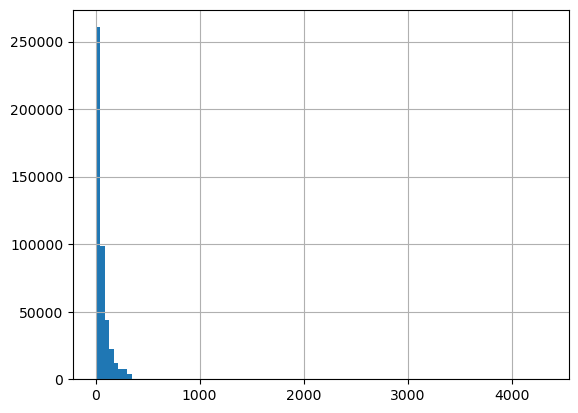

In [184]:
data['len_review'].hist(bins=100)

In [185]:
data[data['len_review']> 500]['Rating'].value_counts()

Rating
5    8
4    7
3    2
2    1
Name: count, dtype: int64

–ö–∞–∫–∏–µ –º–Ω–æ–≥–æ—Å–ª–æ–≤–Ω—ã–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã! –£–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ.

In [186]:
data[data['len_review']> 500].head()

Review  Rating  \
83917   –î–ª—è –Ω–∞—á–∞–ª–∞ —Ö–æ—á—É –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏—Ç—å, —á—Ç–æ –¥–∞–Ω–Ω—ã–π –æ—Ç–∑—ã–≤...       3   
114136  –¢–µ–ø–µ—Ä—å –ø–æ–¥—Ä–æ–±–Ω–µ–µ. –ë—ã–ª –∫—É–ø–ª–µ–Ω –µ—â–µ –≤ 2009–º! –†–∞–±–æ...       4   
119589  –¢–µ–ø–µ—Ä—å –ø–æ–¥—Ä–æ–±–Ω–µ–µ. –ë—ã–ª –∫—É–ø–ª–µ–Ω –µ—â–µ –≤ 2009–º! –†–∞–±–æ...       4   
125911  –ö—É–ø–∏–ª —Å–º–∞—Ä—Ç 3 –¥–Ω—è –Ω–∞–∑–∞–¥, –ø–æ–∫–∞ –æ—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω. –ì...       5   
135727  –í–ù–ò–ú–ê–ù–ò–ï –≤—Å–µ, –∫—Ç–æ –ø–æ–ª—å–∑—É–µ—Ç—Å—è –∏–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞–ª—Å—è S...       4   

                                                only_text  len_review  
83917   –î–ª—è –Ω–∞—á–∞–ª–∞ —Ö–æ—á—É –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏—Ç—å —á—Ç–æ –¥–∞–Ω–Ω—ã–π –æ—Ç–∑—ã–≤ ...        1141  
114136  –¢–µ–ø–µ—Ä—å –ø–æ–¥—Ä–æ–±–Ω–µ–µ –ë—ã–ª –∫—É–ø–ª–µ–Ω –µ—â–µ –≤ 2009–º! –†–∞–±–æ—Ç...         571  
119589  –¢–µ–ø–µ—Ä—å –ø–æ–¥—Ä–æ–±–Ω–µ–µ –ë—ã–ª –∫—É–ø–ª–µ–Ω –µ—â–µ –≤ 2009–º! –†–∞–±–æ—Ç...         571  
125911  –ö—É–ø–∏–ª —Å–º–∞—Ä—Ç 3 –¥–Ω—è –Ω–∞–∑–∞–¥ –ø–æ–∫–∞ –æ—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –ì–ª–∞...        3072  
135727  –í–ù–ò–ú–ê–ù–ò–ï –≤—Å–µ –∫—Ç–æ –ø–æ–ª—å–∑—É–µ—Ç—Å—è –∏–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞–ª—Å—è So...        1617

In [187]:
data[data['len_review']== 0]['Rating'].value_counts()

Rating
5    88
4    41
1    24
3    19
2    10
Name: count, dtype: int64

In [188]:
data[data['len_review']== 1]['Rating'].value_counts()

Rating
5    1407
4     288
1     237
3     163
2     147
Name: count, dtype: int64

In [189]:
data[data['len_review']== 1].head(30)

Review  Rating      only_text  len_review
172         –î–æ–≤–æ–ª–µ–Ω       3        –î–æ–≤–æ–ª–µ–Ω           1
174       –ù–µ–¥–æ—Ä–æ–≥–æ–π       5      –ù–µ–¥–æ—Ä–æ–≥–æ–π           1
467      –†–µ–∫–æ–º–µ–Ω–¥—É—é       5     –†–µ–∫–æ–º–µ–Ω–¥—É—é           1
631     –†–µ–∫–æ–º–µ–Ω–¥—É—é.       5     –†–µ–∫–æ–º–µ–Ω–¥—É—é           1
1148           –ù–æ—Ä–º       3           –ù–æ—Ä–º           1
1805     —Å–æ–≤–µ—Ç—É—é!!!       5     —Å–æ–≤–µ—Ç—É—é!!!           1
2323        –•–æ—Ä–æ—à–µ–µ       4        –•–æ—Ä–æ—à–µ–µ           1
2472         –ø—Ä–æ–¥–∞–º       3         –ø—Ä–æ–¥–∞–º           1
2645           –£–∂–∞—Å       1           –£–∂–∞—Å           1
2721          —Å—É–ø–µ—Ä       5          —Å—É–ø–µ—Ä           1
2978     –ü–æ–Ω—Ä–∞–≤–∏–ª—Å—è       4     –ü–æ–Ω—Ä–∞–≤–∏–ª—Å—è           1
3032    –°—Ç–∏–ª—å–Ω—ã–π)))       5       –°—Ç–∏–ª—å–Ω—ã–π           1
3067       —Å—É–ø–µ–µ–µ–µ—Ä       5       —Å—É–ø–µ–µ–µ–µ—Ä           1
3752           —à–ª–∞–∫       1           —à–ª–∞–∫           1
3797           –£–∂–∞—Å       1           –£–∂–∞—Å           1
4101         —Ö–æ—Ä–æ—à–æ       4         —Ö–æ—Ä–æ—à–æ           1
4732        –î–æ–≤–æ–ª–µ–Ω       5        –î–æ–≤–æ–ª–µ–Ω           1
4977  –†–µ–∫–æ–º–µ–Ω–¥—É—é!!!       4  –†–µ–∫–æ–º–µ–Ω–¥—É—é!!!           1
5146      –°—É–ø–µ—Ä—Ä!!!       5      –°—É–ø–µ—Ä—Ä!!!           1
5156          –ö–ª–∞—Å—Å       5          –ö–ª–∞—Å—Å           1
5595          —á–µ—Ç–∫–æ       5          —á–µ—Ç–∫–æ           1
6332            –Ω–µ—Ç       3            –Ω–µ—Ç           1
6351       —Ö–¥–ª–±–ª–¥—ã—â       5       —Ö–¥–ª–±–ª–¥—ã—â           1
6504        –¥–æ–≤–æ–ª–µ–Ω       5        –¥–æ–≤–æ–ª–µ–Ω           1
6542    –†–∞–∑–æ—á–∞—Ä–æ–≤–∞–Ω       3    –†–∞–∑–æ—á–∞—Ä–æ–≤–∞–Ω           1
6885         –ù–∏—á—Ç–æ.       2          –ù–∏—á—Ç–æ           1
6924      –ü—Ä–∏—è—Ç–Ω—ã–π.       5       –ü—Ä–∏—è—Ç–Ω—ã–π           1
7024         —É–¥–æ–±–µ–Ω       4         —É–¥–æ–±–µ–Ω           1
7175         —É–¥–æ–±–µ–Ω       4         —É–¥–æ–±–µ–Ω           1
7240           –£–∂–∞—Å       1           –£–∂–∞—Å           1

In [190]:
data[data['len_review']== 2]['Rating'].value_counts()

Rating
5    4329
4    1053
1     770
3     535
2     499
Name: count, dtype: int64

In [191]:
data[data['len_review']== 2].head(20)

Review  Rating             only_text  len_review
134       –û—Ç–ª–∏—á–Ω—ã–π —Å–º–∞—Ä—Ç .       4        –û—Ç–ª–∏—á–Ω—ã–π —Å–º–∞—Ä—Ç           2
183        –¢–µ–ª–µ—Ñ–æ–Ω —Ö–æ—Ä–æ—à–∏–π       5       –¢–µ–ª–µ—Ñ–æ–Ω —Ö–æ—Ä–æ—à–∏–π           2
518          –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω       5         –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω           2
676       –û—á–µ–Ω—å –¥–æ–≤–æ–ª—å–Ω–∞!!       5      –û—á–µ–Ω—å –¥–æ–≤–æ–ª—å–Ω–∞!!           2
932            –ù–∞ —Ç—Ä–æ–µ—á–∫—É.       3            –ù–∞ —Ç—Ä–æ–µ—á–∫—É           2
1145     –û—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç!       5     –û—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç!           2
1153        –¢–µ–ª–µ—Ñ–æ–Ω —Å—É–ø–µ—Ä!       5        –¢–µ–ª–µ—Ñ–æ–Ω —Å—É–ø–µ—Ä!           2
1260       –õ—é–±–õ—é–±–ª—è –µ–≥–æ...       5          –õ—é–±–õ—é–±–ª—è –µ–≥–æ           2
1262       –õ—é–±–õ—é–±–ª—è –µ–≥–æ...       5          –õ—é–±–õ—é–±–ª—è –µ–≥–æ           2
1321   –ö–ª–∞—Å—Å–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω—á–∏–∫       5   –ö–ª–∞—Å—Å–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω—á–∏–∫           2
1373  –ù–µ—É–±–∏–≤–∞–µ–º—ã–π —Å–º–∞—Ä—Ç—Ñ–æ–Ω       5  –ù–µ—É–±–∏–≤–∞–µ–º—ã–π —Å–º–∞—Ä—Ç—Ñ–æ–Ω           2
1487      –û—Ç–ª–∏—á–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω       5      –û—Ç–ª–∏—á–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω           2
1497      –û—Ç–ª–∏—á–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω       5      –û—Ç–ª–∏—á–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω           2
1516   –°–º–∞—Ä—Ç—Ñ–æ–Ω–æ–º –¥–æ–≤–æ–ª–µ–Ω.       5    –°–º–∞—Ä—Ç—Ñ–æ–Ω–æ–º –¥–æ–≤–æ–ª–µ–Ω           2
1530        –ù–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é.       1         –ù–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é           2
1569      —Ö–æ—Ä–æ—à–∏–π —Å–º–∞—Ä—Ç—Ñ–æ–Ω       5      —Ö–æ—Ä–æ—à–∏–π —Å–º–∞—Ä—Ç—Ñ–æ–Ω           2
1599             –ú–æ–π –≤—ã–±–æ—Ä       5             –ú–æ–π –≤—ã–±–æ—Ä           2
1651        –°—É–ø–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω.       5         –°—É–ø–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω           2
1727     –°–æ–≤–µ—Ç—É—é –ø–æ–∫—É–ø–∞—Ç—å.       5      –°–æ–≤–µ—Ç—É—é –ø–æ–∫—É–ø–∞—Ç—å           2
1774  –û—Ç–ª–∏—á–Ω—ã–π —Å–º–∞—Ä—Ç—Ñ–æ–Ω!!!       5  –û—Ç–ª–∏—á–Ω—ã–π —Å–º–∞—Ä—Ç—Ñ–æ–Ω!!!           2

In [192]:
data[data['len_review']== 3].head(20)

Review  Rating                     only_text  \
5                     6s gold 64gb       5                  6s gold 64gb   
51        –î–∏–∑–∞–π–Ω , –∫–æ–Ω–µ—á–Ω–æ, —Ö–æ—Ä–æ—à.       1          –î–∏–∑–∞–π–Ω –∫–æ–Ω–µ—á–Ω–æ —Ö–æ—Ä–æ—à   
81          –ø–æ–∫—É–ø–∞—Ç—å –Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é       3        –ø–æ–∫—É–ø–∞—Ç—å –Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é   
177         –¶–µ–Ω–∞ —Å–ª–∏—à–∫–æ–º –∑–∞–≤—ã—à–µ–Ω–∞!       3        –¶–µ–Ω–∞ —Å–ª–∏—à–∫–æ–º –∑–∞–≤—ã—à–µ–Ω–∞!   
517              –í—Å—ë –Ω–∞–ø–∏—Å–∞–ª –≤—ã—à–µ)       5              –í—Å—ë –Ω–∞–ø–∏—Å–∞–ª –≤—ã—à–µ   
542            –û–Ω —Ä–µ–∞–ª—å–Ω–æ –ª—É—á—à–∏–π:)       5             –û–Ω —Ä–µ–∞–ª—å–Ω–æ –ª—É—á—à–∏–π   
1030    –ø–æ–ª—å–∑—É—é—Å—å —Å —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ–º)       5     –ø–æ–ª—å–∑—É—é—Å—å —Å —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ–º   
1093           –ü–æ–∫–∞ –¥–æ–≤–æ–ª–µ–Ω –∏–º....       4               –ü–æ–∫–∞ –¥–æ–≤–æ–ª–µ–Ω –∏–º   
1130       –°—É–ø–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω. 25746692       5        –°—É–ø–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω 25746692   
1374         –ß—Ç–æ –¥–µ–ª–∞—Ç—å –ø–æ–¥—Å–∫–∞–∂–∏—Ç–µ       3         –ß—Ç–æ –¥–µ–ª–∞—Ç—å –ø–æ–¥—Å–∫–∞–∂–∏—Ç–µ   
1402             –ù–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å.       3              –ù–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å   
1459               –î–æ—Ä–æ–≥–æ –¥–ª—è –Ω–µ—ë.       2                –î–æ—Ä–æ–≥–æ –¥–ª—è –Ω–µ—ë   
1550              –Ω–µ —Å–æ–≤–µ—Ç–æ–≤–∞–ª –±—ã.       2               –Ω–µ —Å–æ–≤–µ—Ç–æ–≤–∞–ª –±—ã   
1579          –ú–æ–π —Ö–æ—Ä–æ—à–∏–π —Ç–µ–ª–µ—Ñ–æ–Ω!       4          –ú–æ–π —Ö–æ—Ä–æ—à–∏–π —Ç–µ–ª–µ—Ñ–æ–Ω!   
1617  –í—ã–∫–∏–Ω—É—Ç—ã–µ –¥–µ–Ω—å–≥–∏!–ù–µ —Å–æ–≤–µ—Ç—É—é!       1  –í—ã–∫–∏–Ω—É—Ç—ã–µ –¥–µ–Ω—å–≥–∏!–ù–µ —Å–æ–≤–µ—Ç—É—é!   
1625         –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é       4         –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é   
1660          –¢–æ—Ä–º–æ–∑, –∫–æ—Ç–æ—Ä—ã–π –∂–∏–≤.       3            –¢–æ—Ä–º–æ–∑ –∫–æ—Ç–æ—Ä—ã–π –∂–∏–≤   
1711              –ü–æ–∑–æ—Ä –º–∞—Ä–∫–∏ HTC.       3               –ü–æ–∑–æ—Ä –º–∞—Ä–∫–∏ HTC   
1718            –ü–æ–∂–∞–ª–µ–ª, —á—Ç–æ –≤–∑—è–ª.       1              –ü–æ–∂–∞–ª–µ–ª —á—Ç–æ –≤–∑—è–ª   
1903          —Ç–µ–ª–µ—Ñ–æ–Ω –ø—Ä–æ—Å—Ç–æ —Å—É–ø–µ—Ä       5          —Ç–µ–ª–µ—Ñ–æ–Ω –ø—Ä–æ—Å—Ç–æ —Å—É–ø–µ—Ä   

      len_review  
5              3  
51             3  
81             3  
177            3  
517            3  
542            3  
1030           3  
1093           3  
1130           3  
1374           3  
1402           3  
1459           3  
1550           3  
1579           3  
1617           3  
1625           3  
1660           3  
1711           3  
1718           3  
1903           3

In [193]:
def get_num_exclamation_marks(row):
    num_exclamation_marks = row['only_text'].count('!')
    return  num_exclamation_marks
data['num_exclamation_marks'] = data.apply(get_num_exclamation_marks, axis = 1)
data['num_exclamation_marks'].describe()

count    457834.000000
mean          0.741282
std           2.432597
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         251.000000
Name: num_exclamation_marks, dtype: float64

In [194]:
data.loc[data['num_exclamation_marks']>50,'num_exclamation_marks'] = 50

In [195]:
data['num_exclamation_marks'].value_counts()

num_exclamation_marks
0     339396
1      55446
2      18586
3      17755
4       8793
5       4448
6       3763
7       2341
8       1493
9       1244
10       886
11       726
12       582
13       436
14       299
15       268
16       213
17       150
18       127
19        98
20        88
21        86
50        82
23        65
24        52
26        46
27        40
22        37
25        36
30        30
29        22
32        22
28        21
36        19
39        18
31        18
33        17
34        13
35        11
48         9
40         8
42         7
46         6
41         6
43         5
47         5
44         4
37         4
45         4
38         2
49         1
Name: count, dtype: int64

<Axes: >

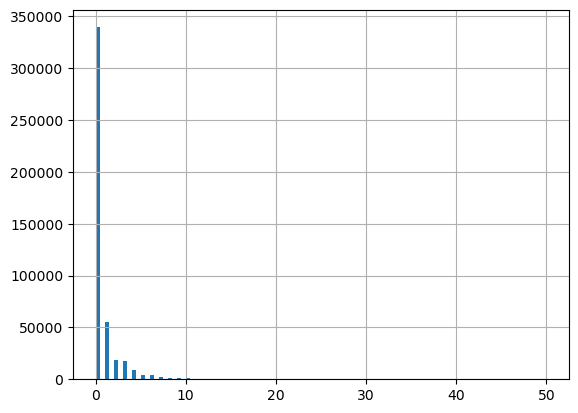

In [196]:
data['num_exclamation_marks'].hist(bins=100)

In [197]:
data.columns

Index(['Review', 'Rating', 'only_text', 'len_review', 'num_exclamation_marks'], dtype='object')

In [198]:
X = data.drop(['Review','Rating', ], axis = 1)

In [199]:
y =target = data['Rating']

In [200]:
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                   test_size=TEST_SIZE, random_state=RS,
                                                   )

In [201]:
text_features = X.select_dtypes(include='object').columns.tolist()
text_features

['only_text']

## –î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å

In [202]:
model_cb = CatBoostClassifier(iterations=1689,
                                depth = 6,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                text_features=text_features,
                                task_type = "GPU" 
                                
)

model_cb.fit(train_x, train_y, text_features=text_features, plot= True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [203]:
test_pred = model_cb.predict(test_x)
proba_test = model_cb.predict_proba(test_x)

train_pred = model_cb.predict(train_x)
proba_train = model_cb.predict_proba(train_x)
 
test_pred = model_cb.predict(test_x)
confusion = confusion_matrix(test_y, test_pred)
print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y, proba_test, multi_class='ovr')
print('AUC ROC train: ',auc_tr)
print('AUC ROC test: ',auc_test)
mse = mean_squared_error(test_y, test_pred)
rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)


              precision    recall  f1-score   support

           1       0.58      0.62      0.60      8652
           2       0.56      0.37      0.45      8867
           3       0.52      0.43      0.47     13286
           4       0.58      0.42      0.49     26766
           5       0.74      0.89      0.81     56888

    accuracy                           0.67    114459
   macro avg       0.60      0.55      0.56    114459
weighted avg       0.65      0.67      0.65    114459


Confusion Matrix

[[ 5371   845   876   380  1180]
 [ 1842  3294  1503   829  1399]
 [ 1127   967  5647  2739  2806]
 [  438   481  1876 11371 12600]
 [  493   304   906  4383 50802]]
AUC ROC train:  0.9201284539975175
AUC ROC test:  0.8829963829187928
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9546455721050378
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.48104561458688266
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.4315730016985395


In [204]:
with open(LOCAL_PATH + 'model_cb.pkl', 'wb') as f:
    pickle.dump(model_cb, f)

Text(0.5, 1.0, '–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Catboost ')

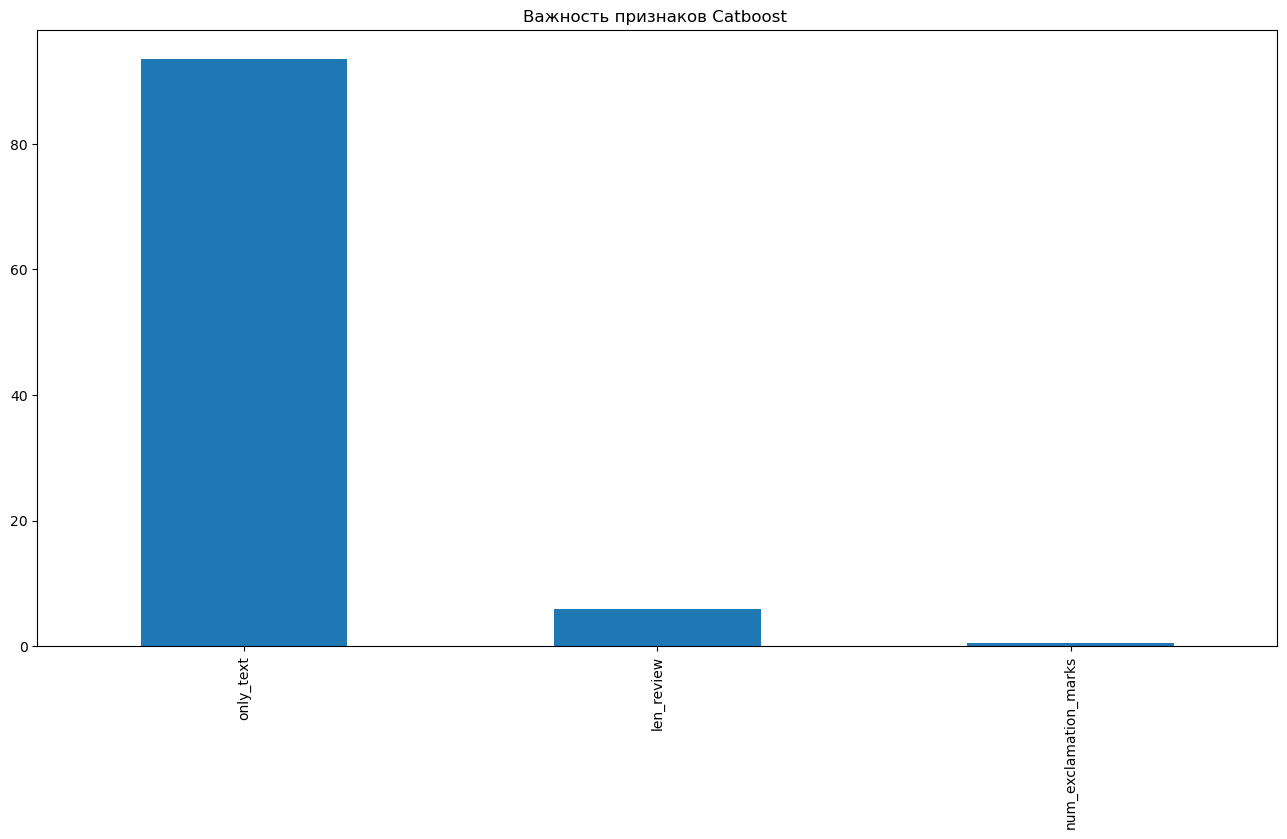

In [205]:
cat_imp = pd.Series(model_cb.feature_importances_, X.columns)
cat_imp.plot.bar(figsize=(16,8)).set_title("–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Catboost ")

In [206]:
data['only_text']

0         3D Touch –ø—Ä–æ—Å—Ç–æ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è –≤–µ—â—å! –ó–∞—Ä—è–¥ –¥–µ—Ä...
1         –û—Ç–∫–ª—é—á–∞–µ—Ç—Å—è –ø—Ä–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é –Ω–µ–ø...
2         –í Apple –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–µ—à–∏–ª–∏ –Ω–µ –∑–∞–º–æ—Ä–∞—á–∏–≤–∞—Ç—å—Å—è ...
3         –ü–æ—Å—Ç–∞—Ä–∞–ª—Å—è –Ω–∞–∏–±–æ–ª–µ–µ —ë–º–∫–æ –∏ –∫–æ—Ä–æ—Ç–∫–æ –æ–ø–∏—Å–∞—Ç—å –≤—Å–µ...
4          –î–æ—Å—Ç–æ–π–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω –ü–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –æ–¥–Ω–æ —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ
                                ...                        
457829    —É–¥–æ–±–Ω—ã–π –≤—Å—ë —Ä–∞–±–æ—Ç–∞–µ—Ç –æ—Ç–ª–∏—á–Ω–æ –∑–≤–æ–Ω–∏—Ç –∏–≥—Ä–∞–µ—Ç —Å–Ω–∏...
457830    –ø—Ä–æ—à–ª–æ –±–æ–ª—å—à–µ –≥–æ–¥–∞ –ø—Ä–∏—Ç–µ–Ω–∑–∏–π –Ω–µ—Ç –ø—Ä–∏ –º–æ–µ–π –Ω–∞–≥—Ä...
457831    –º–æ–π –ø–µ—Ä–≤—ã–π –∞–ø–ø–∞—Ä–∞—Ç –Ω–∞ –∞–Ω–¥—Ä–æ–∏–¥–µ –ù–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω...
457832    –†–∞–∑–±–∏–ª iphone –∏ –Ω–µ –±—ã–ª–æ –∂–µ–ª–∞–Ω–∏—è –ø–æ–∫—É–ø–∞—Ç—å –Ω–æ–≤—ã–π...
457833                –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –ø–æ–∫—É–ø

In [207]:
def get_word_tokens(row):
    try:
        return word_tokenize(row['only_text'])
    except:
        return ''
data['tokens_from_review'] = data.apply(get_word_tokens, axis = 1)
data['tokens_from_review'].head()

0    [3D, Touch, –ø—Ä–æ—Å—Ç–æ, –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞—è, –≤–µ—â—å, !, –ó...
1    [–û—Ç–∫–ª—é—á–∞–µ—Ç—Å—è, –ø—Ä–∏, —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ, –±–ª–∏–∑–∫–æ–π, –∫, –Ω—É...
2    [–í, Apple, –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ, —Ä–µ—à–∏–ª–∏, –Ω–µ, –∑–∞–º–æ—Ä–∞—á–∏–≤...
3    [–ü–æ—Å—Ç–∞—Ä–∞–ª—Å—è, –Ω–∞–∏–±–æ–ª–µ–µ, —ë–º–∫–æ, –∏, –∫–æ—Ä–æ—Ç–∫–æ, –æ–ø–∏—Å–∞...
4    [–î–æ—Å—Ç–æ–π–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω, –ü–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è, –æ–¥–Ω–æ, —É–¥–æ–≤–æ...
Name: tokens_from_review, dtype: object

In [208]:
tqdm.pandas()
morph = MorphAnalyzer()
def lemmatize_it(row):
    lemmas = [morph.parse(word)[0].normal_form for word in row['tokens_from_review']]
    lemmatized_text = ' '.join(lemmas)
    return  lemmatized_text

data['lemmas_from_review'] = data.apply(lemmatize_it, axis = 1)
data['lemmas_from_review'].head()

0    3d touch –ø—Ä–æ—Å—Ç–æ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω—ã–π –≤–µ—â—å ! –∑–∞—Ä—è–¥ –¥–µ...
1    –æ—Ç–∫–ª—é—á–∞—Ç—å—Å—è –ø—Ä–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –±–ª–∏–∑–∫–∏–π –∫ –Ω—É–ª—å –Ω–µ–ø...
2    –≤ apple –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–µ—à–∏—Ç—å –Ω–µ –∑–∞–º–æ—Ä–∞—á–∏–≤–∞—Ç—å—Å—è ...
3    –ø–æ—Å—Ç–∞—Ä–∞—Ç—å—Å—è –Ω–∞–∏–±–æ–ª–µ–µ —ë–º–∫–æ –∏ –∫–æ—Ä–æ—Ç–∫–æ –æ–ø–∏—Å–∞—Ç—å –≤—Å...
4     –¥–æ—Å—Ç–æ–π–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –æ–¥–∏–Ω —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ
Name: lemmas_from_review, dtype: object

–∏ –æ–Ω–æ –¥–∞–∂–µ —Å—Ç—Ä–æ—á–Ω–æ–µ —Å—Ä–∞–∑—É, –æ—Ç–ª–∏—á–Ω–æ. –¢–µ–ø–µ—Ä—å –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è

In [209]:
data.columns

Index(['Review', 'Rating', 'only_text', 'len_review', 'num_exclamation_marks',
       'tokens_from_review', 'lemmas_from_review'],
      dtype='object')

In [210]:
X= data.drop(['Review', 'Rating', 'only_text','tokens_from_review', ],axis = 1)

train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                   test_size=TEST_SIZE, random_state=RS,
                                                   )

In [211]:
vec_tr = TfidfVectorizer(ngram_range=(1, 2), max_df=0.4, tokenizer=word_tokenize, stop_words=noise)
bow_tr = vec_tr.fit_transform(train_x['lemmas_from_review'])

vec_train = pd.DataFrame.sparse.from_spmatrix(bow_tr, columns=vec_tr.get_feature_names_out()
                                             )

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [212]:
list_ngramm_imp = vec_train.columns
len(list_ngramm_imp)

2672180

–ü—Ä–∏ —Ç–∞–∫–æ–º –∂–µ —Ä–µ–∂–∏–º–µ –¥–æ —á–∏—Å—Ç–∫–∏ —Ä–∞–∑–º–µ—Ä –±—ã–ª 4221365, –∞ —Ç–µ–ø–µ—Ä—å –≤–æ—Ç 2509712. –ö—Ä—É—Ç–æ –∂–µ!

In [213]:
ngramm_imp = vec_train.sum().sort_values(ascending = False)
ngramm_imp.head(20)

!               9279.882126
—Ö–æ—Ä–æ—à–∏–π         5101.917645
! !             4795.226919
–æ—á–µ–Ω—å           4793.213454
—ç—Ç–æ             4696.885923
–≤—Å—ë             4328.319714
–∫—É–ø–∏—Ç—å          3092.388289
–¥–æ–≤–æ–ª—å–Ω—ã–π       3070.985214
—Ü–µ–Ω–∞            3066.497637
–∞–ø–ø–∞—Ä–∞—Ç         3064.604214
–æ—Ç–ª–∏—á–Ω—ã–π         3048.63332
–≥–æ–¥             2951.336643
–±—Ä–∞—Ç—å           2856.611205
–¥–µ–Ω—å–≥–∞          2855.605796
—Å–≤–æ–π            2836.812362
–≤–µ—Å—å            2730.109934
—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å      2633.044538
–º–æ–¥–µ–ª—å          2575.470335
—ç–∫—Ä–∞–Ω           2536.884244
–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è    2517.001642
dtype: Sparse[float64, 0]

In [214]:
vec_tr.get_feature_names_out()[:40]

array(['!', '! !', '! 0', '! 00', '! 01', '! 011273', '! 015271', '! 02',
       '! 04', '! 040272', '! 05', '! 1', '! 10', '! 100', '! 1000',
       '! 10000', '! 1000—Ä', '! 100500', '! 100–≥—Ä–∞–º–º', '! 100—Ä–∞–∑',
       '! 10500', '! 108', '! 10990', '! 10–∫', '! 10—Ç', '! 10—Ç—Ä', '! 10—Ö',
       '! 11', '! 111', '! 11200', '! 113', '! 11500', '! 12', '! 1200',
       '! 12400521', '! 12500—Ä', '! 128', '! 12990', '! 12–≥–±', '! 13'],
      dtype=object)

In [215]:
vec_ts = TfidfVectorizer(ngram_range=(1, 2), max_df=0.4, tokenizer=word_tokenize, stop_words=noise)
bow_ts = vec_ts.fit_transform(test_x['lemmas_from_review'])

vec_test = pd.DataFrame.sparse.from_spmatrix(bow_ts, columns=vec_ts.get_feature_names_out()
                                             )

C:\Users\term\anaconda3\envs\nlpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [216]:
ngramm_imp_ts = vec_test.sum().sort_values(ascending = False)
ngramm_imp_ts.head(20)

!               3184.945486
—Ö–æ—Ä–æ—à–∏–π         1722.891502
! !             1654.273264
–æ—á–µ–Ω—å           1619.572019
—ç—Ç–æ             1607.195615
–≤—Å—ë             1470.548802
–∫—É–ø–∏—Ç—å          1056.300073
–∞–ø–ø–∞—Ä–∞—Ç         1055.015337
–æ—Ç–ª–∏—á–Ω—ã–π         1050.66383
—Ü–µ–Ω–∞            1039.704674
–¥–æ–≤–æ–ª—å–Ω—ã–π       1037.864156
–≥–æ–¥             1011.545604
–¥–µ–Ω—å–≥–∞           971.391097
—Å–≤–æ–π             964.394934
–±—Ä–∞—Ç—å            960.839451
–≤–µ—Å—å             938.436872
—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å       894.883215
–º–æ–¥–µ–ª—å           880.420193
—ç–∫—Ä–∞–Ω            872.751988
–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è     845.085271
dtype: Sparse[float64, 0]

In [217]:
len(ngramm_imp_ts)

1521051

In [218]:
columns_test = set(list(vec_test.columns))
columns_train = set(list(vec_train.columns))

In [219]:
add_list_test = [x for x in columns_test if x not in columns_train]
len(add_list_test)

228537

In [220]:
add_list_test

['–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è htc',
 '1 khz',
 '—É—Å—Ç—Ä–æ–∏—Ç—å—Å—è —Å—Ç—Ä–æ–π–∫–∞',
 '—Ç–µ–ª–µ—Ñ–æ–Ω –ø—Ä–æ–ø–∏—Ç–∞—Ç—å',
 '–æ—Å–æ–±–µ–Ω–Ω–æ one',
 '—É–¥–æ–±–Ω–æ –±–∞–¥–∞',
 '9000 –∞–ø–ø–∞—Ä–∞—Ç',
 '–ø—Ä–∞–≤–æ –ø—Ä—ã–≥–∞—Ç—å',
 '–æ—Å–æ–±–µ–Ω–Ω–æ –ø—Ä–∏–≤–µ—Ä–∂–µ–Ω–µ—Ü',
 '–¥–æ–≤–æ–ª—å–Ω—ã–π –∞–∫–±',
 '–∫–æ—Ä–µ–Ω–Ω–æ–π –∫–∏—Ç–∞–π—Å–∫–∏–π',
 '–º–æ–¥–µ–ª—å –ø–ª–∞–Ω—à–µ—Ç–Ω–∏–∫',
 '–∑–≤–æ–Ω–∏—Ç—å –ø–∏—à—É—â–∏–π',
 '—Ç–∏—Ö–∏–π –±–µ–∑–æ–±—Ä–∞–∑–∏–µ',
 '–±–ª—é—Ç—É—Å –≤–∏–¥–∂–µ—Ç',
 'california',
 '–ø–∞–ø–∫–∞ —Å–æ–∑–¥–∞—Ç—å—Å—è',
 '–±–µ—Ä–µ–∂–ª–∏–≤—ã–π —Ö–æ–∑—è–π–∫–∞',
 '–ø—Ä–æ—á–Ω—ã–π –≤–ª–∞–≥–æ—É—Å—Ç–æ–π—á–∏–≤—ã–π',
 '–¥–µ–≤–∞–π—Å wi',
 '–æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å —Å—á—ë—Ç',
 '–∑–∞–±–∏—Ç—å—Å—è —á–µ—Ö–æ–ª',
 '—ç–Ω–µ—Ä–≥–æ–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –±–∞–¥—ã',
 '–¥–∏—á—Å–ø–ª–µ–π',
 '–º–µ—Å—Å–µ–Ω–¥–∂–µ—Ä —Ñ–∞–Ω–∞—Ç–∏–∑–º',
 '–±–ª–æ–∫–∏—Ä–æ–≤–∞—Ç—å—Å—è –≤–æ–≤—Å–µ',
 '–ø—Ä–∏–≤–µ–∑—Ç–∏ —Å–∫–æ—Ä–æ—Å—Ç—å',
 '–≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ',
 '–º–µ–¥–ª–µ–Ω–Ω–æ –∞–ø–ø–∞—Ä–∞—Ç',
 '–≥–ª—É–±–æ

In [221]:
add_list_train = [x for x in columns_train if x not in columns_test]
len(add_list_train)

1379666

–ò —É –Ω–∞—à–∏—Ö —Ñ–∏—á –µ—Å—Ç—å —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å —Ç–µ–º, —á—Ç–æ –º—ã –∏—Ö —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∞–ª–∏ –æ—Ç–¥–µ–ª—å–Ω–æ.
–ù—É —Å–ø–µ—Ä–≤–∞ –¥–æ–±–∞–≤–ª—è—Ç—å –Ω–µ –±—É–¥–µ–º, —É–¥–∞–ª–∏–º. –ë—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ —ç—Ç–æ –º–∞–ª–æ—É–ø–æ—Ç—Ä–µ–±–∏–º—ã–µ —Ñ–∏—á–∏.

In [222]:
vec_train_drop = vec_train.drop(add_list_train, axis = 1)
vec_test_drop = vec_test.drop(add_list_test, axis = 1)

In [223]:
vec_test_drop = vec_test_drop[vec_train_drop.columns]

In [224]:
model_cb = CatBoostClassifier(iterations=1200,
                                depth = 3,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                #text_features=text_features,
                                #task_type = "GPU" 
                                
)

model_cb.fit(vec_train_drop, train_y, plot= True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [225]:
train_pred = model_cb.predict(vec_train_drop)
proba_train = model_cb.predict_proba(vec_train_drop)
 
test_pred = model_cb.predict(vec_test_drop)
proba_test = model_cb.predict_proba(vec_test_drop)

confusion = confusion_matrix(test_y, test_pred)

print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y,  proba_test, multi_class='ovr')
print('AUC train: ', auc_tr)
print('AUC test: ', auc_test)
mse = mean_squared_error(test_y, test_pred)

rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)


              precision    recall  f1-score   support

           1       0.51      0.41      0.45      8652
           2       0.41      0.13      0.20      8867
           3       0.41      0.16      0.23     13286
           4       0.51      0.22      0.31     26766
           5       0.61      0.95      0.74     56888

    accuracy                           0.58    114459
   macro avg       0.49      0.37      0.39    114459
weighted avg       0.54      0.58      0.52    114459


Confusion Matrix

[[ 3534   754   702   272  3390]
 [ 1874  1149  1145   623  4076]
 [  981   638  2105  2235  7327]
 [  286   183   904  5837 19556]
 [  249   108   284  2469 53778]]
AUC train:  0.8254519770044393
AUC test:  0.8192883426541204
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.2218470137553776
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.6863330974410051
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.06884059179424562


In [226]:
cat_imp = pd.DataFrame(model_cb.feature_importances_, vec_train_drop.columns)
cat_imp.columns = ['imp']
cat_imp = cat_imp.sort_values(by = 'imp', ascending = False)
cat_imp.shape[0]

1292514

In [227]:
cat_imp[cat_imp['imp']> 0.1].head(40)

imp
–æ—Ç–ª–∏—á–Ω—ã–π          5.418661
–Ω–µ —Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å     4.709274
–¥–æ–≤–æ–ª—å–Ω—ã–π         4.315095
—Ü–µ–ª–æ–µ             3.077842
–Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å  2.684466
–Ω–µ –ø–æ–∂–∞–ª–µ—Ç—å       2.646542
–Ω–µ –ø–æ–∫—É–ø–∞—Ç—å       1.646659
—Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å     1.495077
—Ö–æ—Ä–æ—à–∏–π           1.438381
—Ä–∞–∑–æ—á–∞—Ä–æ–≤–∞—Ç—å      1.402892
!                 1.381851
—É–∂–∞—Å–Ω—ã–π           1.263602
–Ω–µ –±—Ä–∞—Ç—å          1.121325
–Ω–µ –∂–∞–ª–µ—Ç—å         1.058836
–æ—Ç–ª–∏—á–Ω–æ           1.031143
—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å        1.024109
–≤–ø–æ–ª–Ω–µ            0.971739
–Ω–µ–ø–ª–æ—Ö–æ–π          0.971458
–æ—á–µ–Ω—å –¥–æ–≤–æ–ª—å–Ω—ã–π   0.959320
—Å—É–ø–µ—Ä             0.956114
–æ—á–µ–Ω—å             0.903263
–Ω–µ —Å—Ç–æ–∏—Ç—å         0.860015
—Ä–µ–º–æ–Ω—Ç            0.852982
—Å–¥–∞—Ç—å             0.846077
—É–¥–æ–±–Ω—ã–π           0.786439
–Ω—Ä–∞–≤–∏—Ç—å—Å—è         0.784202
–≤–µ—Ä–Ω—É—Ç—å           0.779521
–≤—Å—ë               0.700747
–Ω–µ –¥–æ–≤–æ–ª—å–Ω—ã–π      0.666580
–æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã–π    0.652401
—Ä–∞–∑–æ—á–∞—Ä–æ–≤–∞–Ω–∏–µ     0.644027
–º–µ—Å—è—Ü             0.614863
–Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ        0.596752
—Ä—É–∫–∞              0.594567
–Ω–µ –∫—É–ø–∏—Ç—å         0.589684
—Ö–≤–∞—Ç–∞—Ç—å           0.576257
–æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–π     0.555002
–Ω–µ—Ä–≤              0.549103
–ø—Ä–∏–Ω—Ü–∏–ø           0.507387
—É–¥–æ–±–Ω–æ            0.497132

–°–∫–æ–ª—å–∫–æ —É –Ω–∞—Å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é > 0.1? 180 0.01? -607 0.001? 871 0.0001? -896 0.00001? 898. –ë–æ–ª—å—à–µ 0.000000000001 - –æ–ø—è—Ç—å 898. –í –ø—Ä–∏–Ω—Ü–∏–ø–µ –±–æ–ª—å—à–µ –Ω—É–ª—è –∫—ç—Ç–±—É—Å—Ç —Å—á—ë–ª —Ç–æ–ª—å–∫–æ 898 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ. –≠—Ç–æ –∫–∞–∫–æ–µ –æ–±–ª–µ–≥—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –±—É–¥–µ—Ç!!! –ü—Ä–æ–≤–µ—Ä–∏–º —Ç–æ–ª—å–∫–æ —ç—Ç–∏ 898

In [228]:
cat_imp[cat_imp['imp']> 0].shape[0]

911

Text(0.5, 1.0, '–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Catboost ')

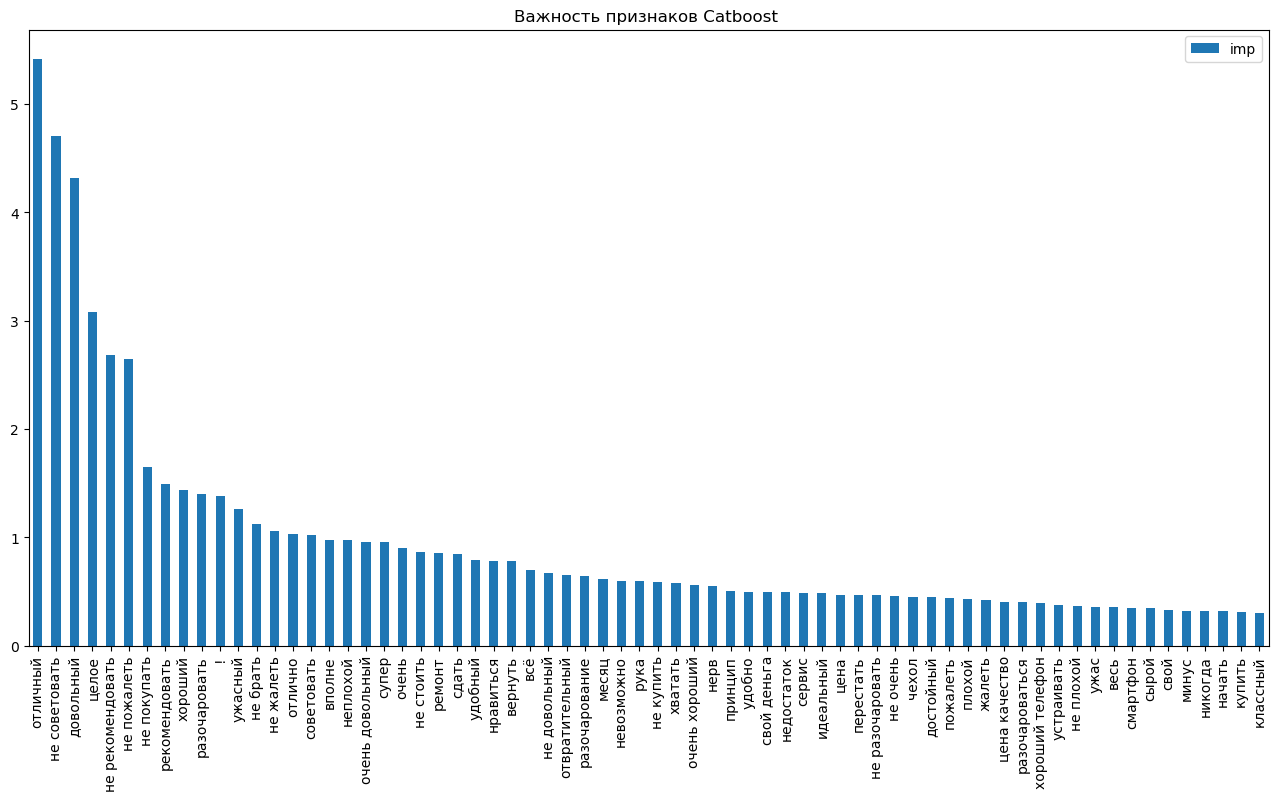

In [229]:

cat_imp[cat_imp['imp']> 0.3].plot.bar(figsize=(16,8)).set_title("–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Catboost ")

In [230]:
cat_imp = cat_imp.reset_index()
cat_imp

index       imp
0                  –æ—Ç–ª–∏—á–Ω—ã–π  5.418661
1             –Ω–µ —Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å  4.709274
2                 –¥–æ–≤–æ–ª—å–Ω—ã–π  4.315095
3                     —Ü–µ–ª–æ–µ  3.077842
4          –Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å  2.684466
...                     ...       ...
1292509    –∏–∫–æ–Ω–∫–∞ —Å—Ç–∞—Ä—Ç–æ–≤—ã–π  0.000000
1292510  –∏–∫–æ–Ω–∫–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π  0.000000
1292511      –∏–∫–æ–Ω–∫–∞ —Å—Ç–∞–≤–∏—Ç—å  0.000000
1292512         –∏–∫–æ–Ω–∫–∞ —Å–æ—Ñ—Ç  0.000000
1292513           —ë—ë –º–∞–º–∞—à–∞  0.000000

[1292514 rows x 2 columns]

In [231]:
cat_imp_list = set(cat_imp[cat_imp['imp']> 0]['index'].tolist())
len(cat_imp_list)

911

In [232]:
cat_imp_list

{'!',
 '128',
 '2 –±–∞–ª–ª',
 '2 –≥–æ–¥',
 '2 –∑–≤–µ–∑–¥–∞',
 '2010',
 '23 000',
 '3 –±–∞–ª–ª',
 '3 –∑–≤–µ–∑–¥–∞',
 '3000',
 '32',
 '4',
 '4 –±–∞–ª–ª',
 '4 –≥–æ–¥',
 '4 –∑–≤–µ–∑–¥–∞',
 '4 –ø–æ—Å—Ç–∞–≤–∏—Ç—å',
 '4–∫—É',
 '5',
 '5 5',
 '64',
 '8',
 'android',
 'bt',
 'fly',
 'galaxy',
 'hd',
 'huawei',
 'iphone',
 'lte',
 'mi',
 'microsd',
 'nfc',
 'nokia',
 'note',
 'pro',
 'ru',
 'shell',
 'windows !',
 '–∞–±—Å–æ–ª—é—Ç–Ω–æ',
 '–∞–π—Ñ–æ–Ω',
 '–∞–∫–∫—É–º–∞ !',
 '–∞–∫—Ü–∏—è',
 '–∞–ª–∏',
 '–∞–Ω–∞–ª–æ–≥',
 '–∞–ø–ø–∞—Ä–∞—Ç 4',
 '–∞–ø–ø–∞—Ä–∞—Ç –∏–º–µ—Ç—å—Å—è',
 '–∞–ø–ø–∞—Ä–∞—Ç –Ω–µ–ø–ª–æ—Ö–æ–π',
 '–∞–ø–ø–∞—Ä–∞—Ç –æ–∫–æ–ª–æ',
 '–∞–ø–ø–∞—Ä–∞—Ç —Ö–æ—Ä–æ—à–∏–π',
 '–±',
 '–± –Ω–µ',
 '–±–∞—Ä–∞—Ö–ª–æ',
 '–±–∞—Ç–∞—Ä–µ—è',
 '–±–µ–¥–∞',
 '–±–µ–∑—É–º–Ω–æ',
 '–±–µ—Å–∏—Ç—å',
 '–±–µ—Å–ø–ª–∞—Ç–Ω—ã–π',
 '–±–µ—Å–ø–æ–ª–µ–∑–Ω—ã–π',
 '–±–ª–æ–∫–∏—Ä–æ–≤–∫–∞',
 '–±–æ–ª–µ–µ –¥–æ–≤–æ–ª—å–Ω—ã–π',
 '–±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π',
 '–±–æ–ª–µ–µ –º–µ–Ω–µ–µ',
 '–±–æ–ª—å—à–æ–π –Ω–µ',
 '–±–æ–ª—å—à–æ–π –Ω–∏–∫–æ–≥–¥–∞'

–°–ø–∏—Å–æ–∫ –≥–æ—Ç–æ–≤, –ø–æ–µ—Ö–∞–ª–∏:

In [233]:
vec_train_short = vec_train_drop[list(cat_imp_list)]
 
vec_test_short = vec_test_drop[list(cat_imp_list)]

In [234]:
model_cb = CatBoostClassifier(iterations=1500,
                                depth = 5,
                                loss_function='MultiClass',
                                thread_count=-1, 
                                random_seed=RANDOM_STATE, 
                                verbose=0, 
                                #text_features=text_features,
                                #task_type = "GPU" 
                                
)

#model_cb.fit(vec_train_drop, train_y, plot= True)
model_cb.fit(vec_train_short, train_y, plot= True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [235]:
train_pred = model_cb.predict(vec_train_short)
proba_train = model_cb.predict_proba(vec_train_short)
 
test_pred = model_cb.predict(vec_test_short)
proba_test = model_cb.predict_proba(vec_test_short)

confusion = confusion_matrix(test_y, test_pred)

print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y,  proba_test, multi_class='ovr')
print('AUC train: ', auc_tr)
print('AUC test: ', auc_test)
mse = mean_squared_error(test_y, test_pred)

rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)


              precision    recall  f1-score   support

           1       0.52      0.44      0.47      8652
           2       0.41      0.15      0.22      8867
           3       0.42      0.21      0.28     13286
           4       0.51      0.26      0.35     26766
           5       0.63      0.93      0.76     56888

    accuracy                           0.59    114459
   macro avg       0.50      0.40      0.42    114459
weighted avg       0.56      0.59      0.54    114459


Confusion Matrix

[[ 3788   869   850   333  2812]
 [ 1964  1363  1390   741  3409]
 [  984   760  2750  2541  6251]
 [  310   225  1143  7000 18088]
 [  273   127   434  2986 53068]]
AUC train:  0.8398546260519952
AUC test:  0.8295765291156971
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.1623924936294563
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.6429201722887672
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.157255424674846


In [236]:
vec_train_short = vec_train_short.merge(X[['len_review', 'num_exclamation_marks']], how='left', left_index=True, right_index=True)
vec_test_short = vec_test_short.merge(X[['len_review', 'num_exclamation_marks']], how='left', left_index=True, right_index=True)

In [237]:
model_cb.fit(vec_train_short, train_y, plot= True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [238]:
train_pred = model_cb.predict(vec_train_short)
proba_train = model_cb.predict_proba(vec_train_short)
 
test_pred = model_cb.predict(vec_test_short)
proba_test = model_cb.predict_proba(vec_test_short)

confusion = confusion_matrix(test_y, test_pred)

print(CR + classification_report(test_y,test_pred)) 

print(CR + 'Confusion Matrix\n')
print(confusion)
auc_tr = roc_auc_score(train_y, proba_train, multi_class='ovr')
auc_test = roc_auc_score(test_y,  proba_test, multi_class='ovr')
print('AUC train: ', auc_tr)
print('AUC test: ', auc_test)
mse = mean_squared_error(test_y, test_pred)

rmse = root_mean_squared_error(test_y, test_pred)
mae = mean_absolute_error(test_y, test_pred)
print("Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", rmse)
print("Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", mae)
r2 = r2_score(test_y, test_pred)
print("R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2)


              precision    recall  f1-score   support

           1       0.52      0.43      0.47      8652
           2       0.41      0.16      0.23      8867
           3       0.42      0.21      0.28     13286
           4       0.52      0.26      0.35     26766
           5       0.63      0.93      0.76     56888

    accuracy                           0.59    114459
   macro avg       0.50      0.40      0.42    114459
weighted avg       0.56      0.59      0.54    114459


Confusion Matrix

[[ 3761   899   861   332  2799]
 [ 1927  1420  1414   726  3380]
 [ 1002   735  2756  2522  6271]
 [  306   243  1141  6959 18117]
 [  290   127   443  2953 53075]]
AUC train:  0.8397291947464559
AUC test:  0.8292720540608036
Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.1622759869782455
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.6429463825474624
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.15742435286093537


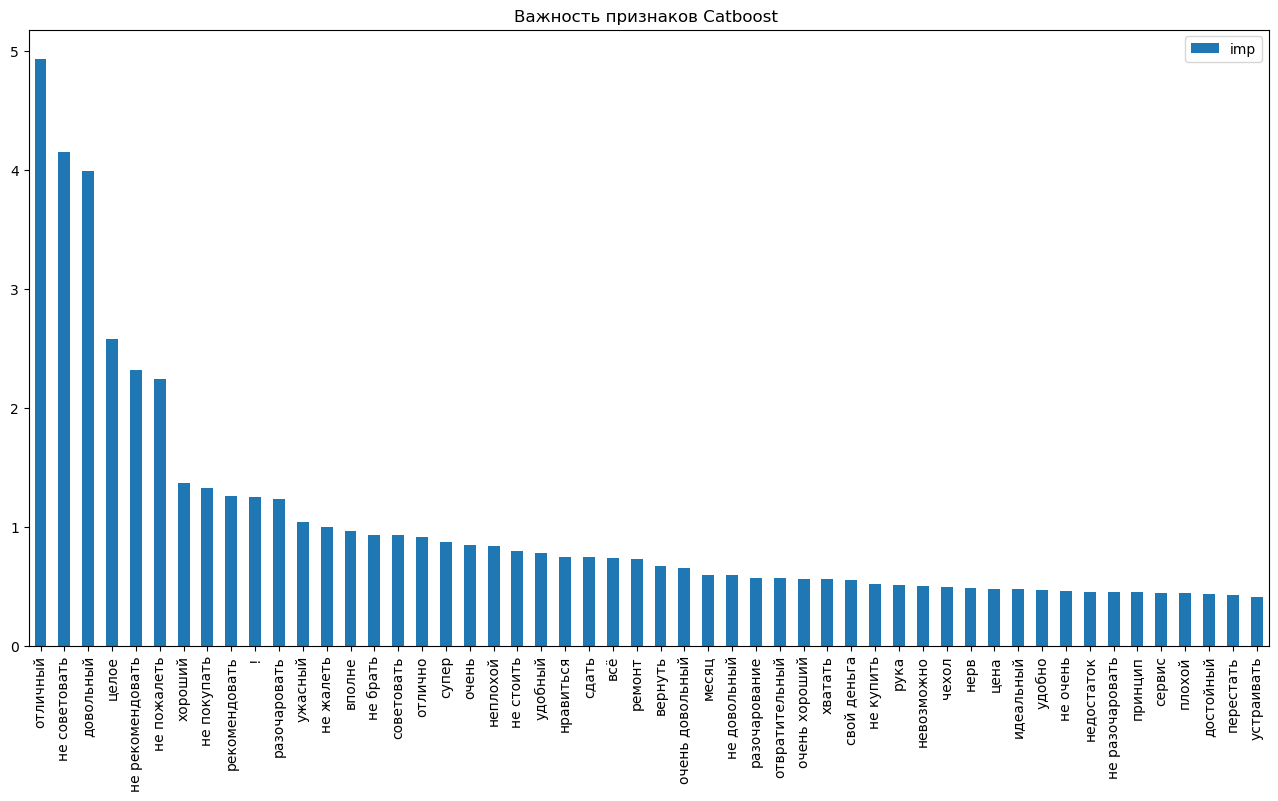

In [239]:
cat_imp = pd.DataFrame(model_cb.feature_importances_, vec_train_short.columns)
cat_imp.columns = ['imp']
cat_imp = cat_imp.sort_values(by = 'imp', ascending = False)
cat_imp.shape[0]
cat_imp[cat_imp['imp']> 0.4].plot.bar(figsize=(16,8)).set_title("–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Catboost ")
#plt.xticks(rotation = 45)
plt.show()

–õ—É—á—à–∏–π —Å–∫–æ—Ä –ø–æ–ª—É—á–µ–Ω —Å –º–æ–¥–µ–ª—å—é
```
CatBoostClassifier
    (iterations=1689,
    depth = 6,                                
    loss_function='MultiClass',
    thread_count=-1, 
    random_seed=RANDOM_STATE, 
    verbose=0, 
    text_features=text_features,
    task_type = "GPU" 
                                
)
–ú–µ—Ç—Ä–∏–∫–∏ –∏ –º–∞—Ç—Ä–∏—Ü–∞:

              precision    recall  f1-score   support

           1       0.58      0.62      0.60      8652
           2       0.56      0.37      0.45      8867
           3       0.52      0.43      0.47     13286
           4       0.58      0.42      0.49     26766
           5       0.74      0.89      0.81     56888

    accuracy                           0.67    114459
   macro avg       0.60      0.55      0.56    114459
weighted avg       0.65      0.67      0.65    114459


Confusion Matrix

[[ 5371   845   876   380  1180]
 [ 1842  3294  1503   829  1399]
 [ 1127   967  5647  2739  2806]
 [  438   481  1876 11371 12600]
 [  493   304   906  4383 50802]]
 
AUC ROC train:  0.9201284539975175
AUC ROC test:  0.8829963829187928

Root Mean Squared Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9546455721050378
Mean Absolute Error –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.48104561458688266
R2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.4315730016985395
```
–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ–ª—É—á–µ–Ω—ã –Ω–∞ —Ç–µ–∫—Å—Ç–µ, —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –∏ –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –ø–∞–π–º–æ—Ä—Ñ–æ–º. –≠—Ç–æ –ª—É—á—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç, –≤ —Ç–æ–º —á–∏—Å–ª–µ –≤ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ —Å –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π.

–ö–æ–Ω–µ—Ü –ø–µ—Ä–≤–æ–π —á–∞—Å—Ç–∏, –≤–æ –≤—Ç–æ—Ä–æ–π —á–∞—Å—Ç–∏ - –ø–æ–¥–±–æ—Ä–∫–∞ –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π.